# Predicting Glass Transition Temperature (Tg) of Oxide Glasses

#### Dataset - https://zenodo.org/records/7319485
#### Reference Paper - https://pubs.acs.org/doi/10.1021/acsomega.2c08146

**Table Features**

| Column            | Description                                                                         |
| ----------------- | ----------------------------------------------------------------------------------- |
| **Name**          | Common chemical name of the compound (e.g., glucose, glycerol).                     |
| **Formula**       | Molecular formula (e.g., C6H12O6).                                                  |
| **#CH3**          | Number of methyl groups (-CH3) in the molecule.                                     |
| **#CH2**          | Number of methylene groups (-CH2-) in the molecule.                                 |
| **#CH**           | Number of methine groups (-CH-) in the molecule.                                    |
| **#C**            | Number of quaternary carbons (C bonded to 4 atoms) in the molecule.                 |
| **#OH**           | Number of hydroxyl groups (-OH) in the molecule.                                    |
| **#C-O-C**        | Number of ether linkages (C-O-C) in the molecule.                                   |
| **#O=C**          | Number of carbonyl groups (C=O) in the molecule.                                    |
| **DBA**           | Degree of branching in the molecule (numeric measure).                              |
| **#N**            | Number of nitrogen atoms in the molecule.                                           |
| **#Hal**          | Number of halogen atoms (F, Cl, Br, I) in the molecule.                             |
| **O:C**           | Oxygen-to-carbon ratio (O/C).                                                       |
| **M / g/mol**     | Molecular weight in grams per mole.                                                 |
| **Tm / K**        | Melting temperature in Kelvin.                                                      |
| **Tg / K**        | Glass transition temperature in Kelvin (target property for modeling).              |
| **Tg/Tm**         | Ratio of glass transition to melting temperature.                                   |
| **Reference(Tm)** | Literature source/reference for the melting point.                                  |
| **Reference(Tg)** | Literature source/reference for the glass transition temperature.                   |
| **SMILES**        | Molecular structure in SMILES notation.                                             |
| **Figure**        | Figure or code representing the molecule in the database (may have missing values). |


## About The Dataset
The dataset used in this study is the BIMOG Database (v1.0), a unified collection of experimentally measured glass transition temperatures (Tg) for various organic and inorganic compounds.
Each entry includes molecular structure information and several derived chemical descriptors.
The data was obtained from Zenodo (DOI: 10.5281/zenodo.7319485
) and prepared in CSV format for machine learning analysis.

## Data Representations (Modes)
The study employs two parallel representations (modes) of molecular structure for model training and comparison:



| Mode                                | Description                                                                                                                                                                                         | Example Use                                                                              |
| ----------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Functional Group Mode (FG Mode)** | Represents each molecule based on the **count of functional groups** (e.g., –CH₃, –OH, C=O). These descriptors are numeric and directly interpretable.                                              | Useful for understanding how specific chemical features influence Tg.                    |
| **SMILES Mode**                     | Represents each molecule using its **SMILES string**, a linear text encoding of molecular structure. SMILES can be converted into vector representations (e.g., Morgan fingerprints) for ML models. | Useful for learning structure–property relationships without manual feature engineering. |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load dataset
# the dataset csv instead of comas as seperator used semi colons
df = pd.read_csv("dataset.csv", sep=";")
df.head(10)

Name  Formula  #CH3  #CH2  #CH  #C   #OH  \
0                          glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
1                          glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
2                          glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
3                          glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
4                          glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
5                          glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
6                         dextrose  C6H12O6   0.0   1.0  4.0  1.0  5.0   
7                    tartaric acid   C4H6O6   0.0   0.0  2.0  2.0  4.0   
8  1,2,3-propanetricarboxylic acid   C6H8O6   0.0   2.0  1.0  3.0  3.0   
9   1,2,4-butanetricarboxylic acid  C7H10O6   0.0   3.0  1.0  3.0  3.0   

   #C-O-C  #O=C  DBA  ...  #Hal     O:C  M / g/mol  Tm / K  Tg / K  Tg/Tm   \
0     0.0   1.0  1.0  ...   0.0  1.0000      180.0  419.00   303.0  0.7232   
1     0.0   1.0  1.0  ...   0.0  1.0000      180.0  414.00   290.0  0.7005   
2     0.0   1.0  1.0  ...   0.0  1.0000      180.0  432.90   309.0  0.7138   
3     0.0   1.0  1.0  ...   0.0  1.0000      180.0  419.15   309.0  0.7372   
4     0.0   1.0  1.0  ...   0.0  1.0000      180.0  414.00   290.0  0.7005   
5     0.0   1.0  1.0  ...   0.0  1.0000      180.0  419.00   303.0  0.7232   
6     0.0   1.0  1.0  ...   0.0  1.0000      180.0  432.00   310.0  0.7176   
7     0.0   2.0  2.0  ...   0.0  1.5000      150.0  430.00   291.0  0.6767   
8     0.0   3.0  3.0  ...   0.0  1.0000      176.0  431.15   284.0  0.6587   
9     0.0   3.0  3.0  ...   0.0  0.8571      190.0  391.65   276.0  0.7047   

                  Reference(Tm)                 Reference(Tg)  \
0          kercthermochimacta95                       SimonBA   
1              beamanjpolysci52              beamanjpolysci52   
2  murthyjchemsocfaradaytrans93  murthyjchemsocfaradaytrans93   
3               wangjchemphys06               wangjchemphys06   
4               naitojphychem93               naitojphychem93   
5          kercthermochimacta95          kercthermochimacta95   
6          kercthermochimacta95          kercthermochimacta95   
7          kercthermochimacta95                       SimonBA   
8                      koop2011                      SimonBA    
9                      koop2011                      SimonBA    

                       SMILES Figure  
0    C(C1C(C(C(C(O1)O)O)O)O)O      6  
1    C(C1C(C(C(C(O1)O)O)O)O)O      6  
2    C(C1C(C(C(C(O1)O)O)O)O)O      6  
3    C(C1C(C(C(C(O1)O)O)O)O)O      6  
4    C(C1C(C(C(C(O1)O)O)O)O)O      6  
5    C(C1C(C(C(C(O1)O)O)O)O)O      6  
6    C(C1C(C(C(C(O1)O)O)O)O)O      6  
7        O=C(O)C(O)C(O)C(=O)O    NaN  
8   C(C(CC(=O)O)C(=O)O)C(=O)O    NaN  
9  C(CC(=O)O)C(CC(=O)O)C(=O)O     5A  

[10 rows x 21 columns]

## Cleaning Dataset

In [68]:
df.rename(columns={'#C ':'#C','Tg / K':'Tg', 'Tm / K':'Tm', 'M / g/mol':'M'}, inplace=True)

In [69]:
df.shape

(671, 21)

In [70]:
df.columns

Index(['Name', 'Formula', '#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C',
       'DBA', '#N', '#Hal', 'O:C', 'M', 'Tm', 'Tg', 'Tg/Tm ', 'Reference(Tm)',
       'Reference(Tg)', 'SMILES', 'Figure'],
      dtype='object')

In [71]:
df.isnull().sum()

Name              36
Formula           36
#CH3              36
#CH2              36
#CH               36
#C                36
#OH               36
#C-O-C            36
#O=C              36
DBA               36
#N                36
#Hal              36
O:C               36
M                 36
Tm                36
Tg                36
Tg/Tm             36
Reference(Tm)     36
Reference(Tg)     36
SMILES            36
Figure           487
dtype: int64

In [72]:
df = df.dropna(subset=['Tg'])

In [73]:
df.head()

Name  Formula  #CH3  #CH2  #CH   #C  #OH  #C-O-C  #O=C  DBA  ...  #Hal  \
0  glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  ...   0.0   
1  glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  ...   0.0   
2  glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  ...   0.0   
3  glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  ...   0.0   
4  glucose  C6H12O6   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  ...   0.0   

   O:C      M      Tm     Tg  Tg/Tm                  Reference(Tm)  \
0  1.0  180.0  419.00  303.0  0.7232          kercthermochimacta95   
1  1.0  180.0  414.00  290.0  0.7005              beamanjpolysci52   
2  1.0  180.0  432.90  309.0  0.7138  murthyjchemsocfaradaytrans93   
3  1.0  180.0  419.15  309.0  0.7372               wangjchemphys06   
4  1.0  180.0  414.00  290.0  0.7005               naitojphychem93   

                  Reference(Tg)                    SMILES Figure  
0                       SimonBA  C(C1C(C(C(C(O1)O)O)O)O)O      6  
1              beamanjpolysci52  C(C1C(C(C(C(O1)O)O)O)O)O      6  
2  murthyjchemsocfaradaytrans93  C(C1C(C(C(C(O1)O)O)O)O)O      6  
3               wangjchemphys06  C(C1C(C(C(C(O1)O)O)O)O)O      6  
4               naitojphychem93  C(C1C(C(C(C(O1)O)O)O)O)O      6  

[5 rows x 21 columns]

In [74]:
# drop columns not needed for ML
df_ml = df.drop(columns=['Name', 'Formula', 'Reference(Tm)', 'Reference(Tg)', 'SMILES', 'Figure'])

# check final shape
print(df_ml.shape)
df_ml.head()

(635, 15)


#CH3  #CH2  #CH   #C  #OH  #C-O-C  #O=C  DBA   #N  #Hal  O:C      M  \
0   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  0.0   0.0  1.0  180.0   
1   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  0.0   0.0  1.0  180.0   
2   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  0.0   0.0  1.0  180.0   
3   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  0.0   0.0  1.0  180.0   
4   0.0   1.0  4.0  1.0  5.0     0.0   1.0  1.0  0.0   0.0  1.0  180.0   

       Tm     Tg  Tg/Tm   
0  419.00  303.0  0.7232  
1  414.00  290.0  0.7005  
2  432.90  309.0  0.7138  
3  419.15  309.0  0.7372  
4  414.00  290.0  0.7005

In [75]:
df.columns

Index(['Name', 'Formula', '#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C',
       'DBA', '#N', '#Hal', 'O:C', 'M', 'Tm', 'Tg', 'Tg/Tm ', 'Reference(Tm)',
       'Reference(Tg)', 'SMILES', 'Figure'],
      dtype='object')

## EDA

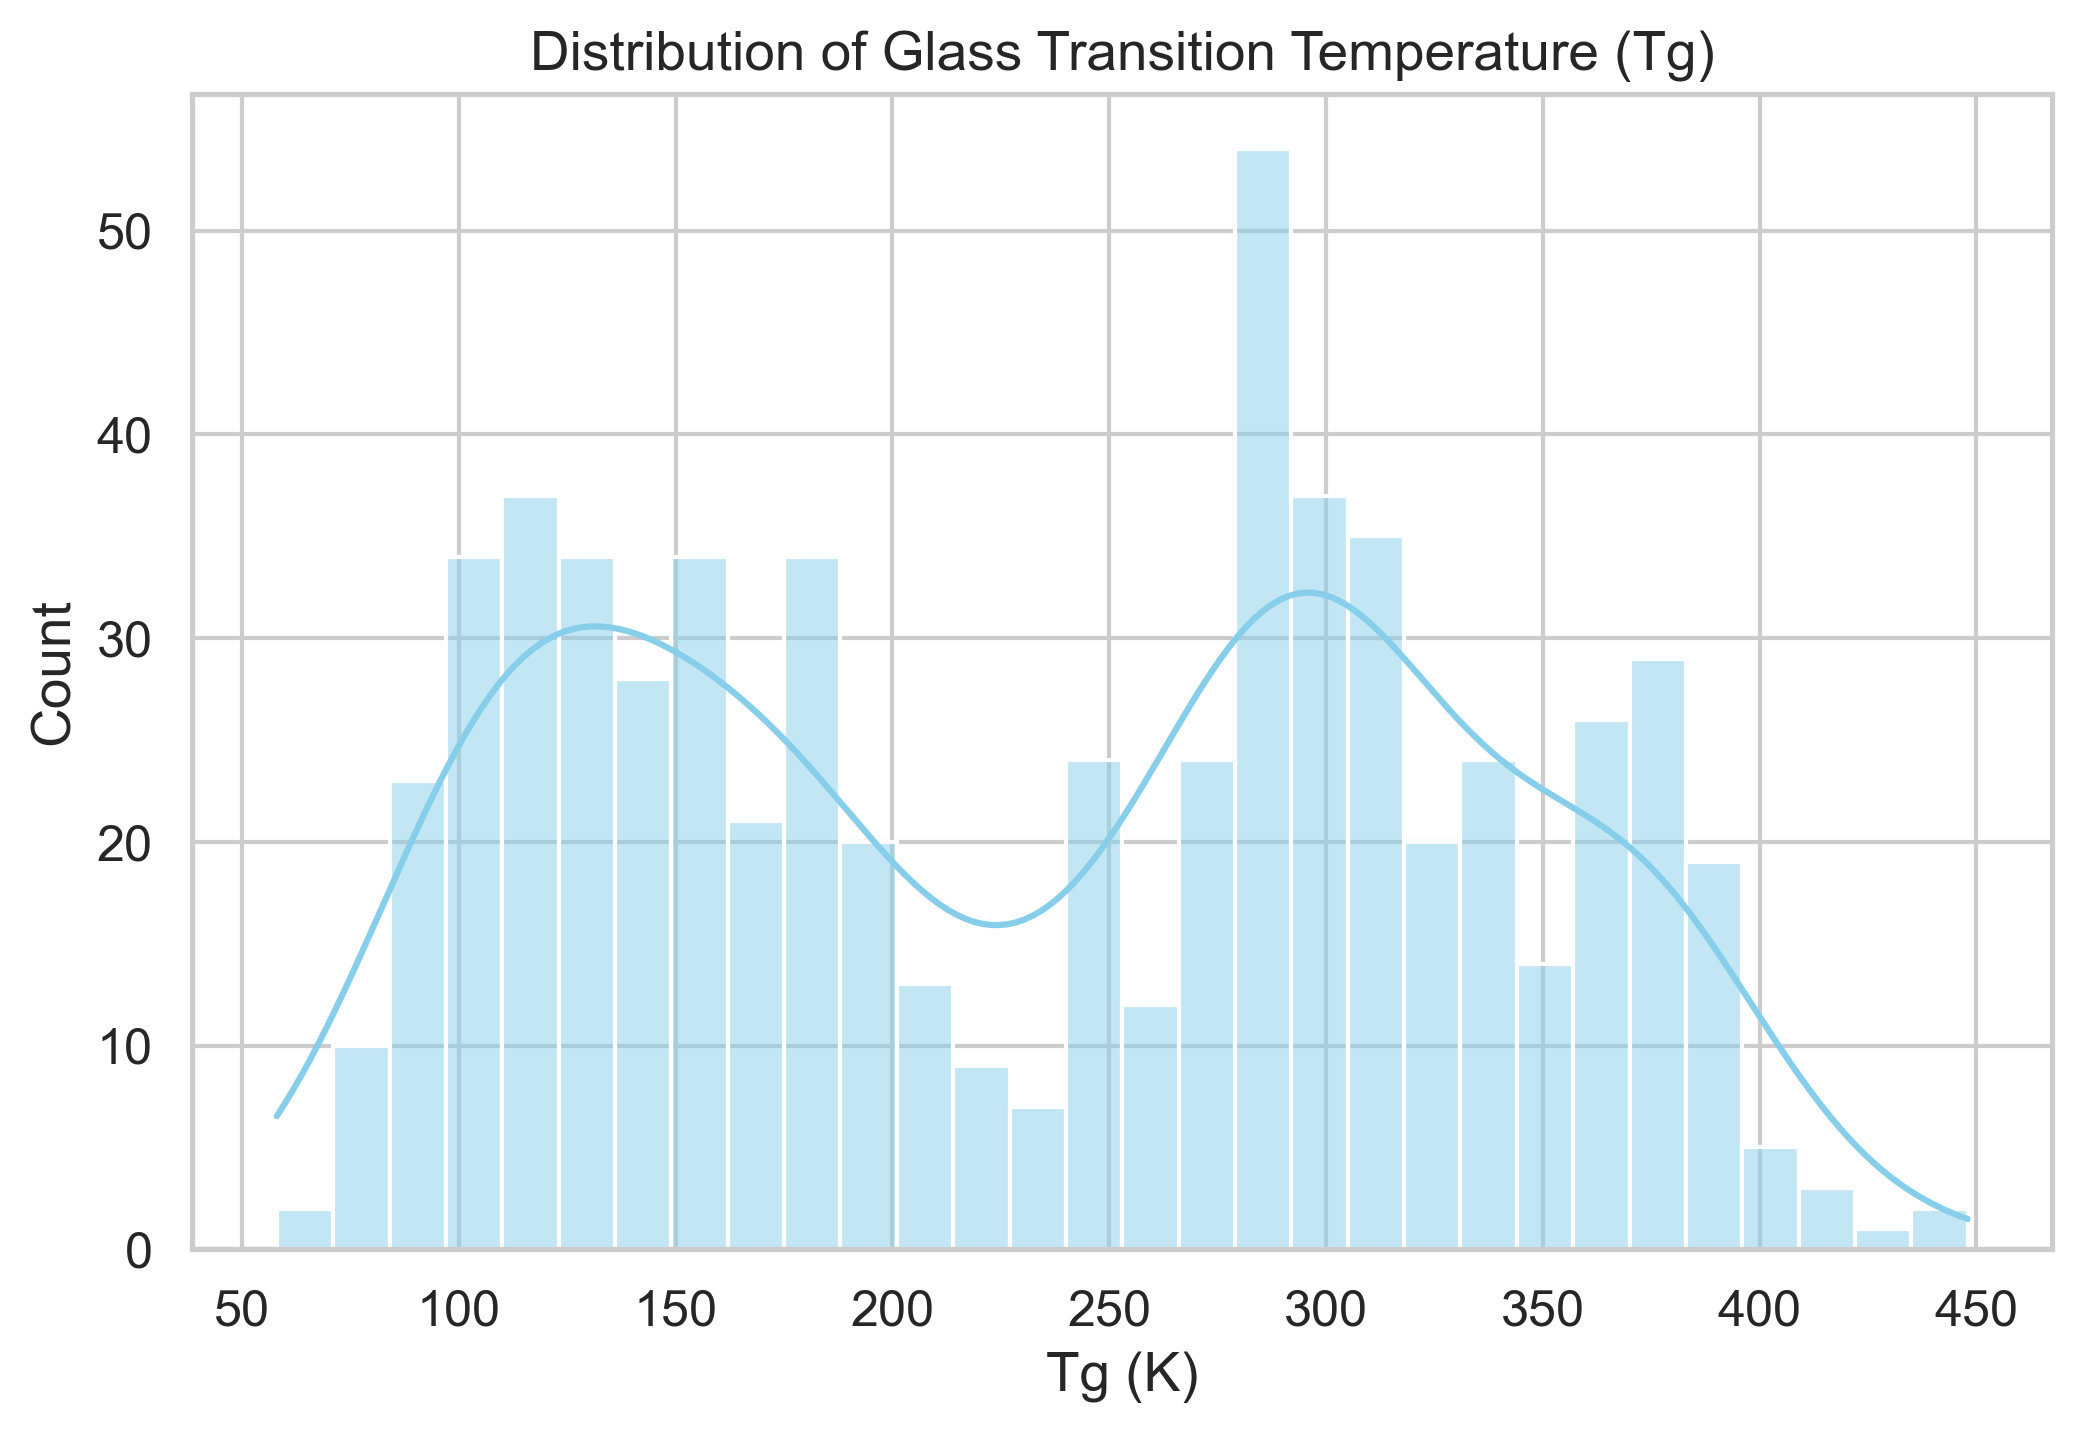

In [76]:
# Target Variable Distribution (Tg)
plt.figure(figsize=(8,5))
sns.histplot(df['Tg'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Glass Transition Temperature (Tg)")
plt.xlabel("Tg (K)")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Descriptors with Tg')

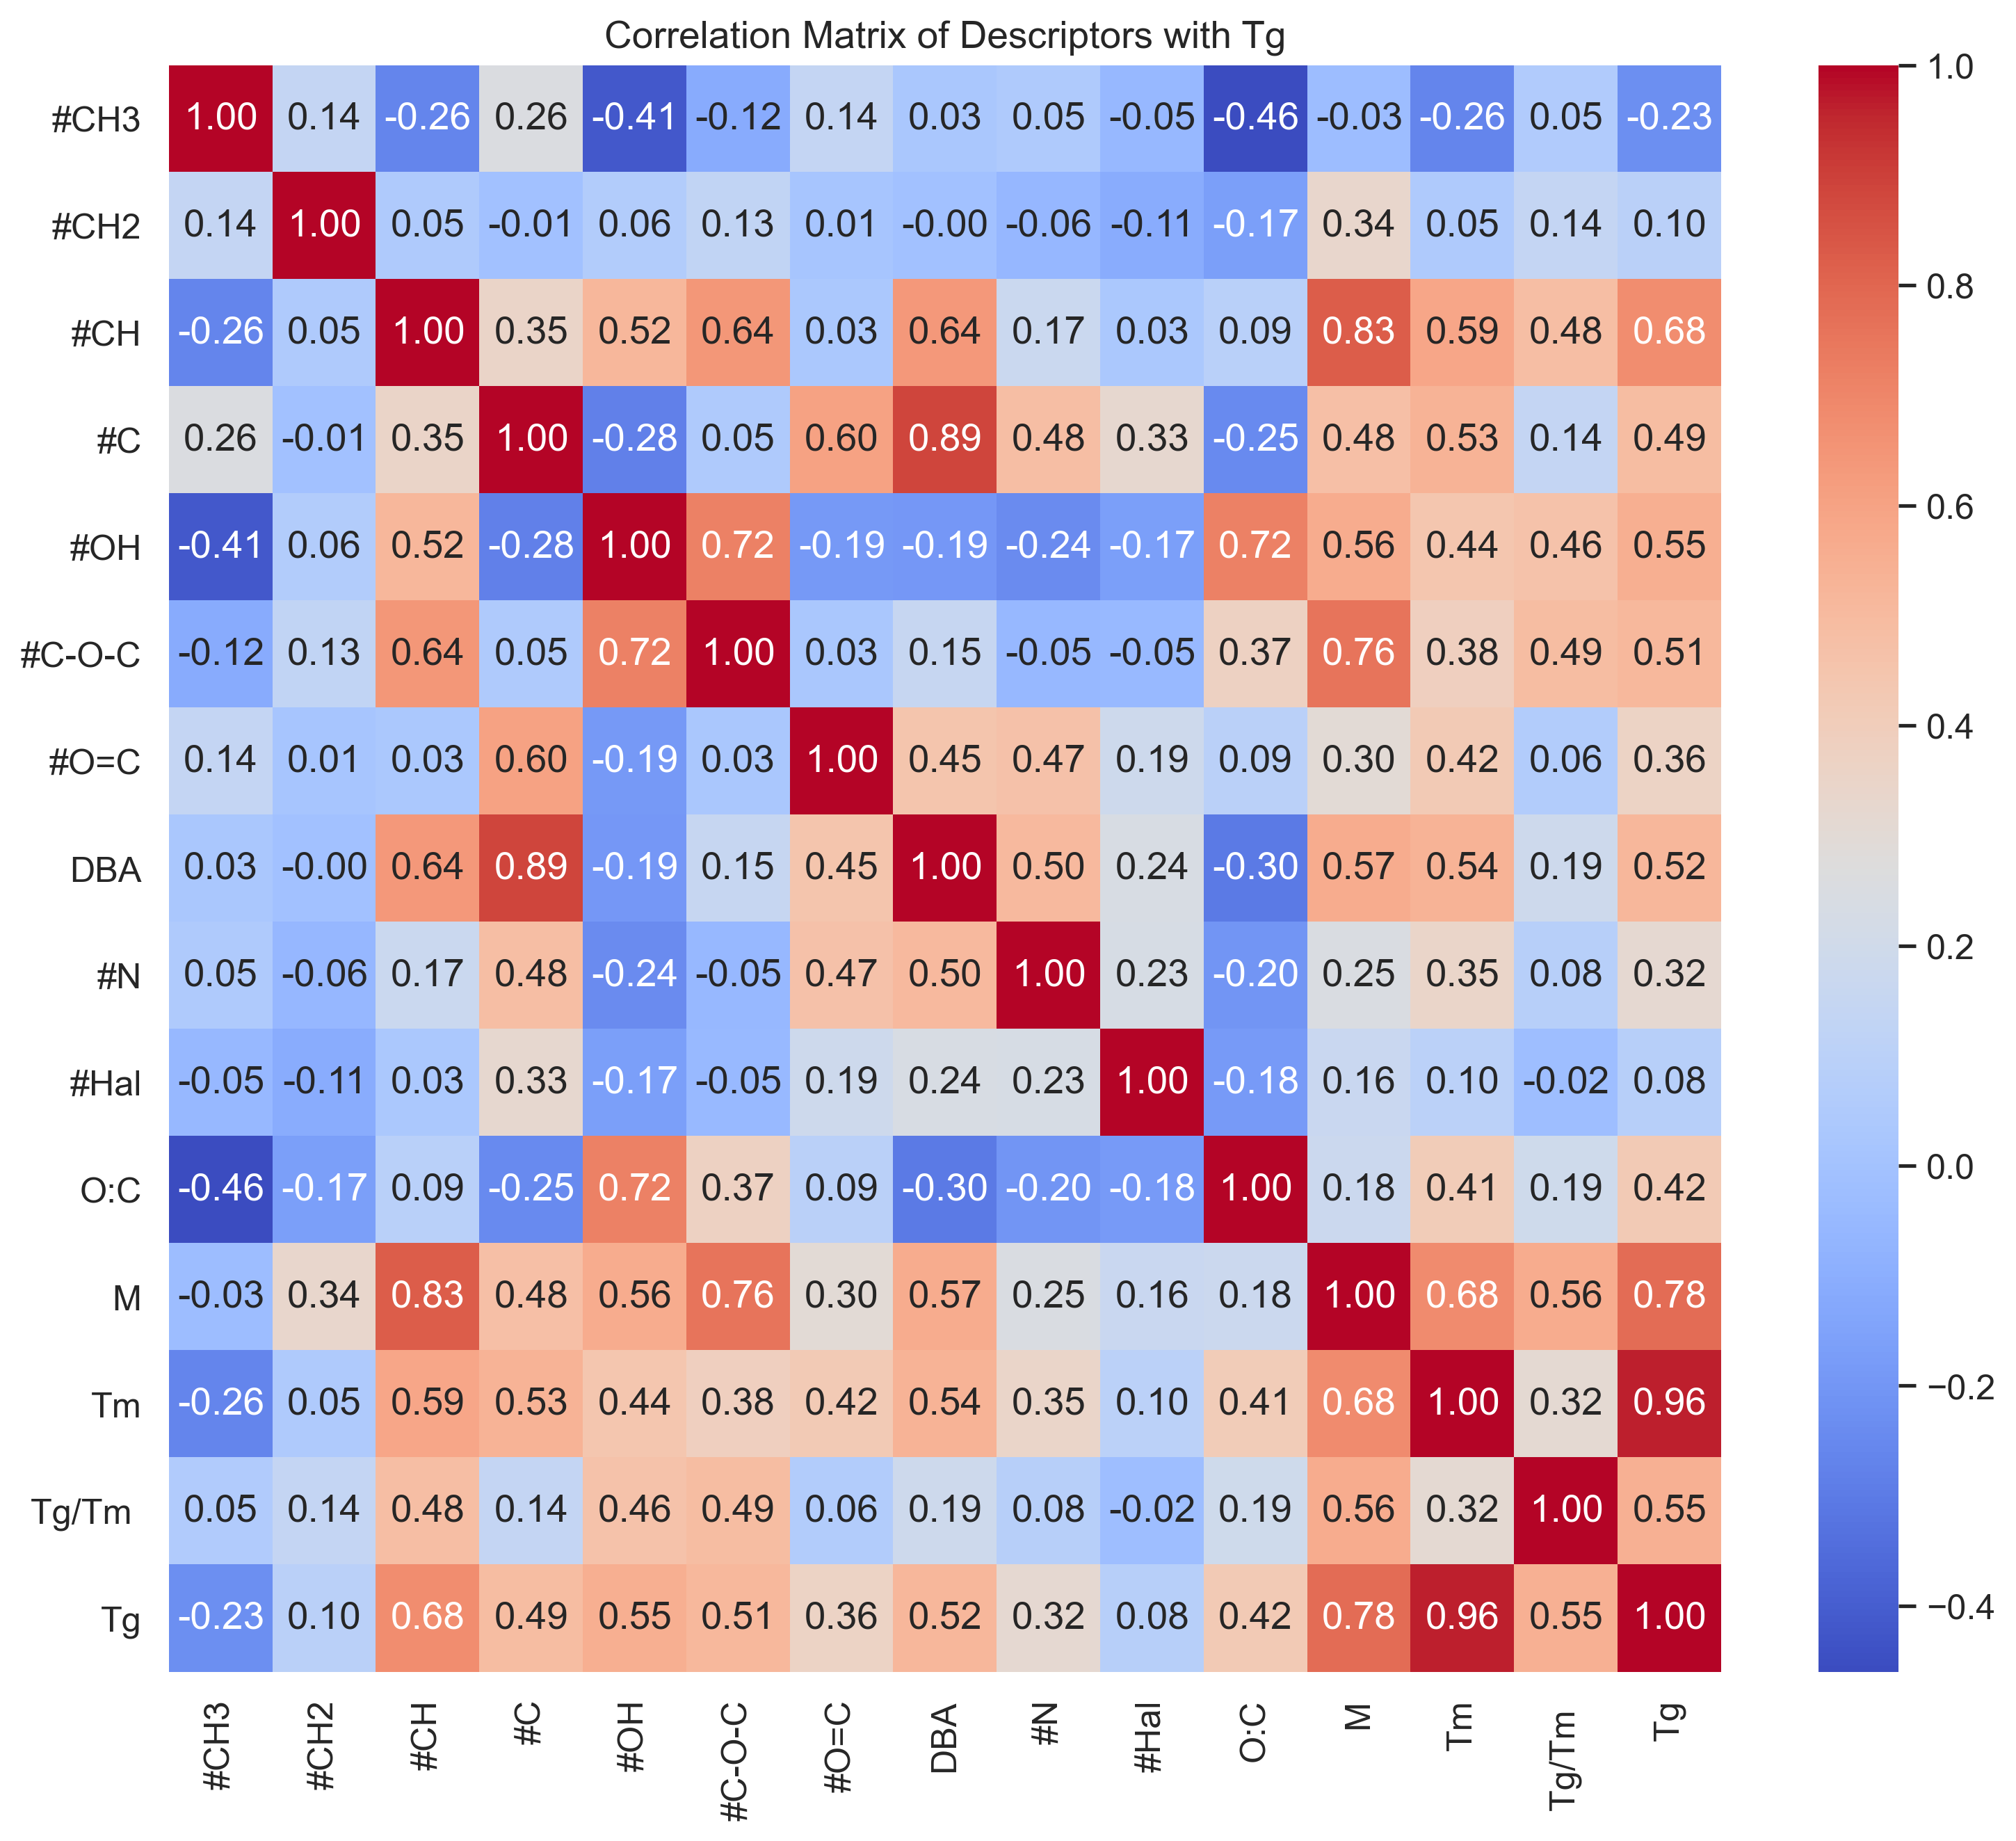

In [77]:
# Correlation Between Features and Tg
numeric_cols = ['#CH3','#CH2','#CH','#C','#OH','#C-O-C','#O=C','DBA','#N','#Hal','O:C','M','Tm','Tg/Tm ']
corr_matrix = df[numeric_cols + ['Tg']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Descriptors with Tg") 
# This helps identify which chemical groups most influence Tg.

Text(0, 0.5, 'Tg (K)')

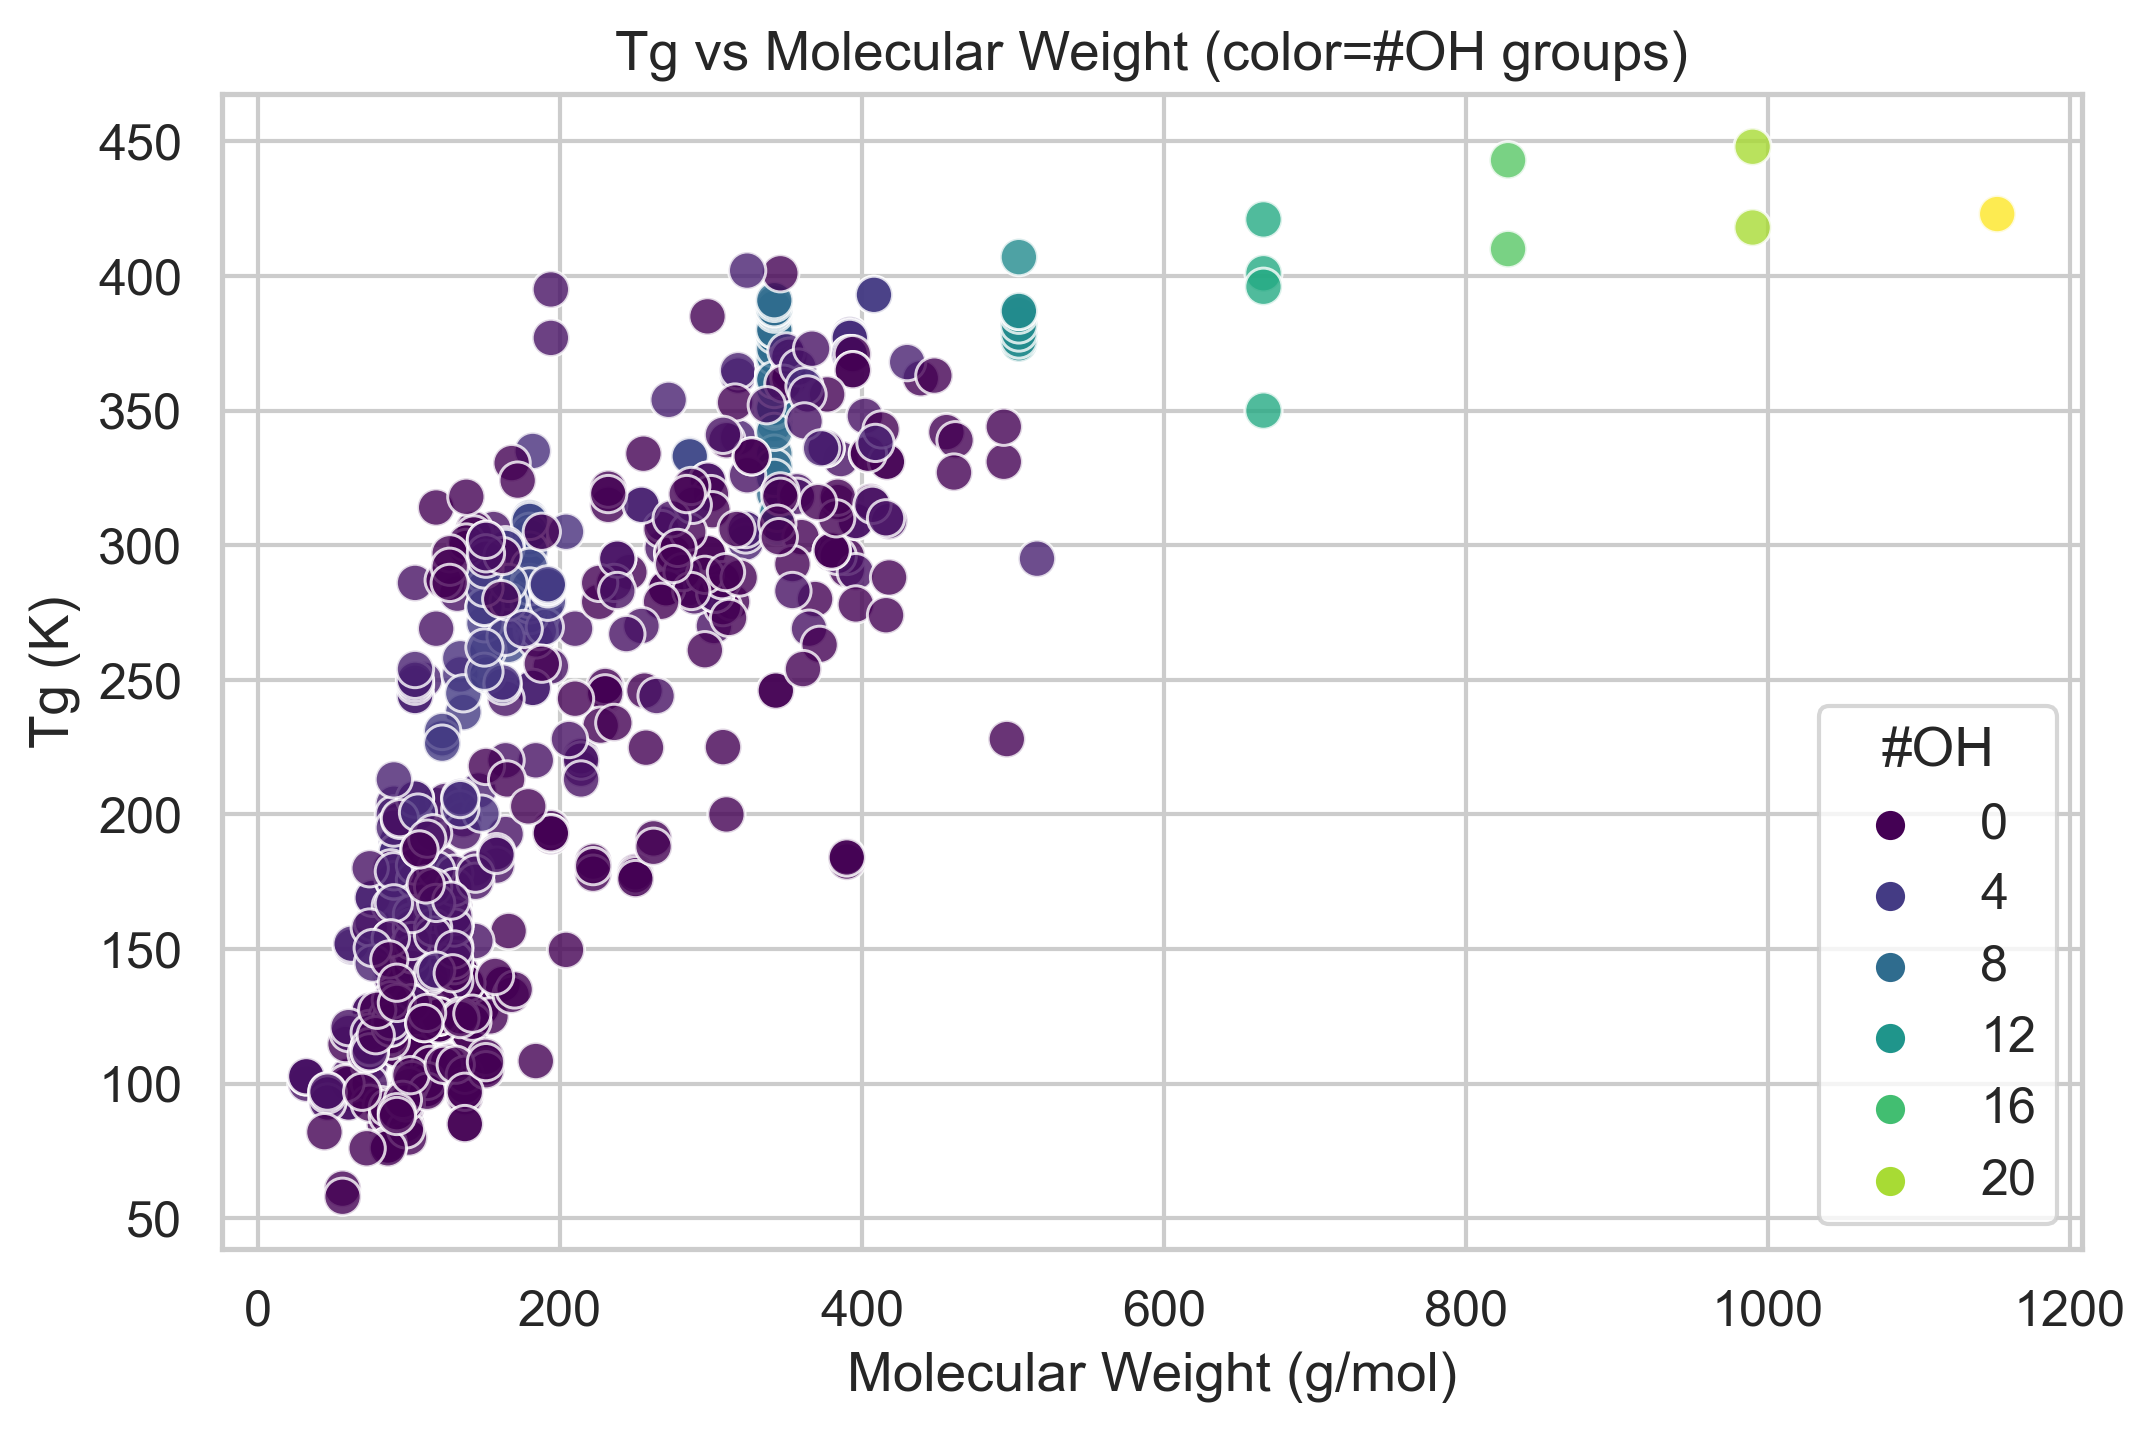

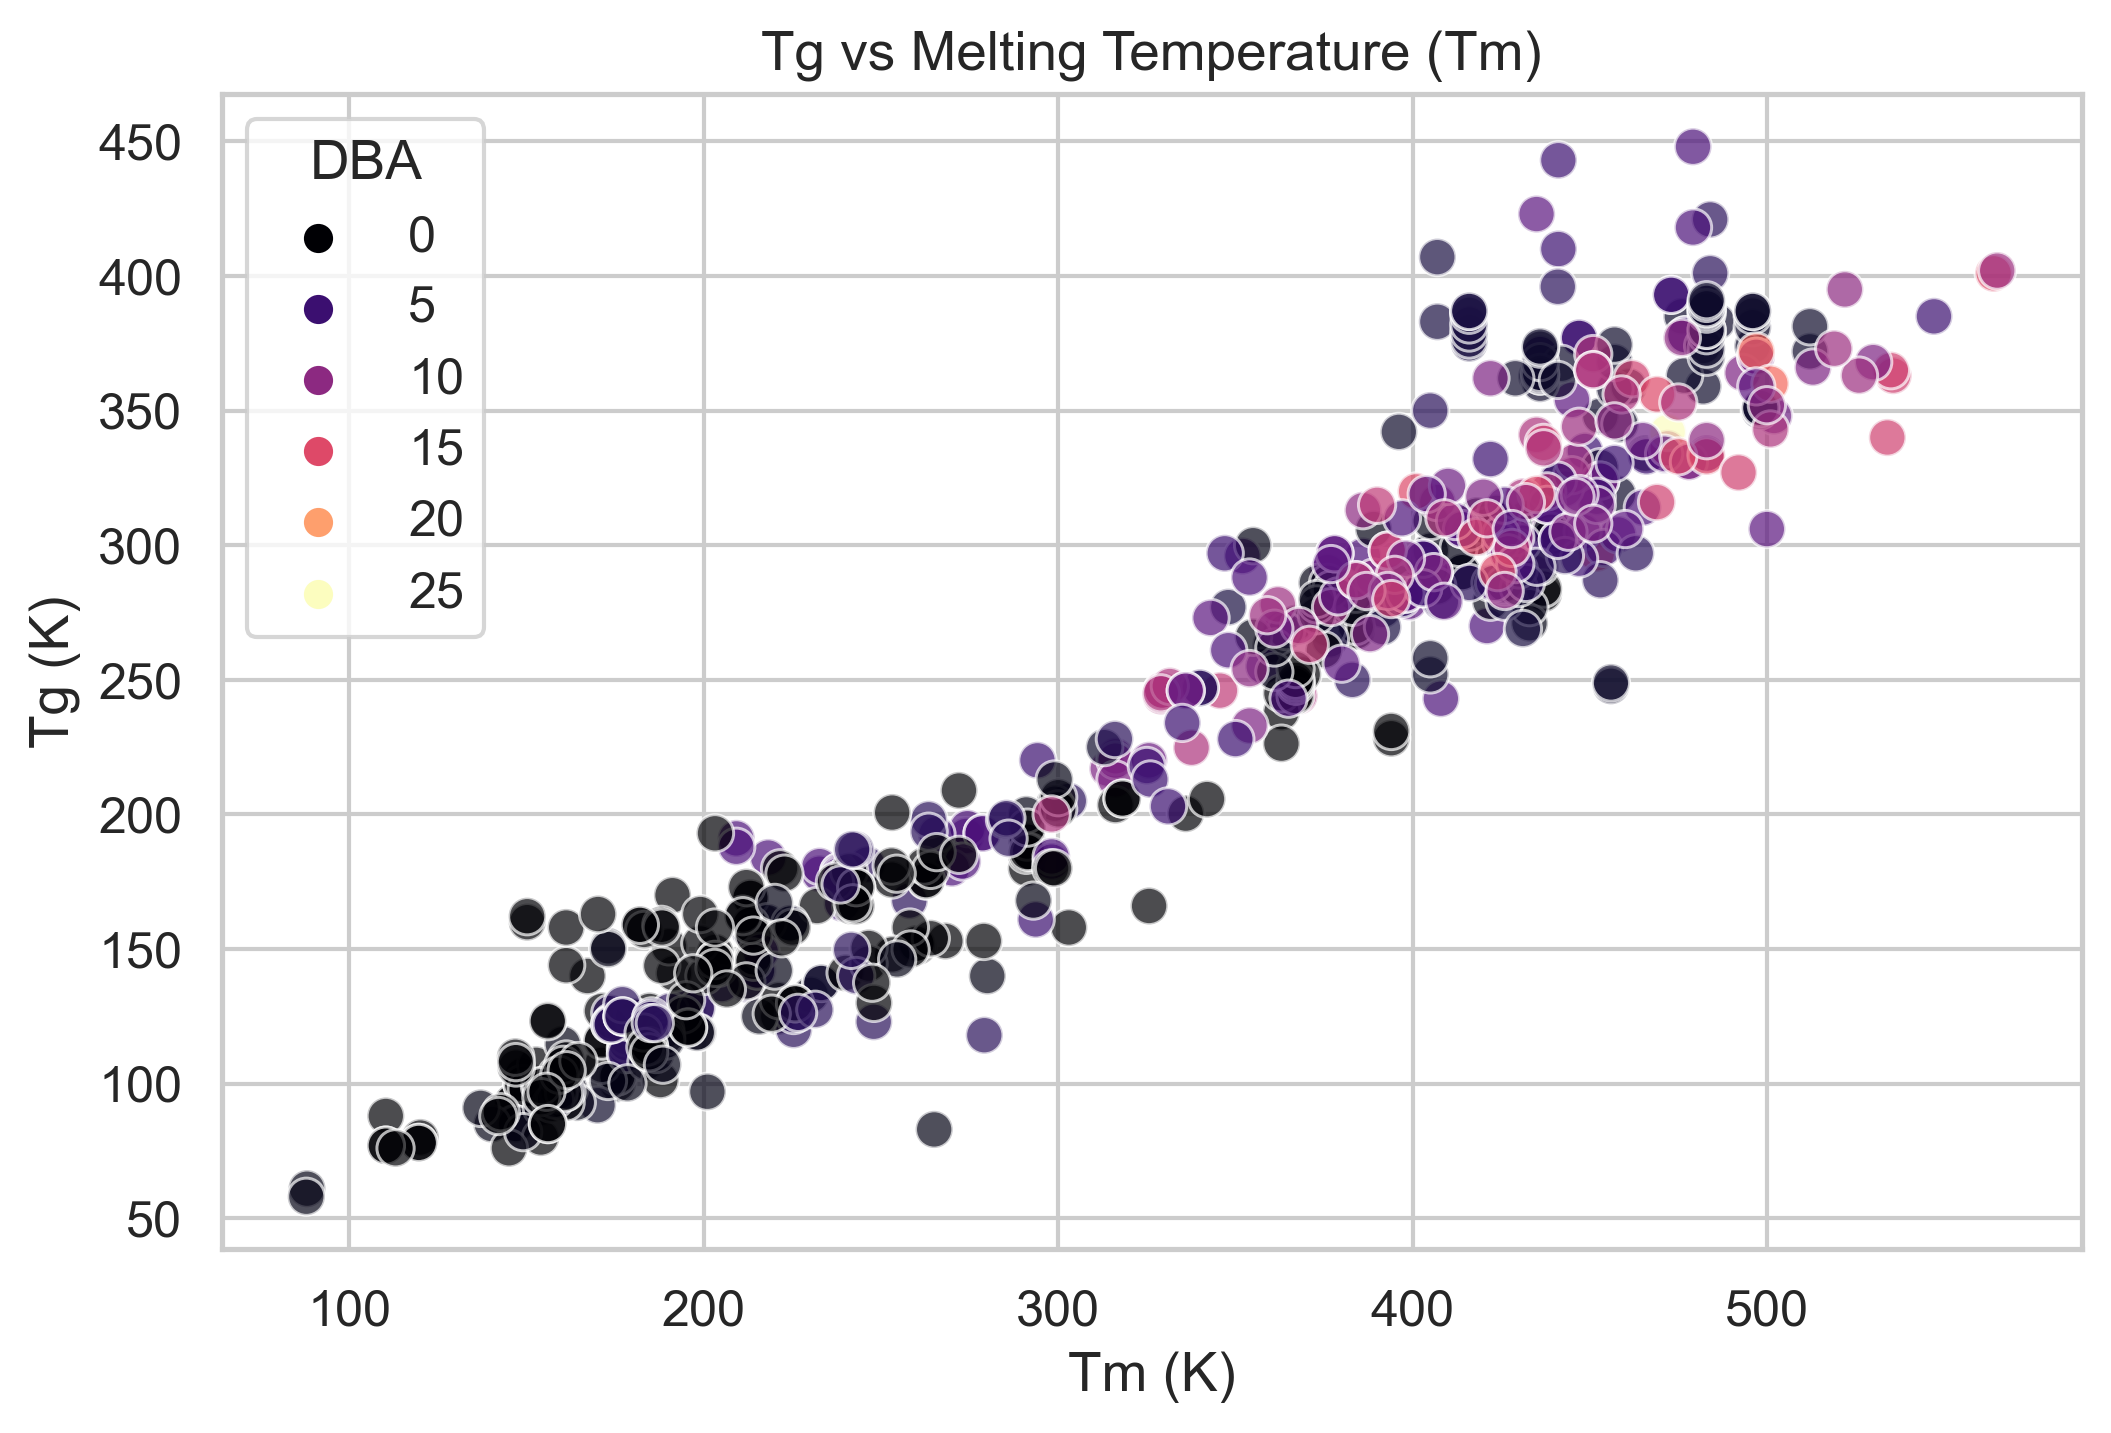

In [78]:
# Tg vs Molecular Weight and Tm (Trend Analysis)
plt.figure(figsize=(8,5))
sns.scatterplot(x='M', y='Tg', data=df, hue='#OH', palette='viridis', s=80, alpha =0.8)
plt.title("Tg vs Molecular Weight (color=#OH groups)")
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("Tg (K)")

plt.figure(figsize=(8,5))
sns.scatterplot(x='Tm', y='Tg', data=df, hue='DBA', palette='magma', s=80, alpha =0.7)
plt.title("Tg vs Melting Temperature (Tm)")
plt.xlabel("Tm (K)")
plt.ylabel("Tg (K)")

Text(0, 0.5, 'Count')

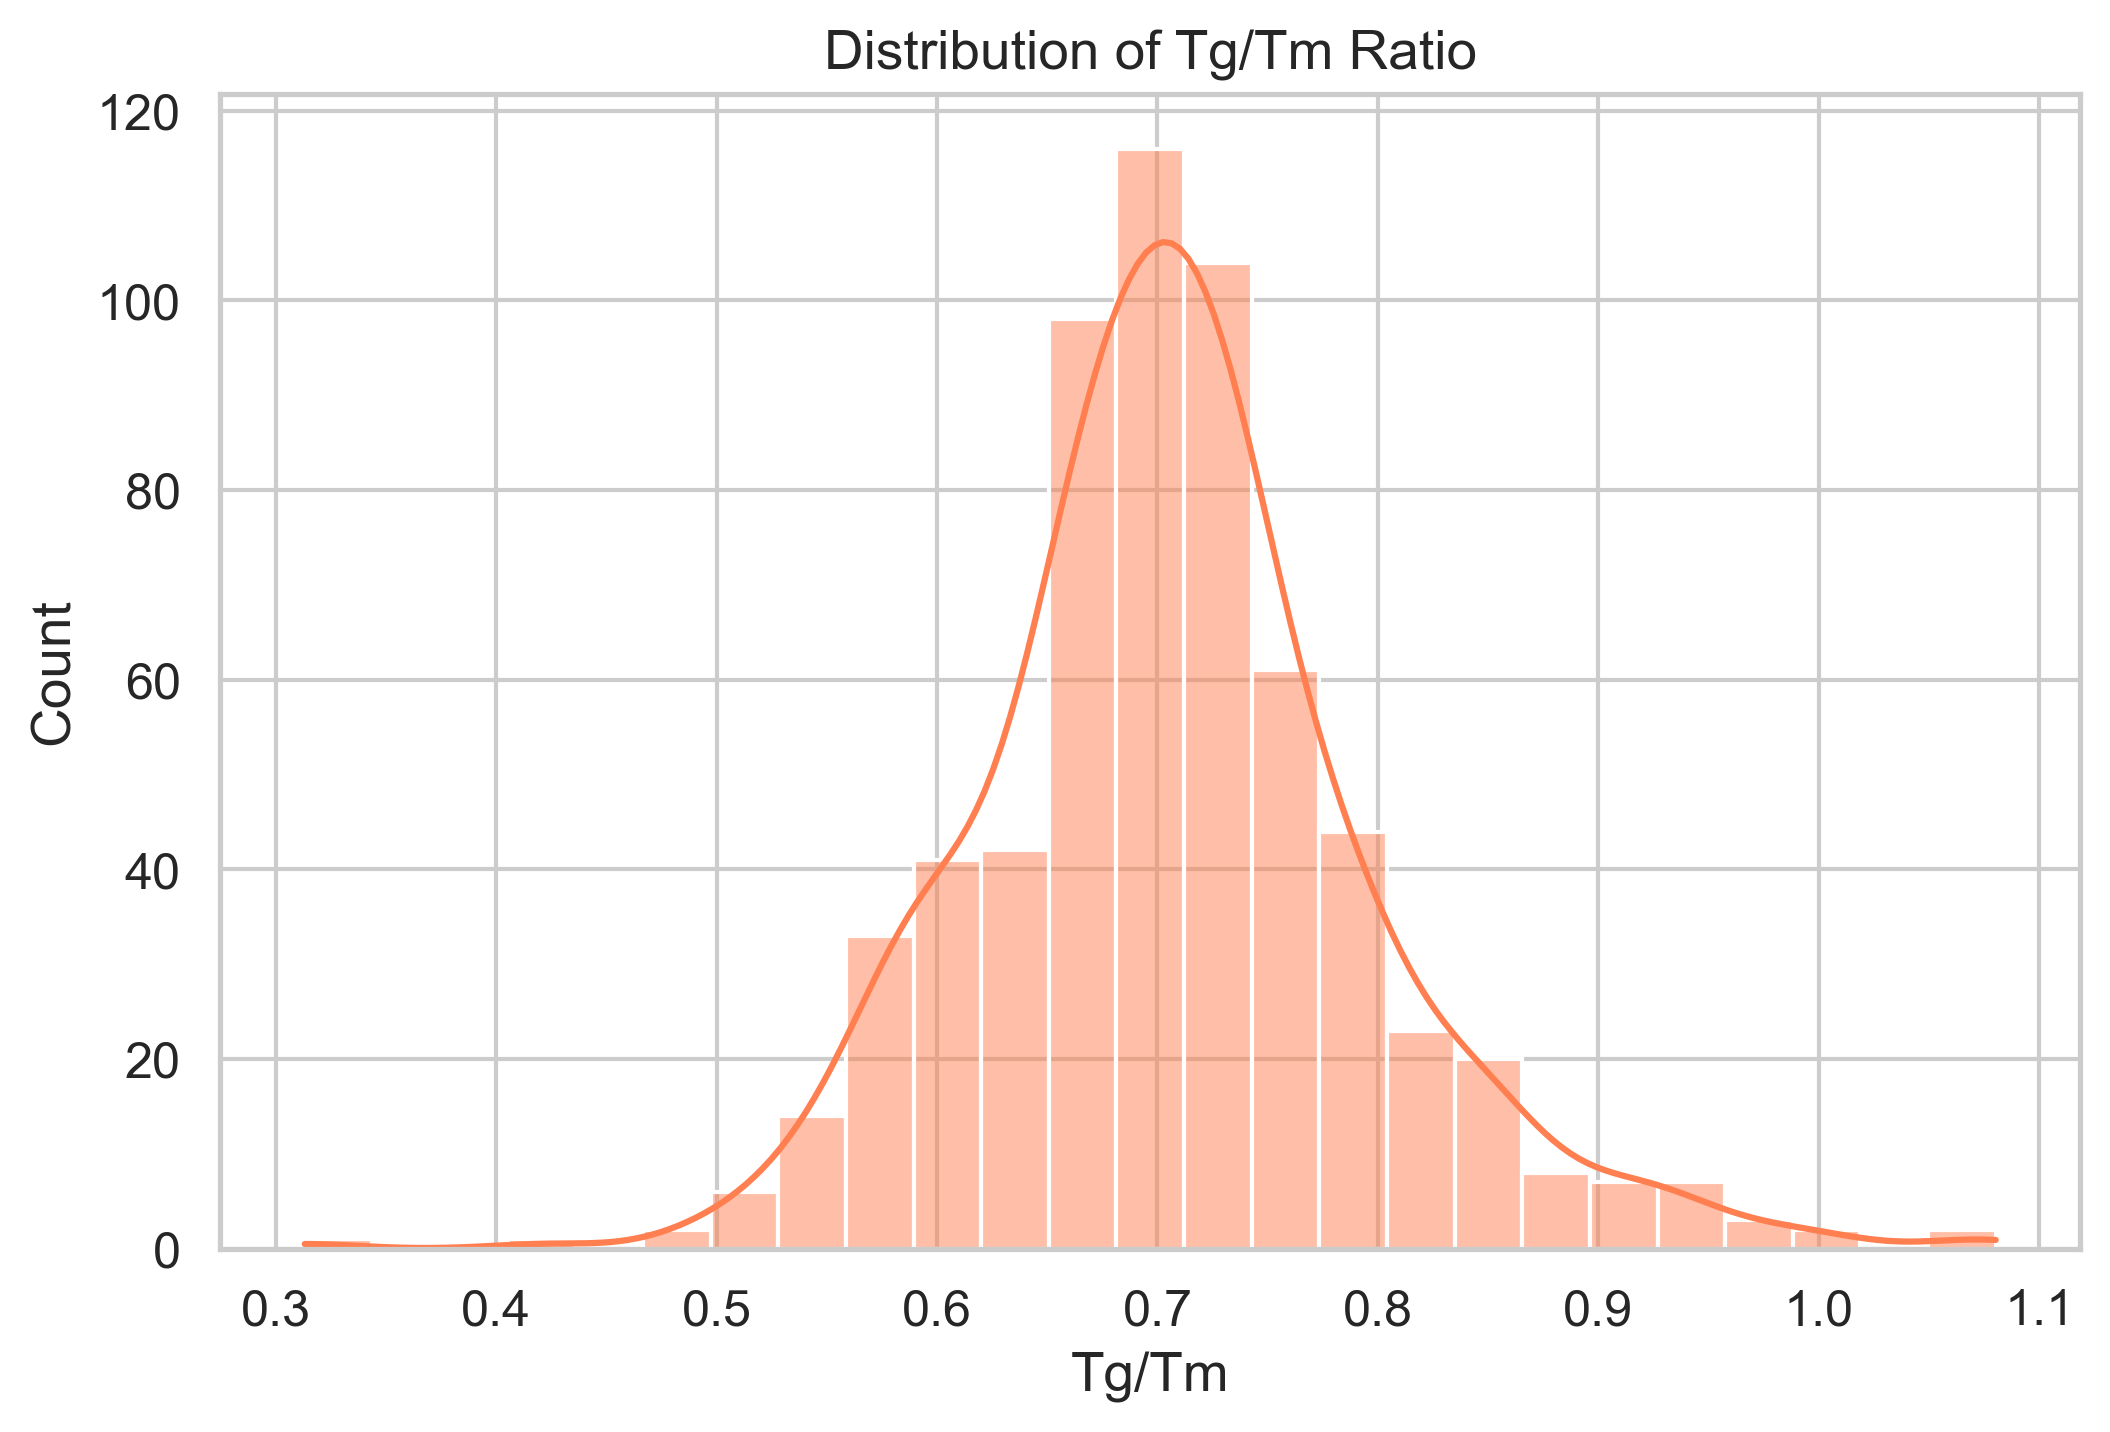

In [79]:
# Tg/Tm Ratio Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Tg/Tm '], bins=25, kde=True, color='coral')
plt.title("Distribution of Tg/Tm Ratio")
plt.xlabel("Tg/Tm")
plt.ylabel("Count")

Text(0.5, 1.0, 'Influence of Features on Glass Transition Temperature (Tg)')

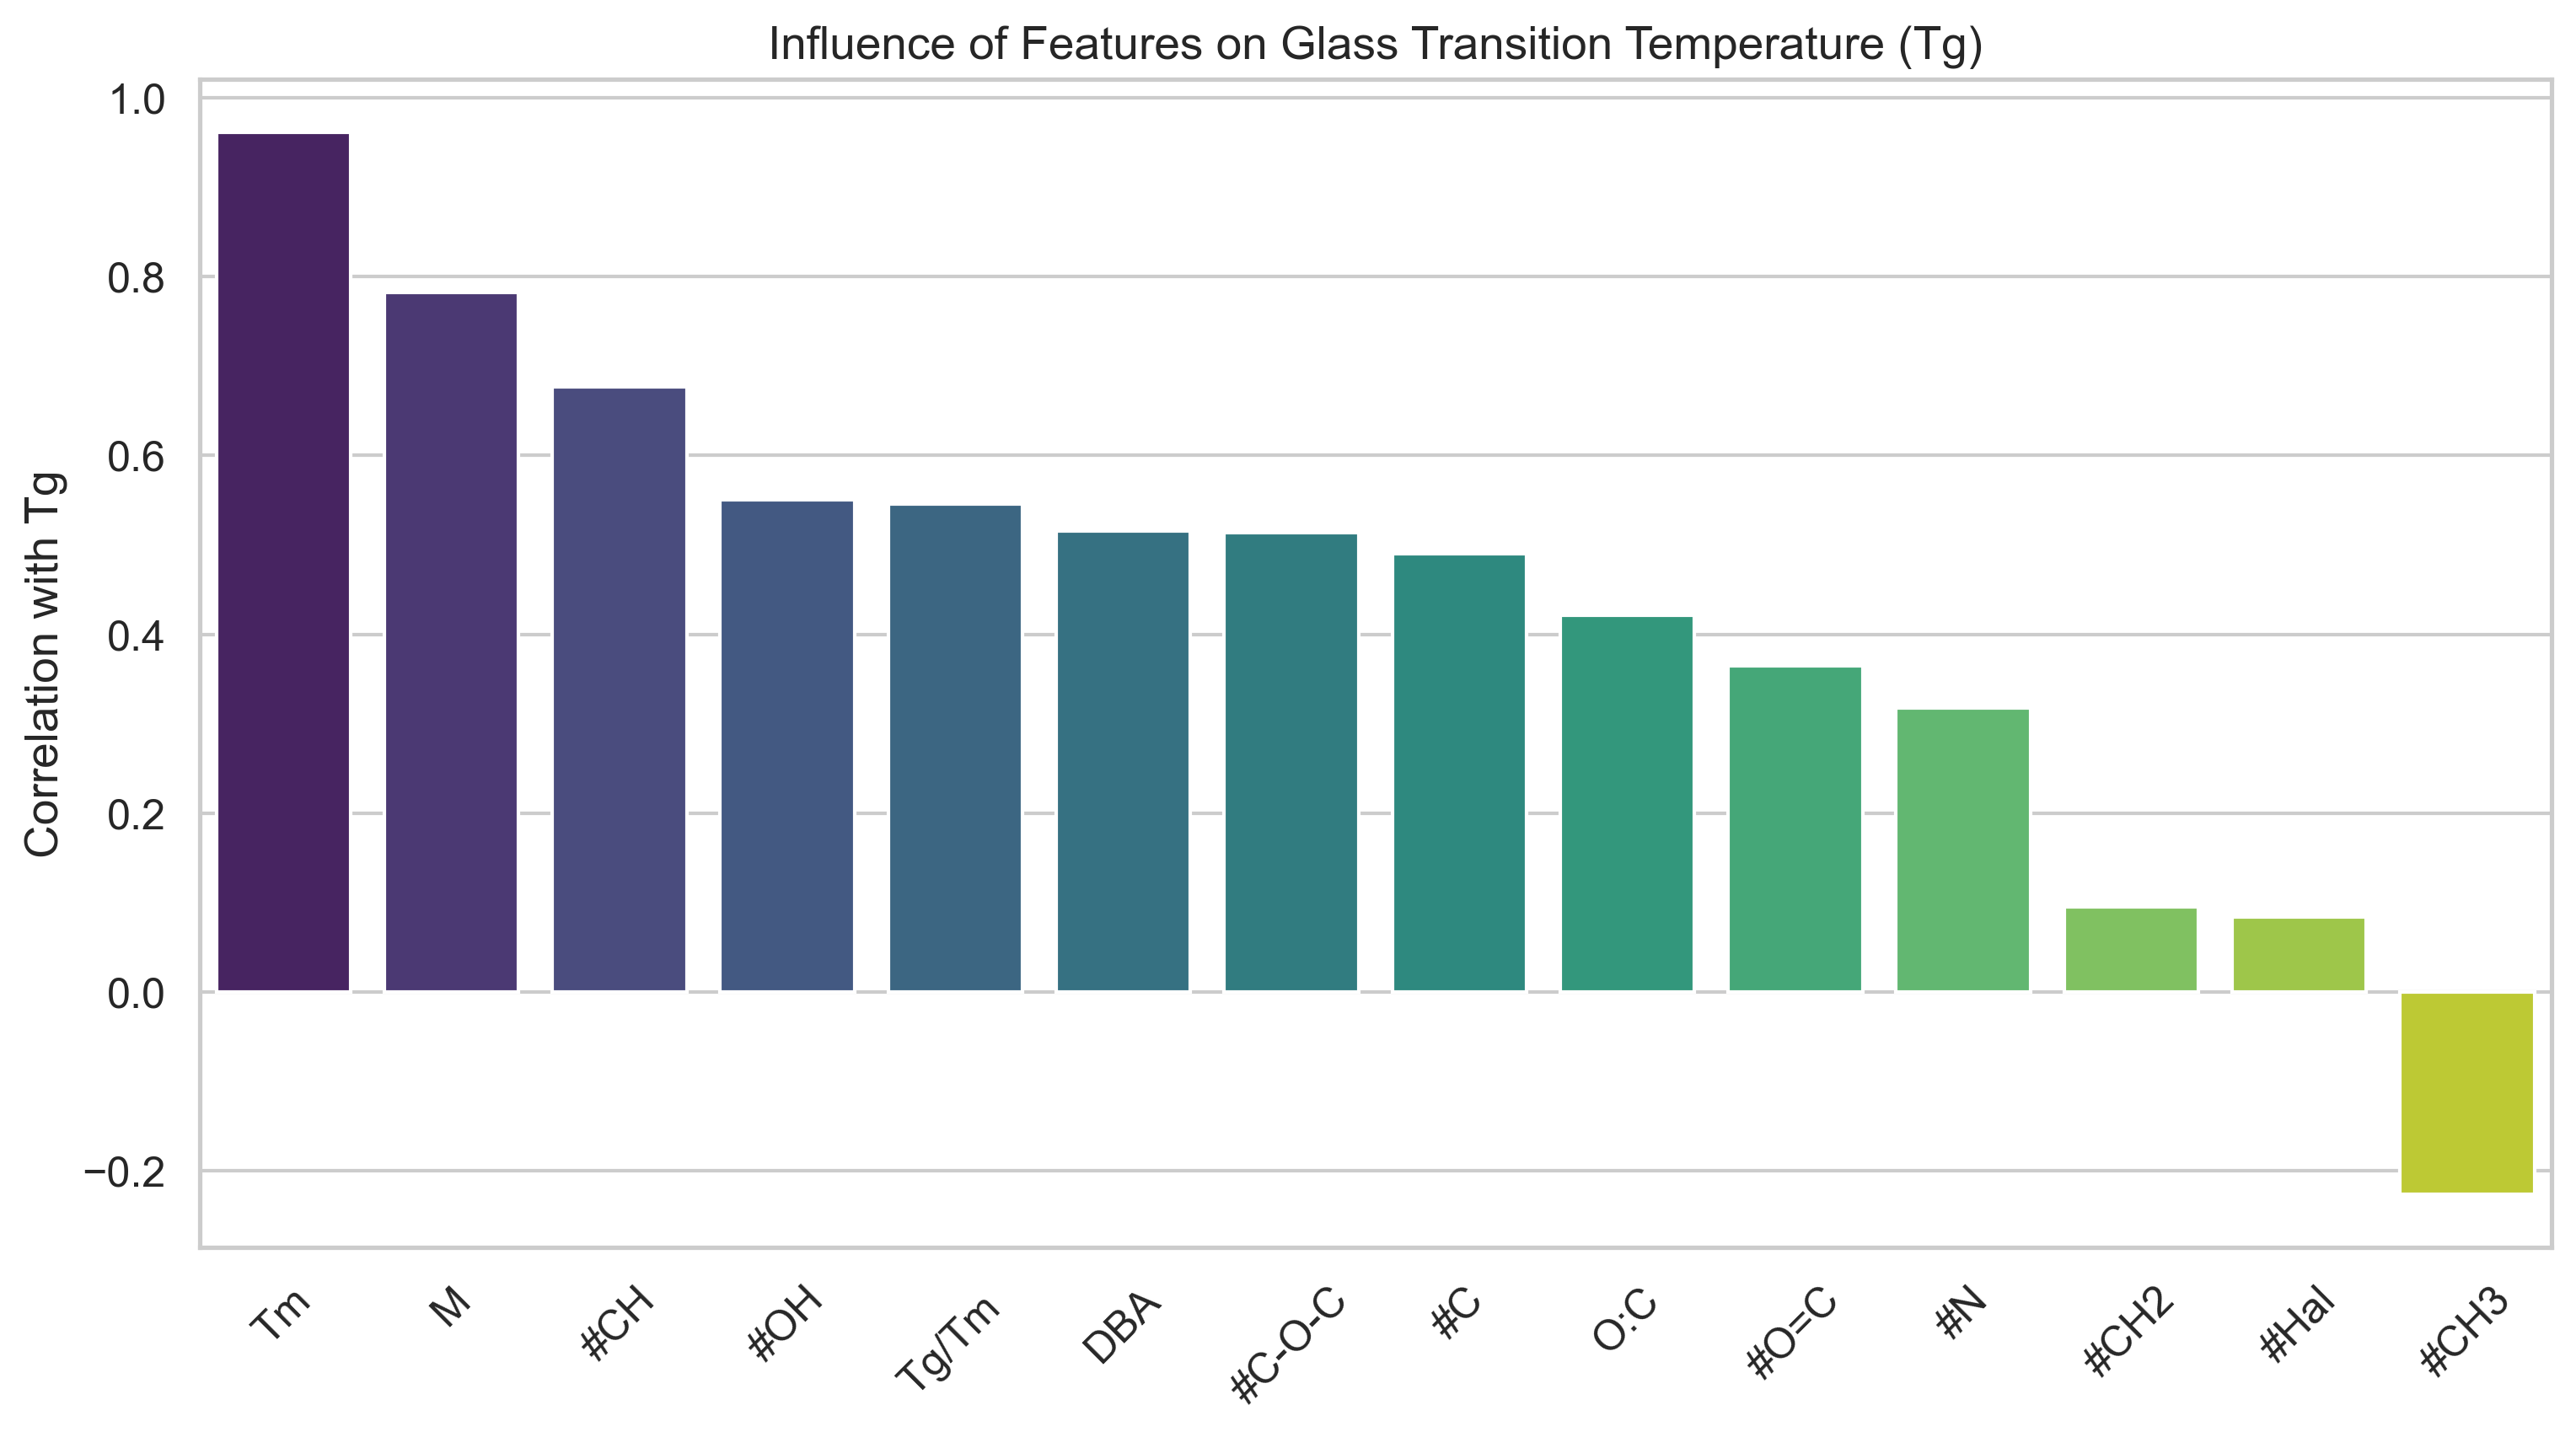

In [80]:
# List of numeric chemical descriptors
numeric_features = ['#CH3','#CH2','#CH','#C','#OH','#C-O-C','#O=C','DBA','#N','#Hal','O:C','M','Tm','Tg/Tm ']

# Compute correlation with Tg
tg_corr = df[numeric_features + ['Tg']].corr()['Tg'].drop('Tg').sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=tg_corr.index, y=tg_corr.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Correlation with Tg")
plt.title("Influence of Features on Glass Transition Temperature (Tg)")

##### So it seems, melting temperature Tm  is highly correlated to Tg 

In [81]:
df.columns

Index(['Name', 'Formula', '#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C',
       'DBA', '#N', '#Hal', 'O:C', 'M', 'Tm', 'Tg', 'Tg/Tm ', 'Reference(Tm)',
       'Reference(Tg)', 'SMILES', 'Figure'],
      dtype='object')

# **Prediction Model**

## Functional Group (FG) Mode 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
df.columns = df.columns.str.strip()
# features for Functional Group Mode
fg_features = ['#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C', 'DBA', '#N', '#Hal', 'O:C', 'M', 'Tm']
X = df[fg_features]
y = df['Tg']  # target

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# trying multiple models - Random Forest, Extra Trees, and Gradient Boosting Regressor first.
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# defineing models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    
# results
results_df = pd.DataFrame(results).T
results_df


MSE        R2
RandomForest      150.156669  0.982450
ExtraTrees        141.680381  0.983441
GradientBoosting  120.159016  0.985956

### Metric Explanations:

**MSE (Mean Squared Error):**
- Measures the average squared difference between predicted and actual Tg values.
- Lower MSE → predictions are closer to the experimental Tg.

**R² (Coefficient of Determination):**
- R² quantifies how well the model explains the variance in Tg.
- An R² close to 1.0 indicates strong predictive performance.
- → All models have R² > 0.98, showing excellent fit and strong correlation with experimental Tg values.

---

**Interpretation:**
- Gradient Boosting performs best among the three models with the lowest MSE (120.16 K²) and highest R² (0.9859).

- All models show strong performance (R² > 0.98), meaning functional group descriptors are highly predictive of Tg in this dataset.

Differences in performance suggest Gradient Boosting slightly better captures nonlinear relationships between chemical groups and Tg.


---
#### Overall Conclusion

- All three models perform exceptionally well, but Gradient Boosting Regressor slightly outperforms the others.
- On average, the Gradient Boosting model predicts Tg values within roughly ±11 K of the actual experimental value — which is acceptable for material property prediction tasks.

- This indicates that the selected functional group descriptors capture meaningful chemical–thermal relationships, making the Functional Group Mode representation a robust basis for Tg prediction.

Predicted vs Experimental Tg Plot

Explanation

This plot compares actual Tg (experimental) values with predicted Tg (from our ML model).
The solid 1:1 line represents perfect prediction — any point on this line means the model got that value exactly right.

Easy definition:
If a dot is above the line → the model underpredicted Tg.
If it’s below the line → the model overpredicted Tg.

In [87]:
# Final Model Training 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# only numeric feature columns
feature_cols = ['#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C',
                'DBA', '#N', '#Hal', 'O:C', 'M', 'Tm']
target_col = 'Tg'

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train final model
from sklearn.ensemble import GradientBoostingRegressor
best_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_model.predict(X_test_scaled)

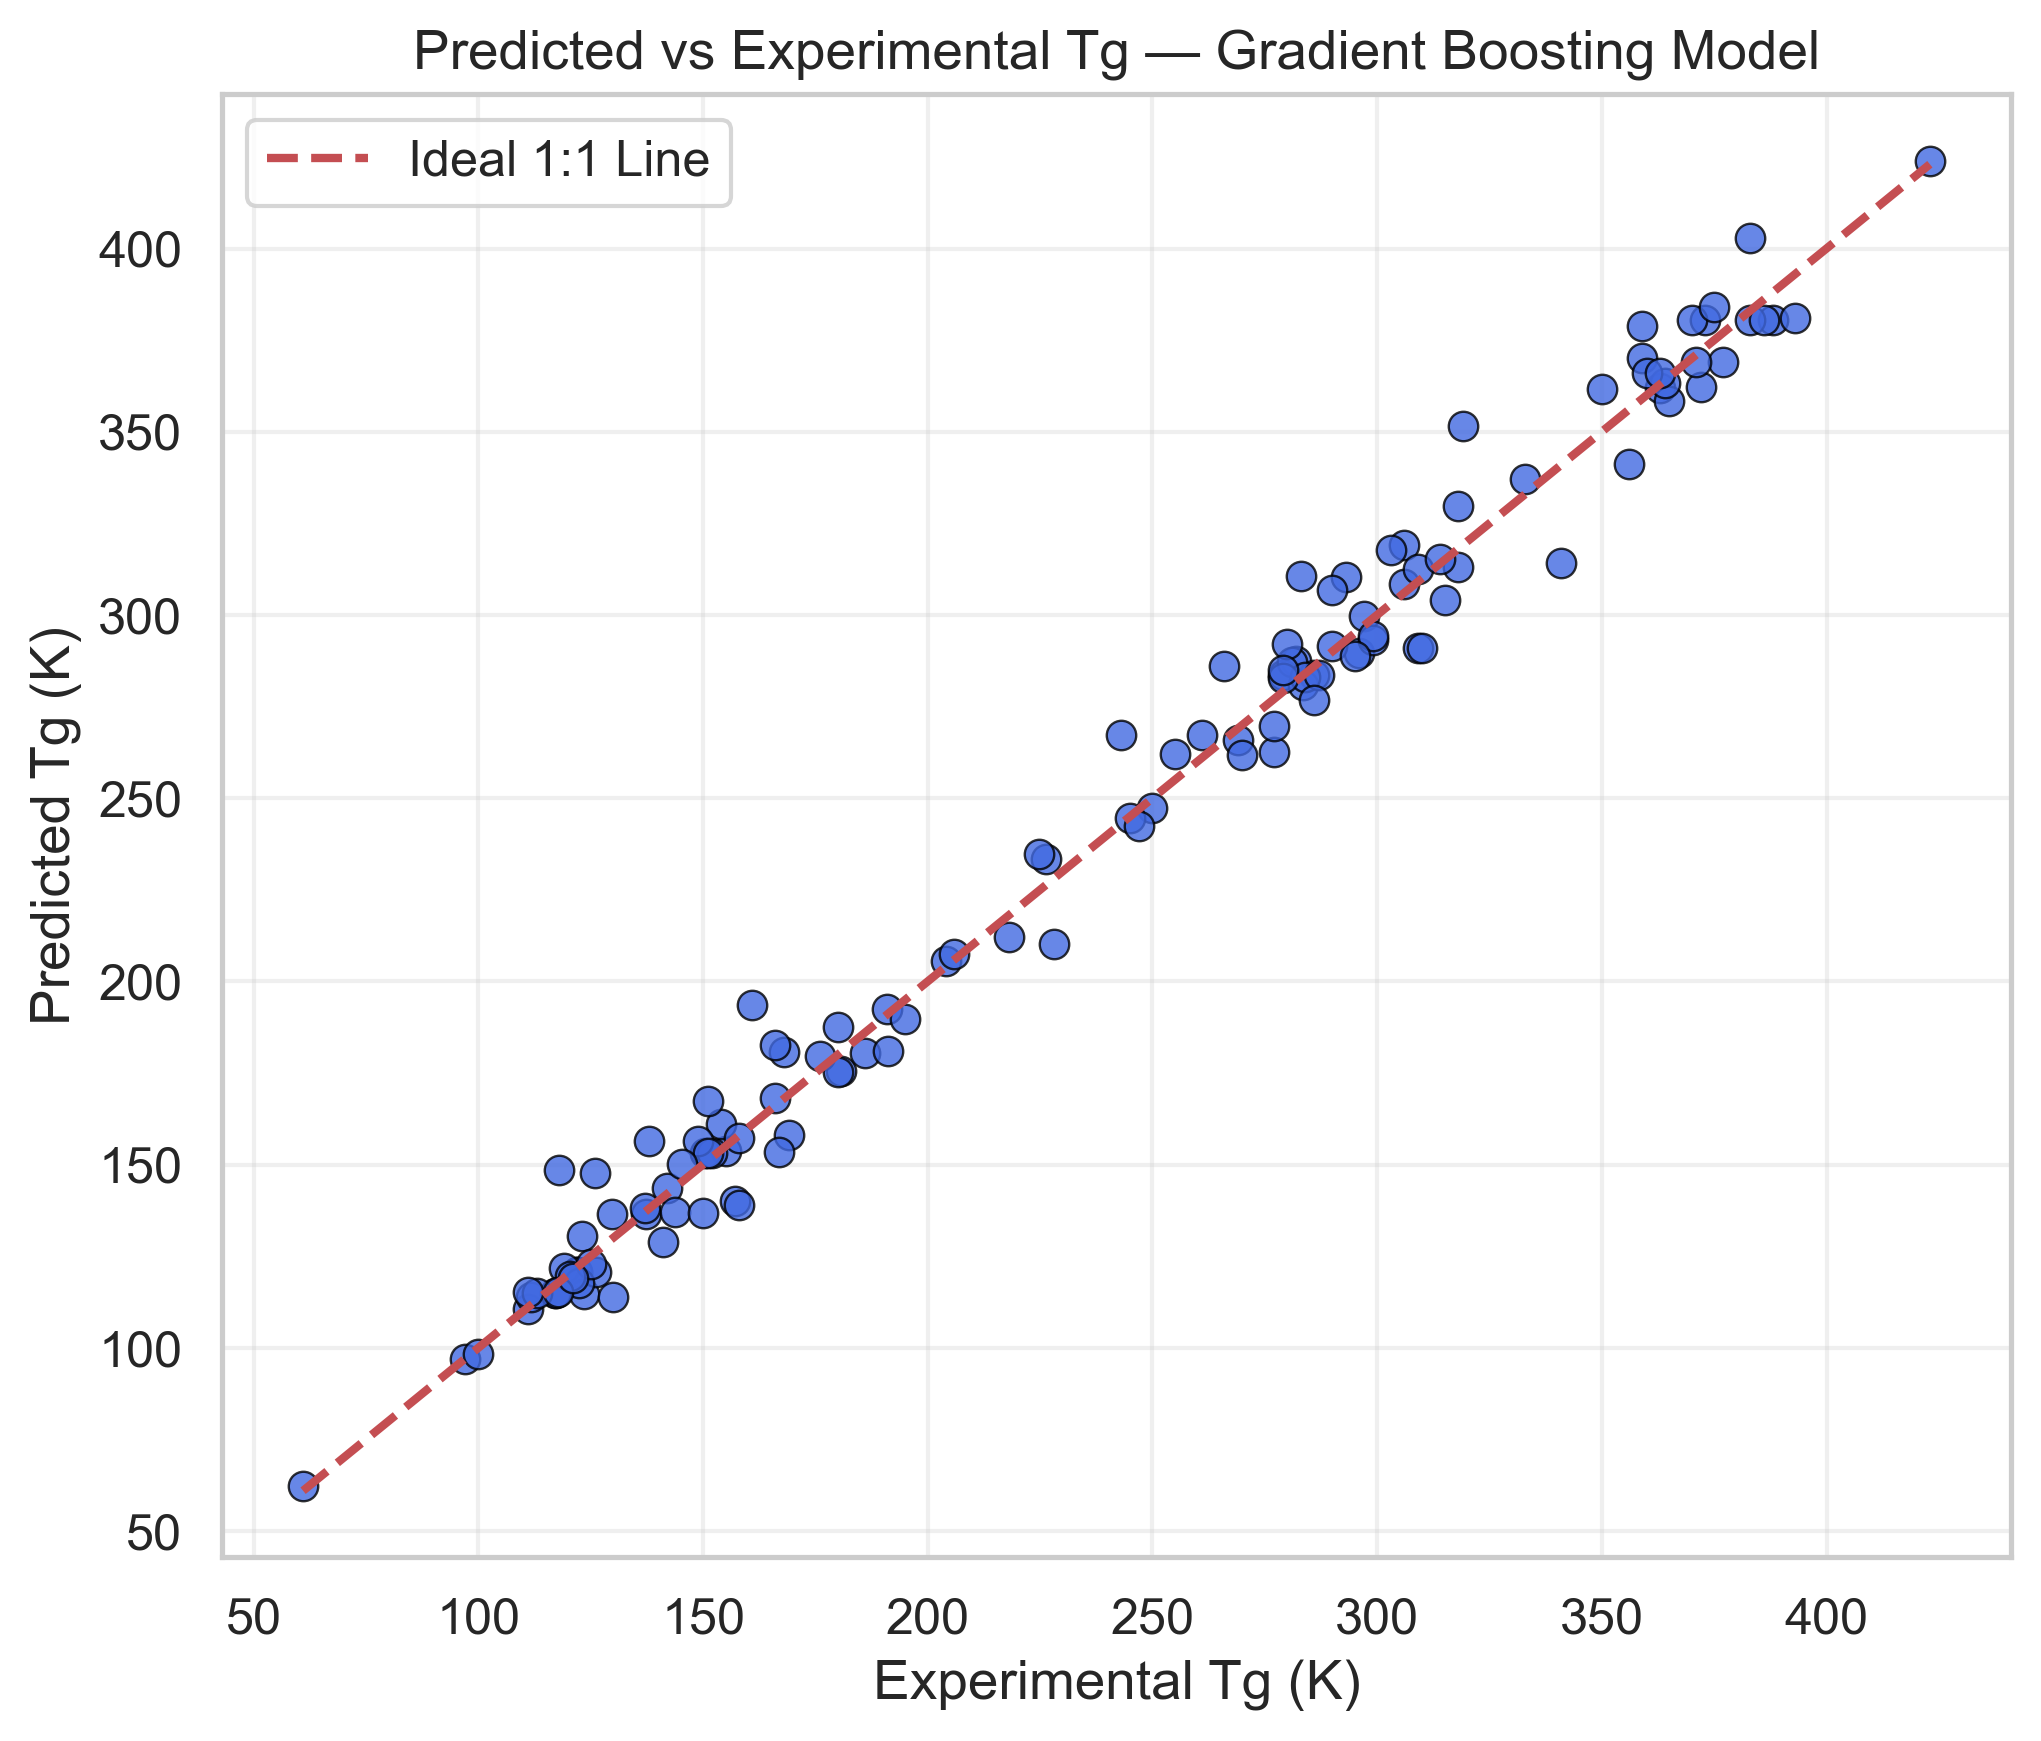

In [88]:
# Predicted vs Experimental Tg Plot
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=50, edgecolor='black', alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal 1:1 Line')
plt.xlabel('Experimental Tg (K)')
plt.ylabel('Predicted Tg (K)')
plt.title('Predicted vs Experimental Tg — Gradient Boosting Model')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

This plot compares actual experimental Tg values (true data) and the Tg values predicted by our model.
If points fall on the 1:1 line, it means the model predicted perfectly.
The closer points are to this line, the more accurate the model.

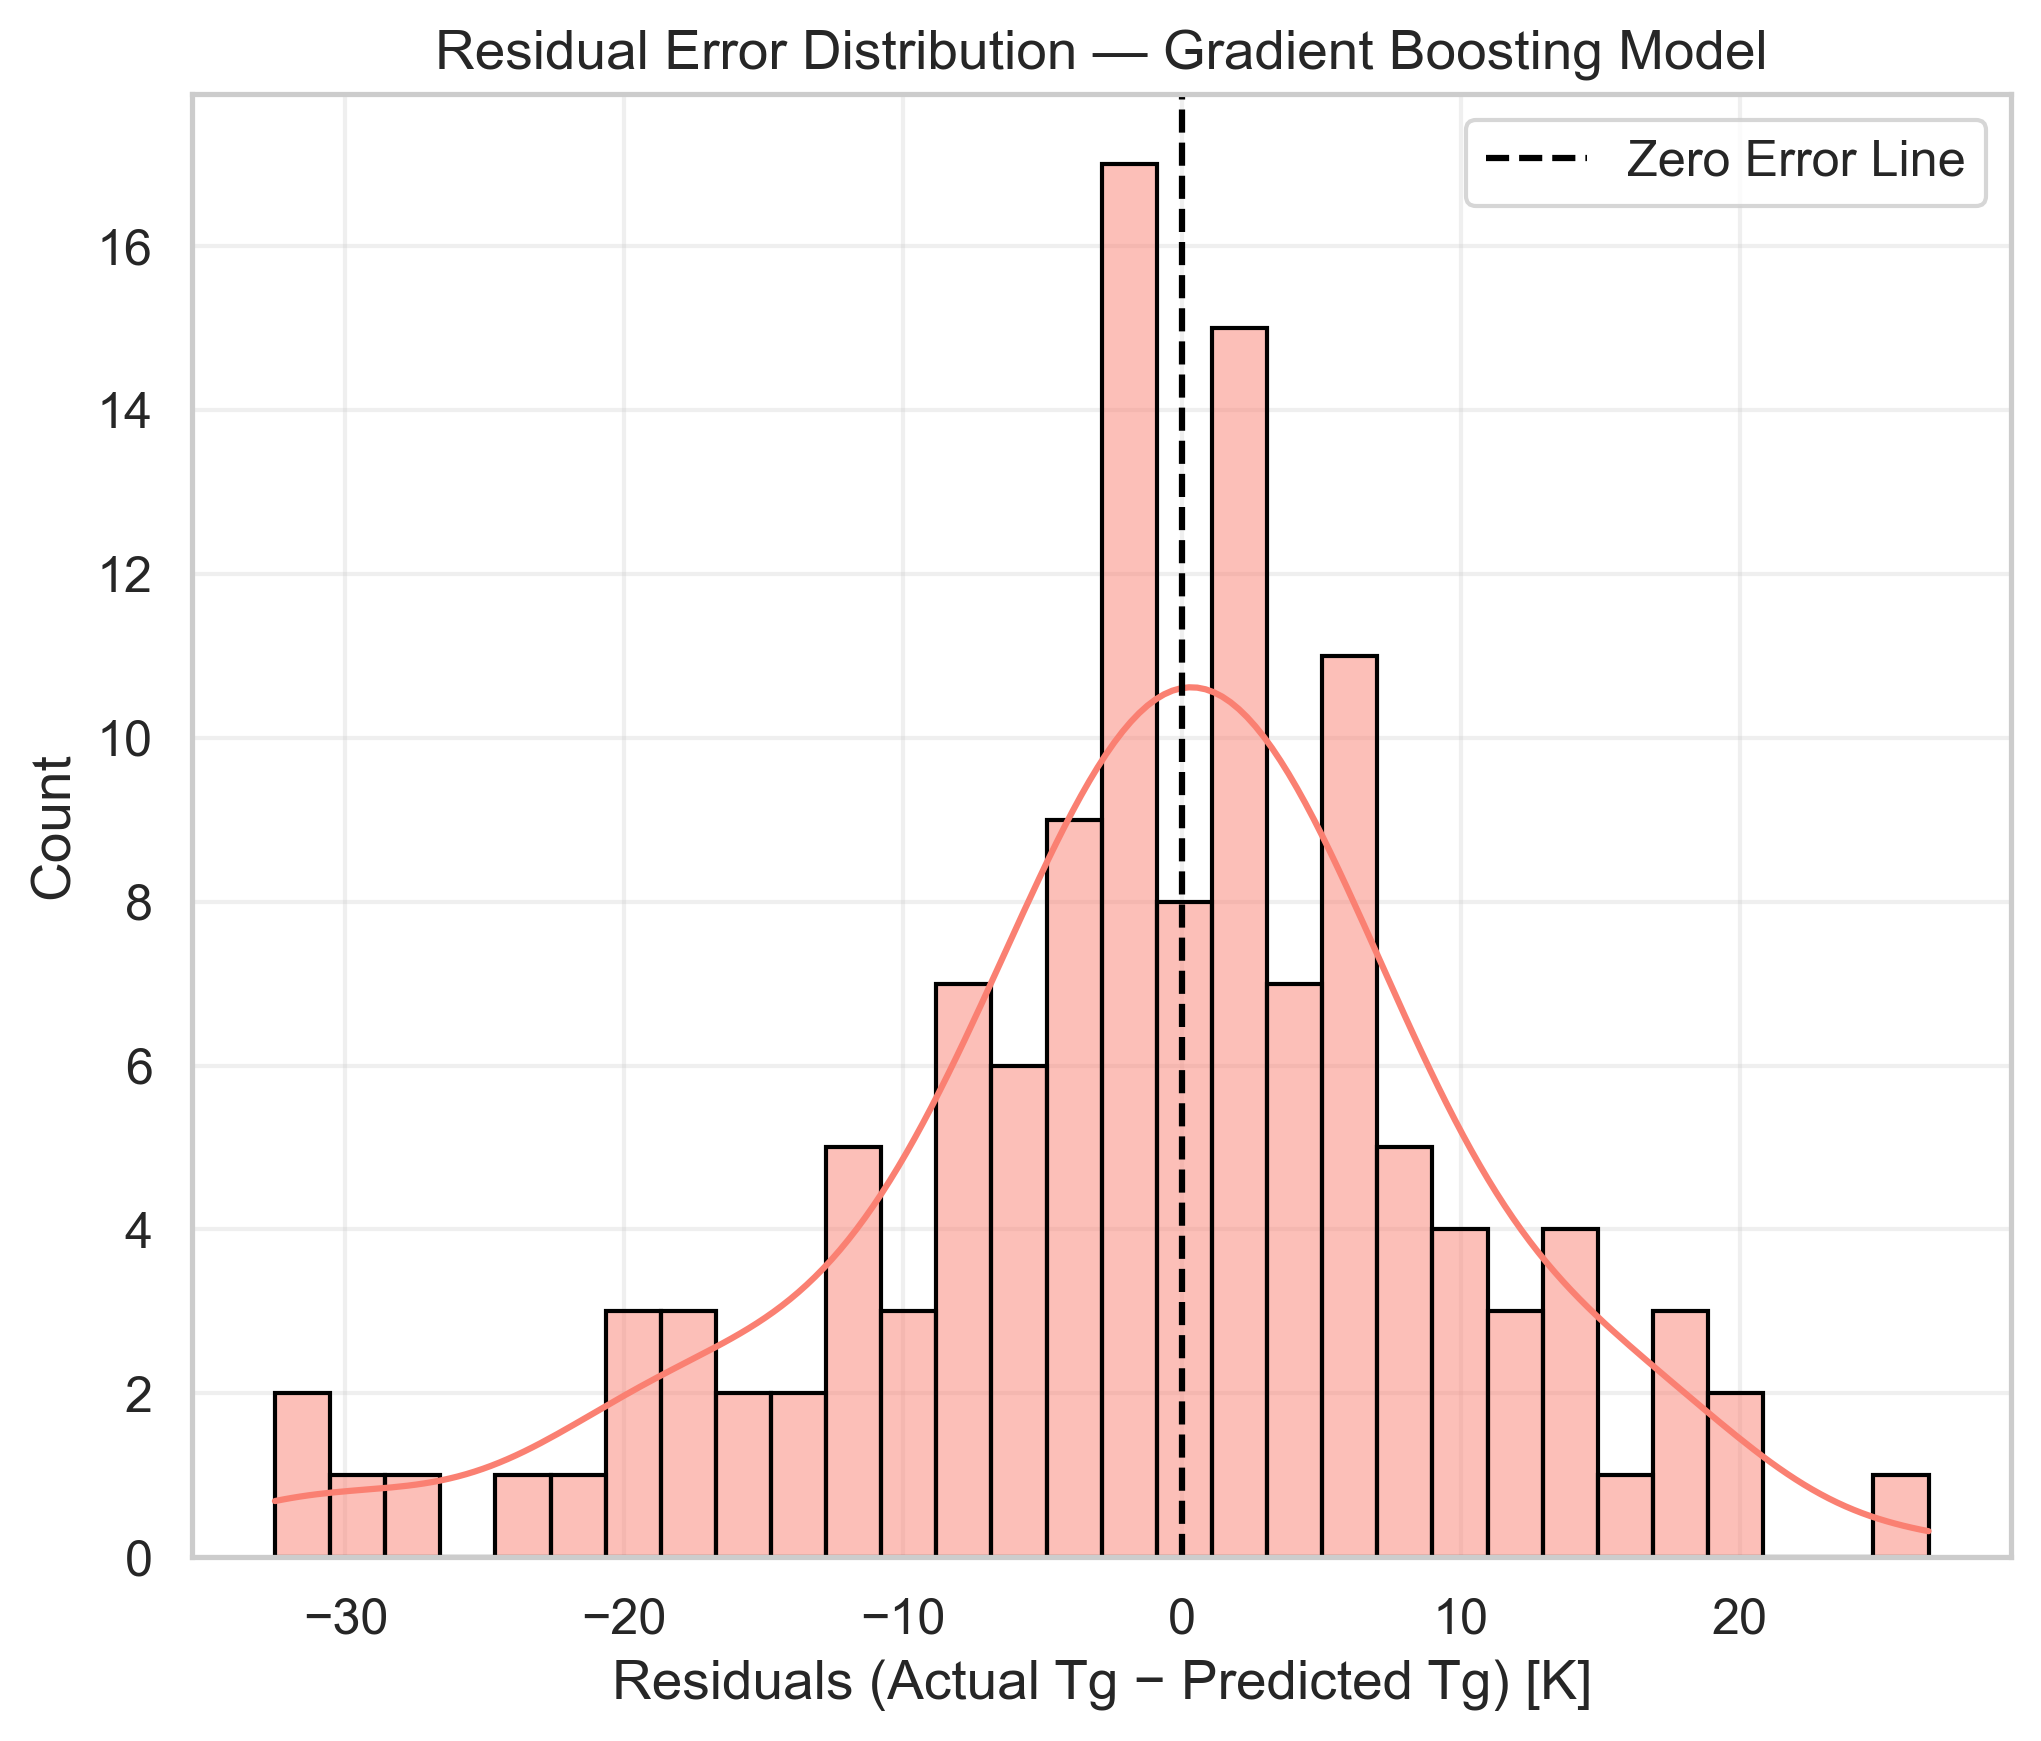

In [89]:
# Residual Error Histogram
residuals_fg = y_test - y_pred

plt.figure(figsize=(7,6))
sns.histplot(residuals_fg, bins=30, kde=True, color='salmon', edgecolor='black')
plt.axvline(0, color='black', linestyle='--', label='Zero Error Line')
plt.xlabel('Residuals (Actual Tg − Predicted Tg) [K]')
plt.ylabel('Count')
plt.title('Residual Error Distribution — Gradient Boosting Model')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Images/Residual_Error_Distribution.png", dpi=300)
plt.show()

Definition:

Residuals = (Actual Tg − Predicted Tg), They tell us how much the model missed by for each sample.

If the model predicted 300 K but the real Tg was 310 K, the residual = +10 K.
A histogram of residuals shows whether errors are small and evenly spread (good!) or large/skewed (bad).

In [90]:
# Error Statistics Table - sample
results_df = pd.DataFrame({
    'Actual Tg (K)': y_test,
    'Predicted Tg (K)': y_pred
})
results_df['Absolute Error (K)'] = abs(results_df['Actual Tg (K)'] - results_df['Predicted Tg (K)'])
results_df['Percentage Deviation (%)'] = (results_df['Absolute Error (K)'] / results_df['Actual Tg (K)']) * 100

# Sort by largest error (optional)
results_df = results_df.sort_values(by='Absolute Error (K)', ascending=False)

print("Top 10 Error Samples:\n")
display(results_df.head(10))

Top 10 Error Samples:



Actual Tg (K)  Predicted Tg (K)  Absolute Error (K)  \
118          319.0        351.529966           32.529966   
213          161.0        193.526593           32.526593   
320          118.0        148.483352           30.483352   
631          283.0        310.629337           27.629337   
598          341.0        314.223801           26.776199   
594          243.0        267.192327           24.192327   
321          126.0        147.694016           21.694016   
412          266.0        286.000930           20.000930   
395          383.0        402.974532           19.974532   
365          359.0        378.955564           19.955564   

     Percentage Deviation (%)  
118                 10.197482  
213                 20.202853  
320                 25.833349  
631                  9.763017  
598                  7.852258  
594                  9.955690  
321                 17.217473  
412                  7.519147  
395                  5.215283  
365                  5.558653

In [91]:
# Average Error Calculation
# Definition:
# The average distance (in K) between predicted and actual Tg values.
# This is measured using:
# MAE (Mean Absolute Error) → average error
# MSE / RMSE → penalize large errors
# R² → overall goodness of fit (closer to 1 = better)
 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Summary — Gradient Boosting")
print(f"Mean Absolute Error (MAE): {mae:.2f} K")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} K")
print(f"R² Score: {r2:.4f}")


Model Evaluation Summary — Gradient Boosting
Mean Absolute Error (MAE): 8.01 K
Mean Squared Error (MSE): 116.94
Root Mean Squared Error (RMSE): 10.81 K
R² Score: 0.9863


On average, predictions are within ±8 K of experimental Tg (after hyperparameter tuning)

In [92]:
import joblib
# save the trained Gradient Boosting model
joblib.dump(best_model, "models/functional_group_model.pkl")

['models/functional_group_model.pkl']

In [93]:
# save the Scaler (for consistent preprocessing later) 
# Since data was scaled before training, the same scaler must be applied when predicting new Tg values.
joblib.dump(scaler, "models/functional_group_scaler.pkl")

['models/functional_group_scaler.pkl']

## SMILES  Mode 

SMILES (Simplified Molecular Input Line Entry System) represents a molecule’s structure as a string.

Example:Glucose → "C(C1C(C(C(C(O1)O)O)O)O)O"

To use these strings in machine learning, we applied n-gram character encoding using scikit-learn’s CountVectorizer, which transforms SMILES into numerical vectors based on short character patterns.
These vectors capture recurring molecular motifs (e.g., “C(”, “O=”, “CC”), allowing regression models like Random Forest and Gradient Boosting to learn structure–property relationships.
This lightweight featurization avoids dependency on external chemistry libraries while still providing meaningful structure-based inputs.

In [94]:
# To use SMILES in ML models, need to convert these strings into numeric feature vectors 
# (a process called featurization).

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# drop missing SMILES or Tg
smiles_df = df.dropna(subset=["SMILES", "Tg"]).reset_index(drop=True)

# feature extraction using CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))  # use 2–3 character grams

X = vectorizer.fit_transform(smiles_df["SMILES"])
y = smiles_df["Tg"] # target variable

In [96]:
'''
This converts SMILES strings into a sparse matrix of counts of 2–3 letter sequences like:
C(, (C, CO, OC, O), etc.
These act as structural patterns

'''

'\nThis converts SMILES strings into a sparse matrix of counts of 2–3 letter sequences like:\nC(, (C, CO, OC, O), etc.\nThese act as structural patterns\n\n'

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

results_df = pd.DataFrame(results).T
print(results_df)

                         MSE        R2
RandomForest      562.330016  0.934278
ExtraTrees        459.248284  0.946325
GradientBoosting  532.332056  0.937784


In [99]:
# Average error (how far predictions are on average)
y_pred_best = models['ExtraTrees'].fit(X_train, y_train).predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = np.mean(np.abs(y_test - y_pred_best))

print(f"ExtraTrees Model — SMILES Mode")
print(f"Average error (RMSE): {rmse:.2f} K")
print(f"Average absolute deviation (MAE): {mae:.2f} K")


ExtraTrees Model — SMILES Mode
Average error (RMSE): 21.43 K
Average absolute deviation (MAE): 12.11 K


# Interpretation:
ExtraTrees — SMILES Mode Performance:
ExtraTrees has the lowest MSE and highest R², so it’s the best among the three.

- The model explains ~94.6% of the Tg variance (R² = 0.9463).
- On average, predictions deviate by 21 K (RMSE) from experimental values.
- The mean absolute deviation (MAE) is ~12 K, meaning most predictions are within ~12 K of the true Tg.
- This performance is reasonable given the simplicity of SMILES-only descriptors.

In [100]:
# Final Model Training
smiles_df = df.dropna(subset=["SMILES", "Tg"]).reset_index(drop=True)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))  # 2–3 char ngrams
X = vectorizer.fit_transform(smiles_df["SMILES"])  # Sparse matrix of n-grams
y = smiles_df["Tg"]
# Save the fitted vectorizer
joblib.dump(vectorizer, "models/smiles_vectorizer.pkl")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ExtraTrees model
smiles_model = ExtraTreesRegressor(n_estimators=200, random_state=42)
smiles_model.fit(X_train, y_train)

# Evaluate
y_pred = smiles_model.predict(X_test)

# Save the trained model
joblib.dump(smiles_model, "models/ExtraTrees_SMILES_Model.pkl")


['models/ExtraTrees_SMILES_Model.pkl']

In [101]:
# SMILES Mode Summary
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("ExtraTrees Model — SMILES Mode Performance")
print(f"Mean Absolute Error (MAE): {mae:.2f} K")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} K")
print(f"R² Score: {r2:.4f}")

ExtraTrees Model — SMILES Mode Performance
Mean Absolute Error (MAE): 12.11 K
Mean Squared Error (MSE): 459.25
Root Mean Squared Error (RMSE): 21.43 K
R² Score: 0.9463


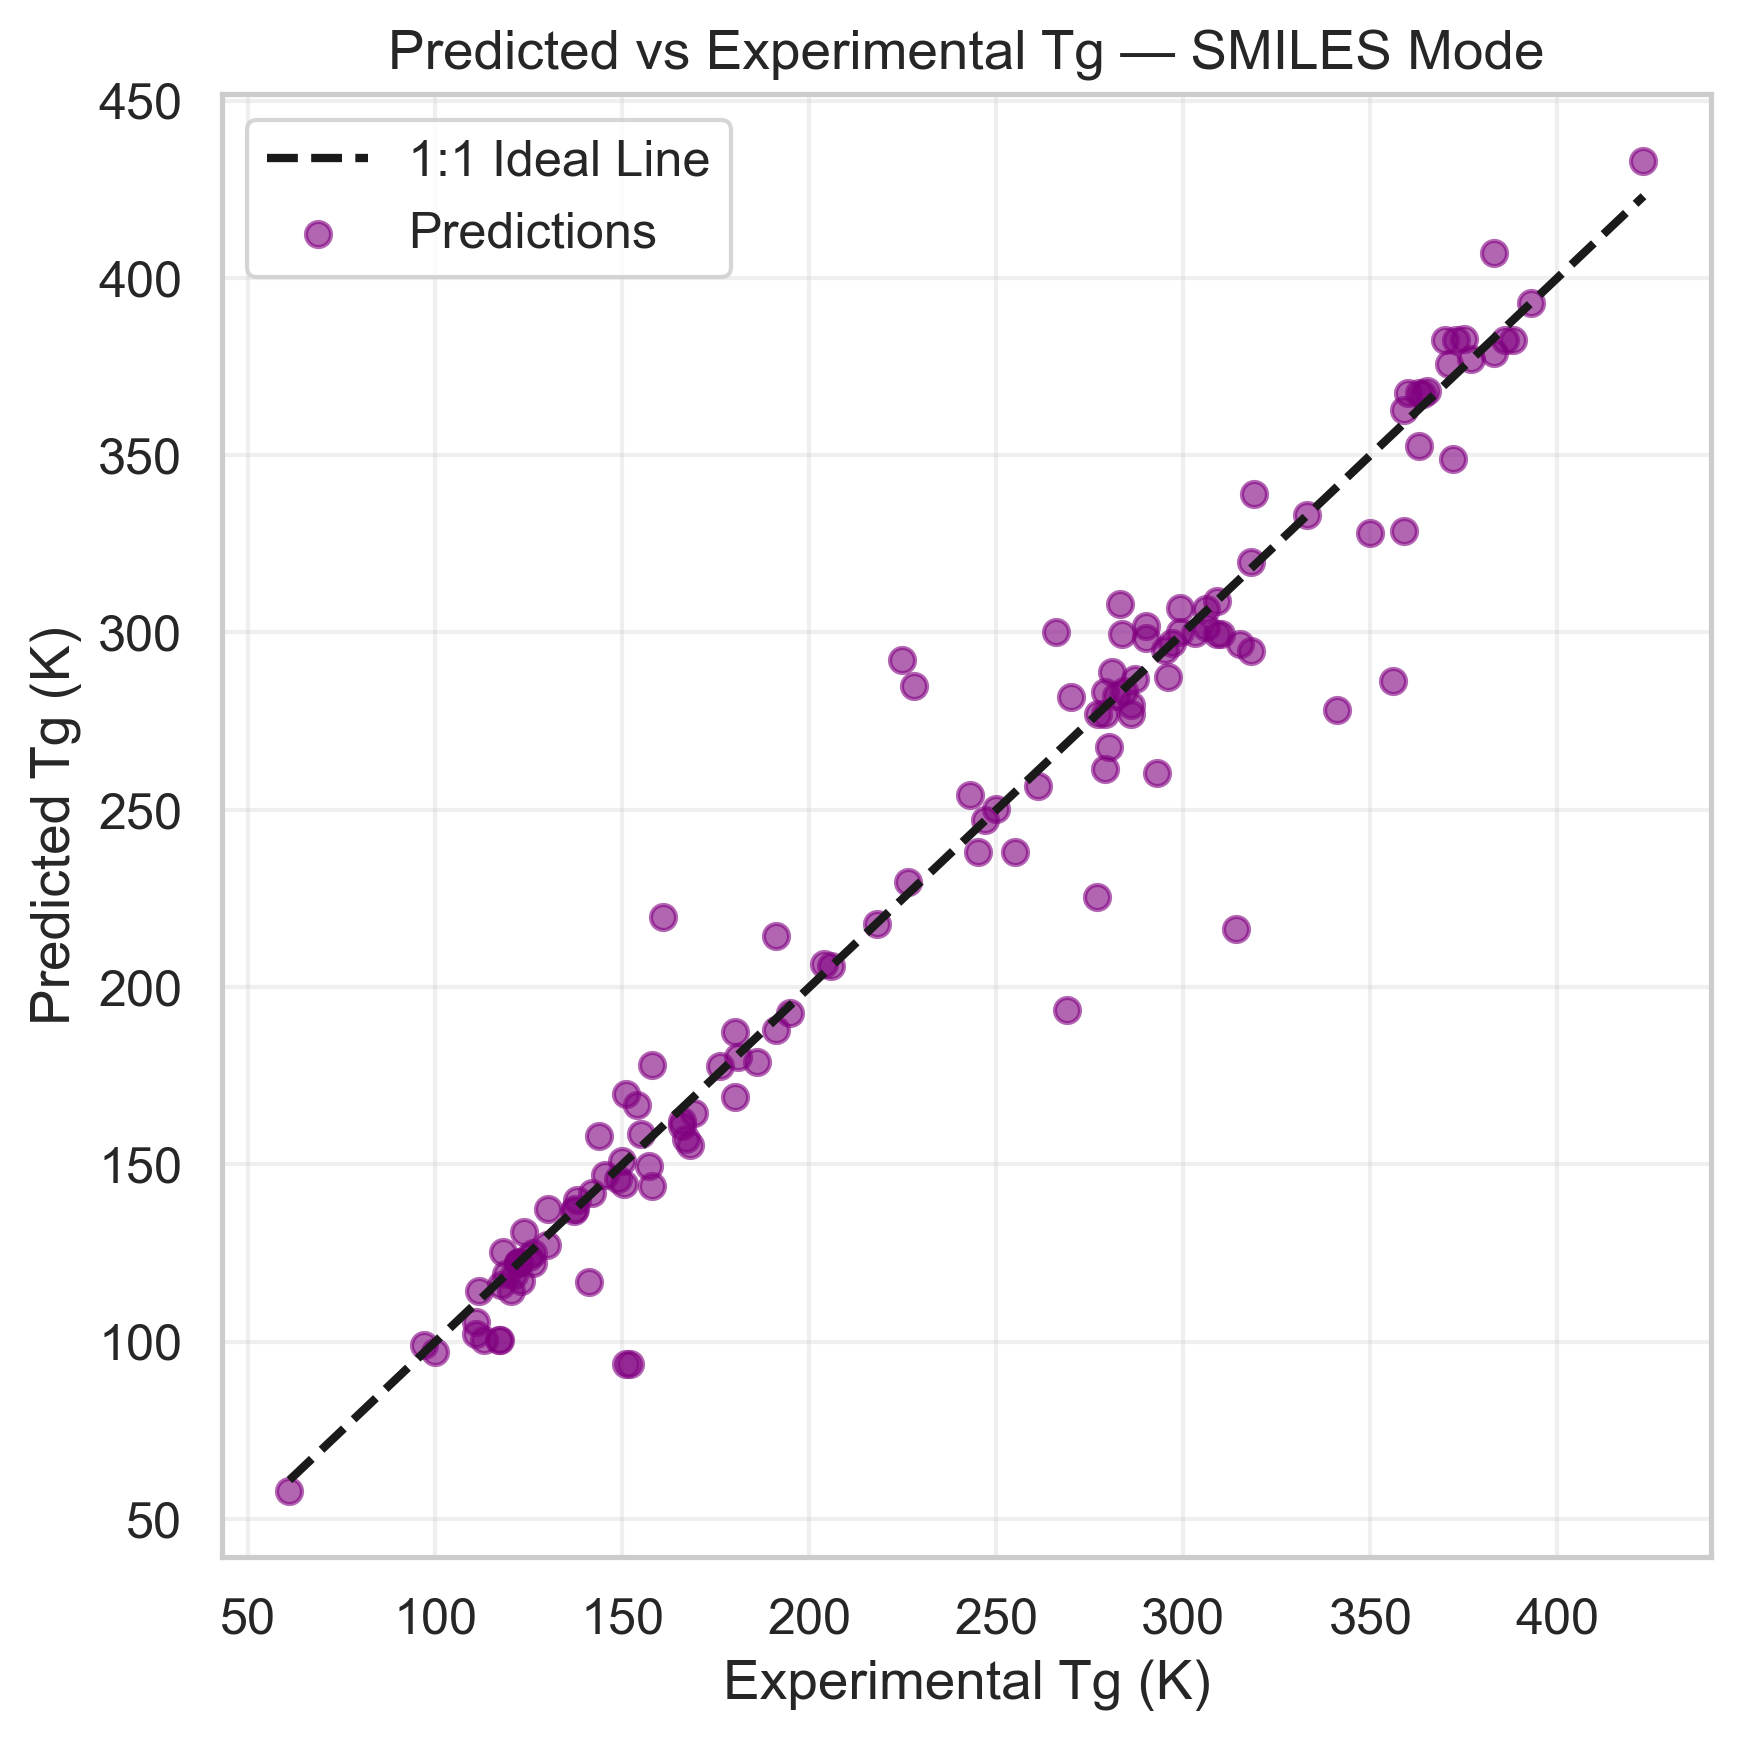

In [102]:
#  Predicted vs Experimental Tg Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='1:1 Ideal Line')
plt.xlabel("Experimental Tg (K)")
plt.ylabel("Predicted Tg (K)")
plt.title("Predicted vs Experimental Tg — SMILES Mode")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


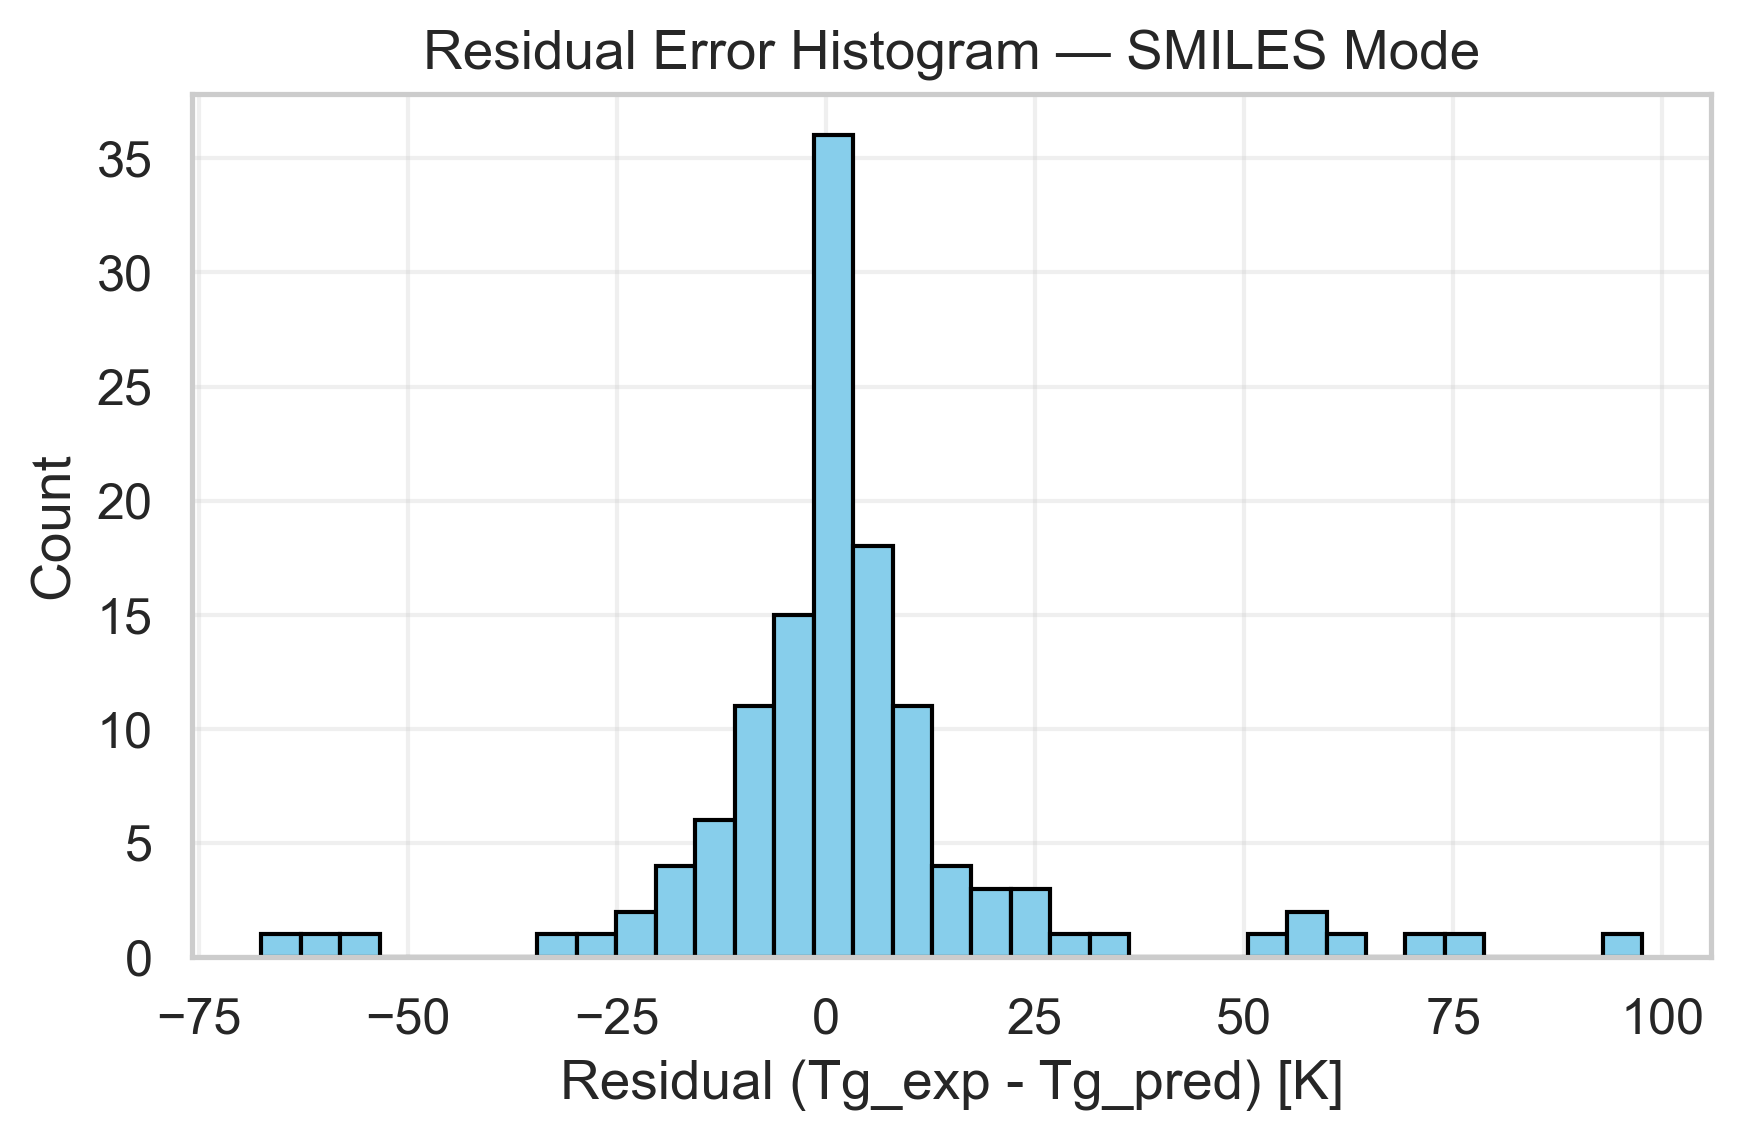

In [103]:
#  Residual Error Histogram
residuals_smiles = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals_smiles, bins=35, color='skyblue', edgecolor='black')
plt.xlabel("Residual (Tg_exp - Tg_pred) [K]")
plt.ylabel("Count")
plt.title("Residual Error Histogram — SMILES Mode")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [104]:
# Error Table
error_df = pd.DataFrame({
    "Experimental Tg (K)": y_test,
    "Predicted Tg (K)": y_pred,
    "Absolute Error (K)": np.abs(residuals),
    "Percentage Deviation (%)": np.abs(residuals)/y_test*100
})
display(error_df.head(10))  # show first 10 for clarity

Experimental Tg (K)  Predicted Tg (K)  Absolute Error (K)  \
523                191.0        214.375967            1.426979   
250                122.0        122.145000            1.185880   
428                388.0        382.333333            7.552760   
228                157.1        149.509250           17.126635   
208                111.0        102.150500            0.419516   
421                373.0        382.333333            7.447240   
593                261.0        256.688325            6.241731   
249                122.0        122.145000            1.185880   
55                 180.8        180.166667            5.281710   
215                137.4        137.400000            0.982453   

     Percentage Deviation (%)  
523                  0.747109  
250                  0.972033  
428                  1.946588  
228                 10.901741  
208                  0.377942  
421                  1.996579  
593                  2.391468  
249                  0.972033  
55                   2.921300  
215                  0.715031

# Conclusion

| Model             | MAE (K) | RMSE (K) | MSE    | R²     |
| ----------------- | ------- | -------- | ------ | ------ |
| Gradient Boosting | 8.01    | 10.81    | 116.94 | 0.9863 |
| Extra Trees       | 8.02    | 11.90    | 141.68 | 0.9834 |




---
Short description of what these metrics mean:

- MAE: Average absolute difference between predicted and experimental Tg (how far off predictions are).

- RMSE: Root of squared differences, penalizes large deviations more.

- R²: Fraction of variance in Tg explained by the model.


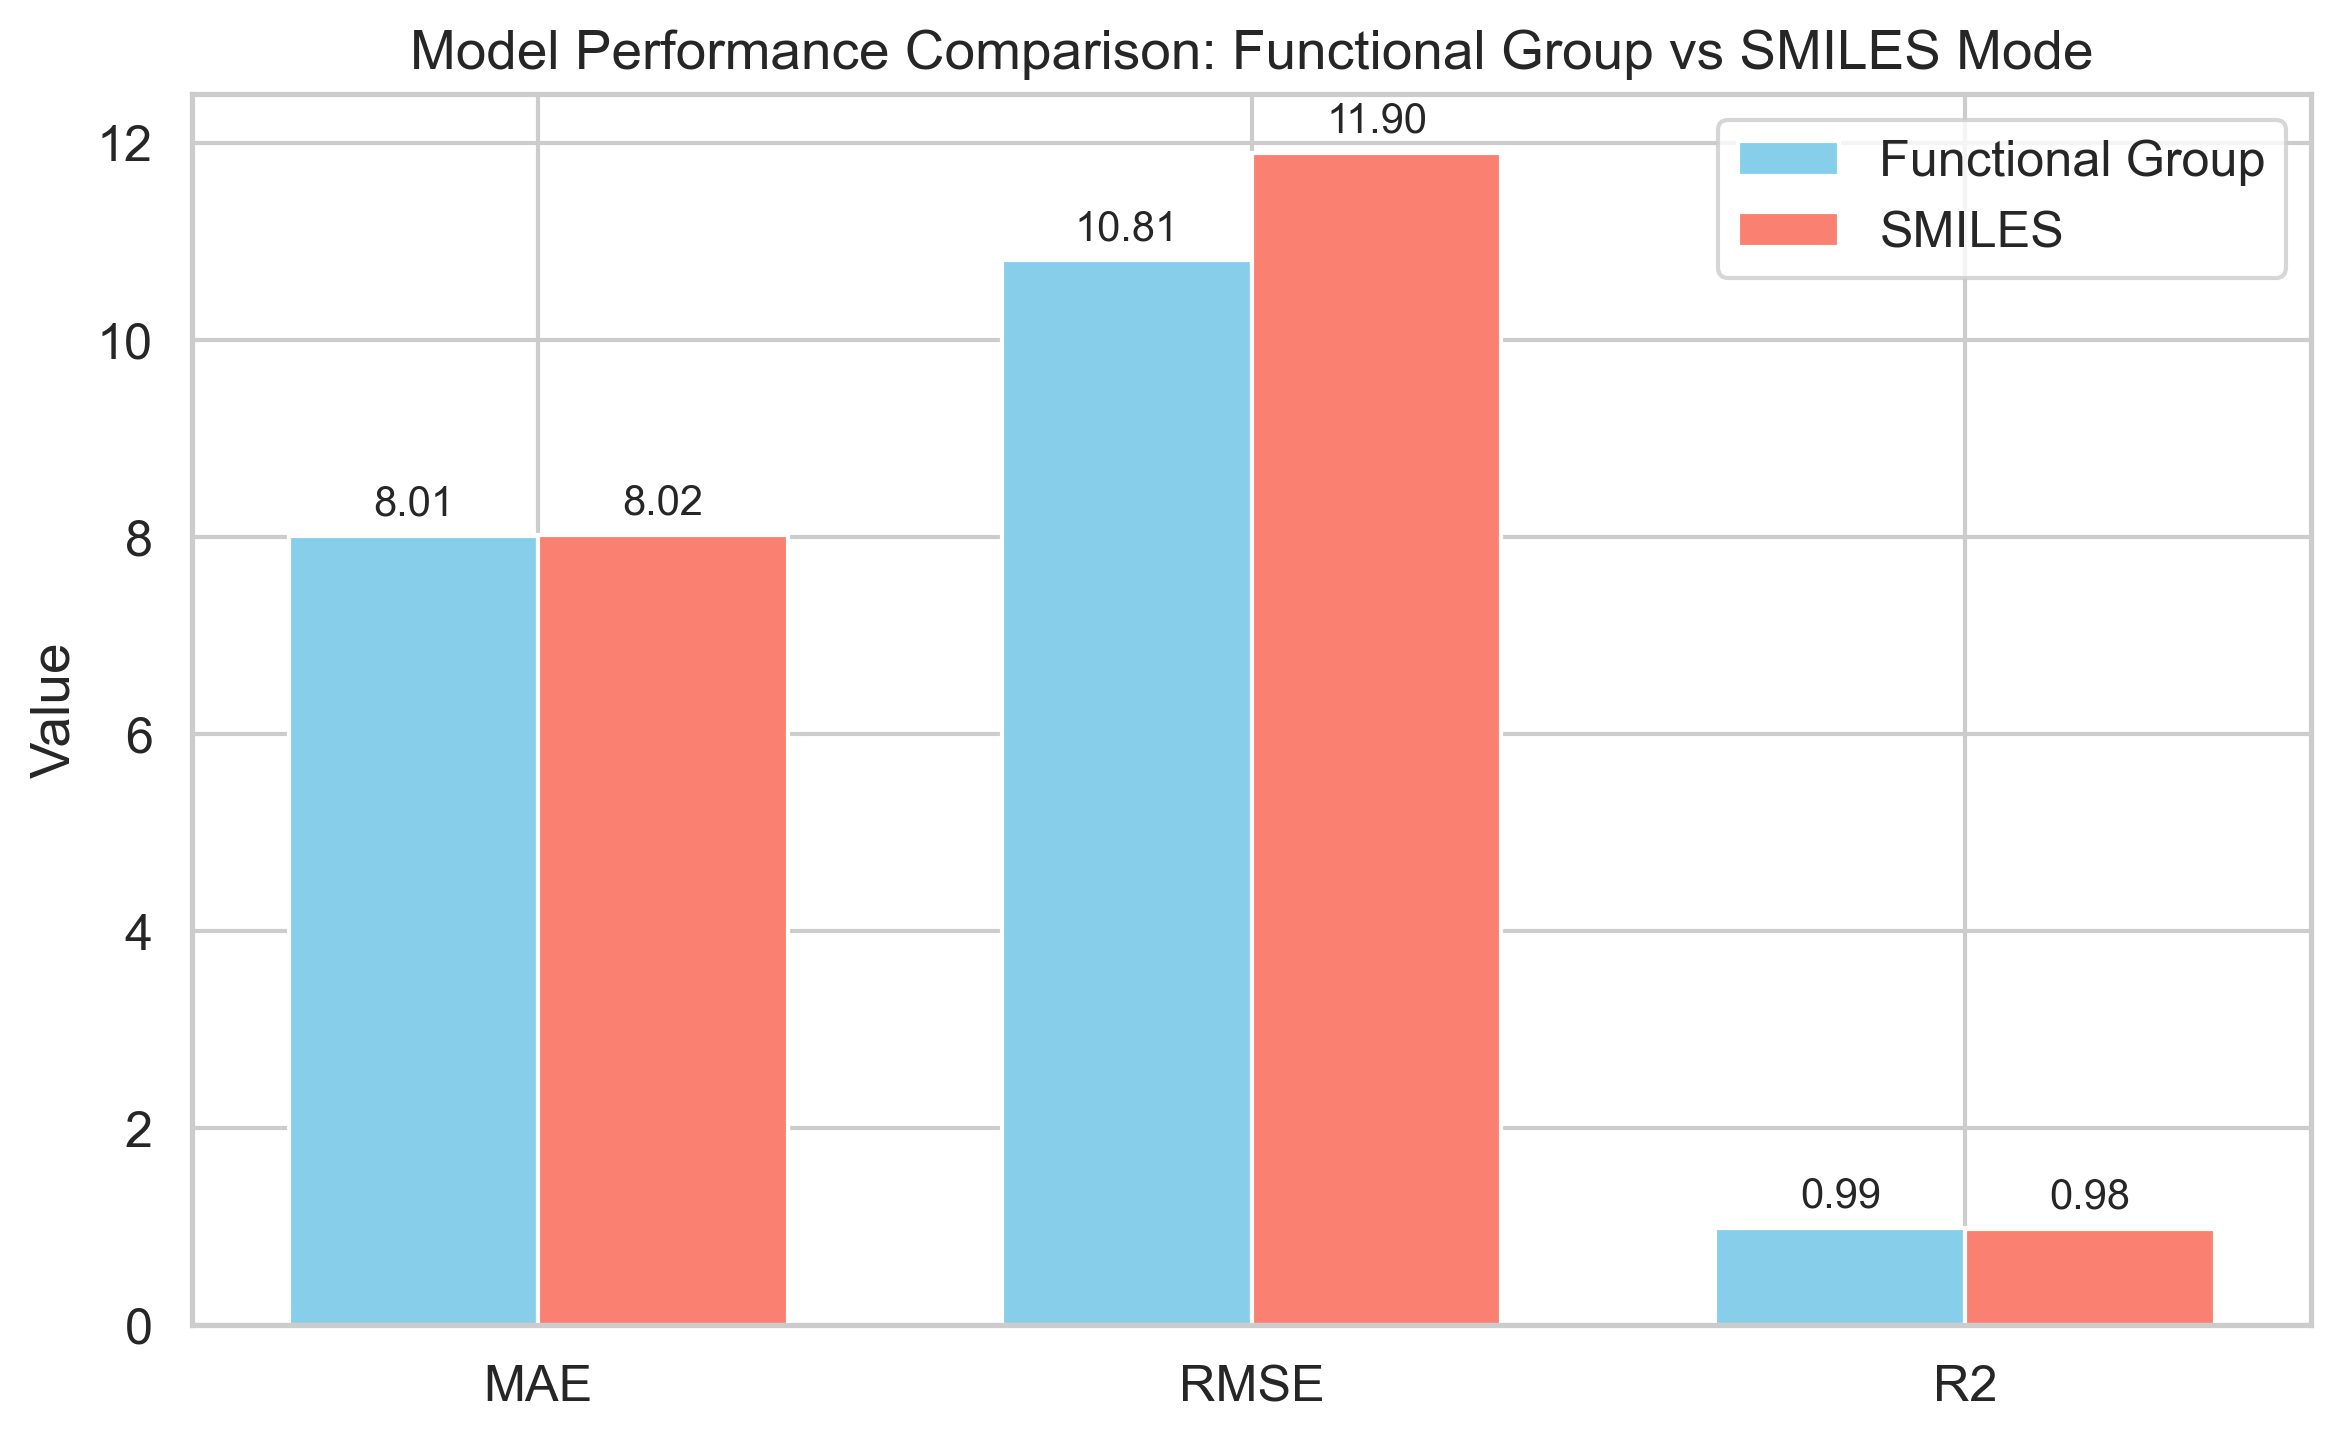

In [105]:
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R2"],
    "Functional_Group_Mode": [8.01, 10.81, 0.9863],  # Gradient Boosting
    "SMILES_Mode": [8.02, 11.90, 0.9834]             # Extra Trees
})

x = np.arange(len(metrics_df))  # metric positions
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(8,5))

bars1 = ax.bar(x - width/2, metrics_df["Functional_Group_Mode"], width, label='Functional Group', color='skyblue')
bars2 = ax.bar(x + width/2, metrics_df["SMILES_Mode"], width, label='SMILES', color='salmon')

# Add metric values on top
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Value')
ax.set_title('Model Performance Comparison: Functional Group vs SMILES Mode')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df["Metric"])
ax.legend()
plt.tight_layout()
plt.show()

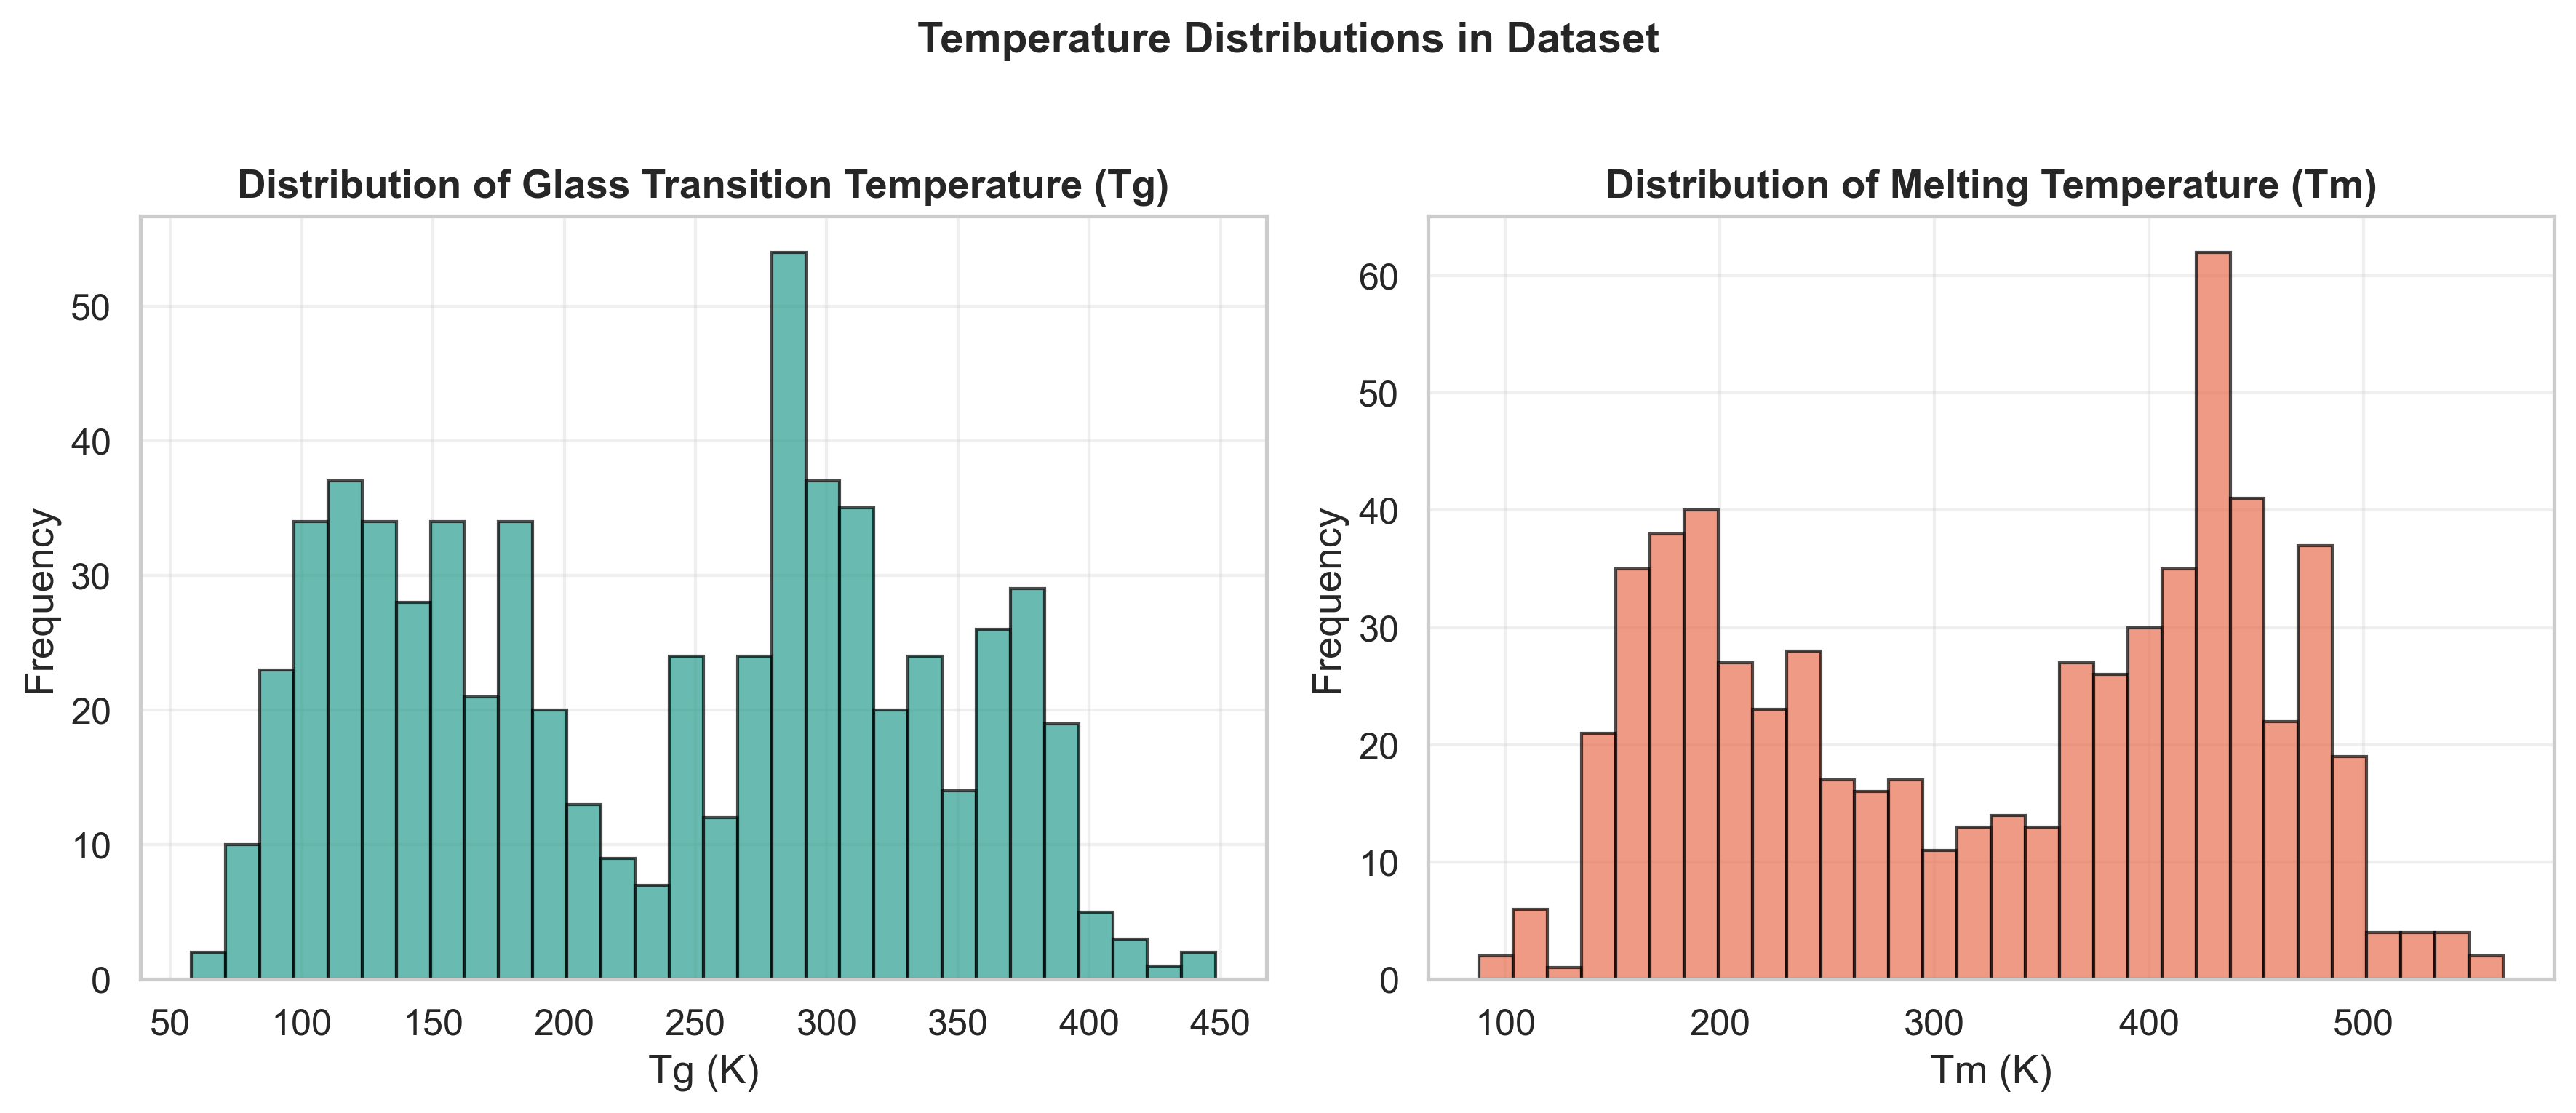

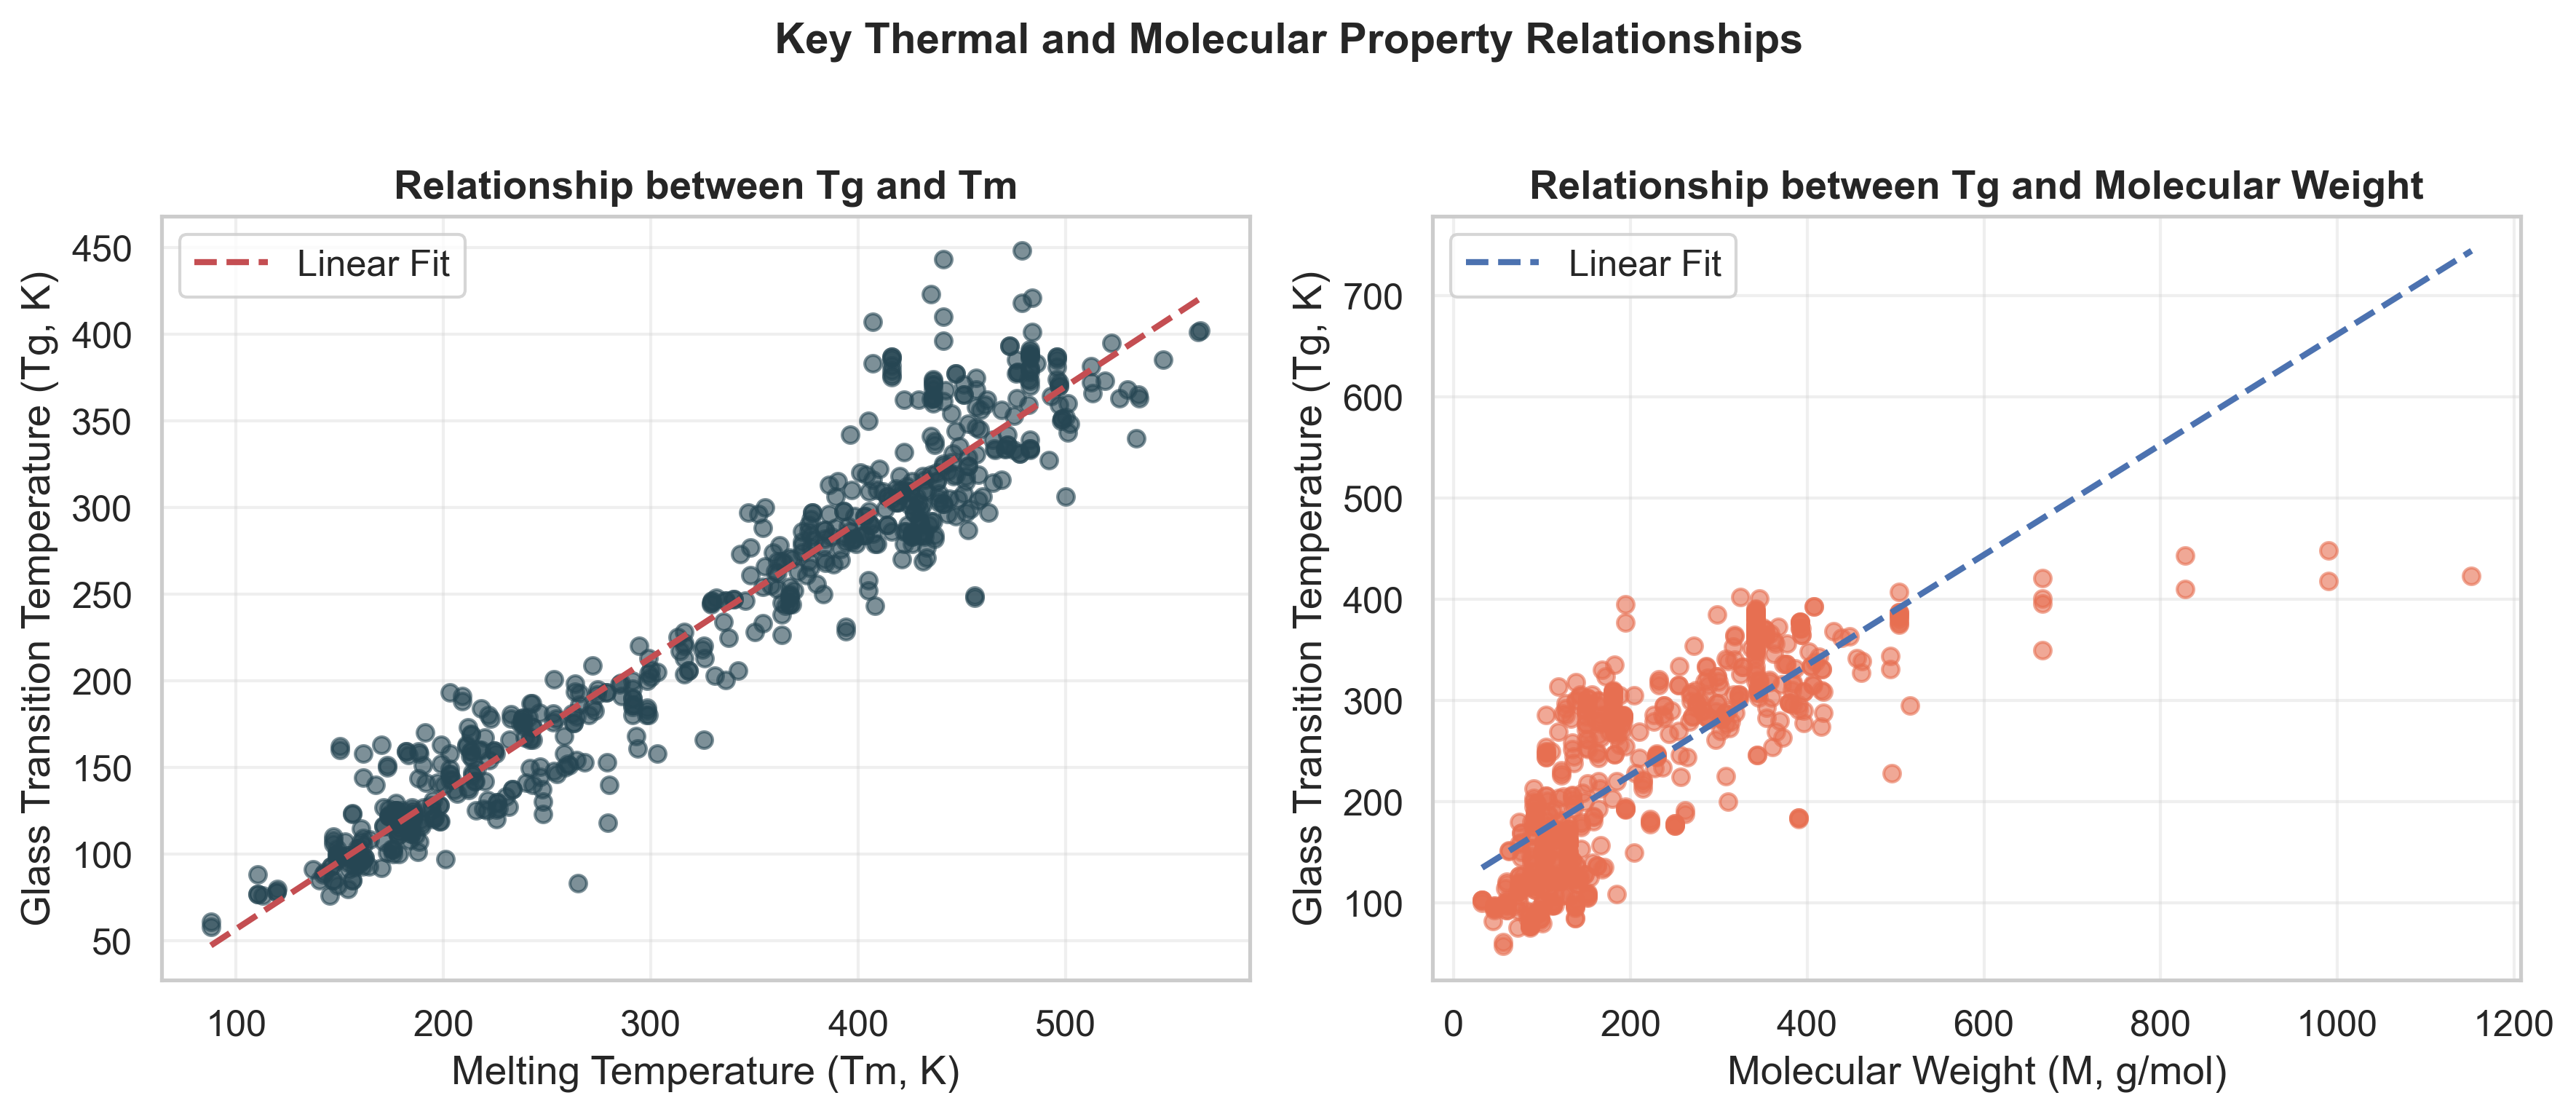

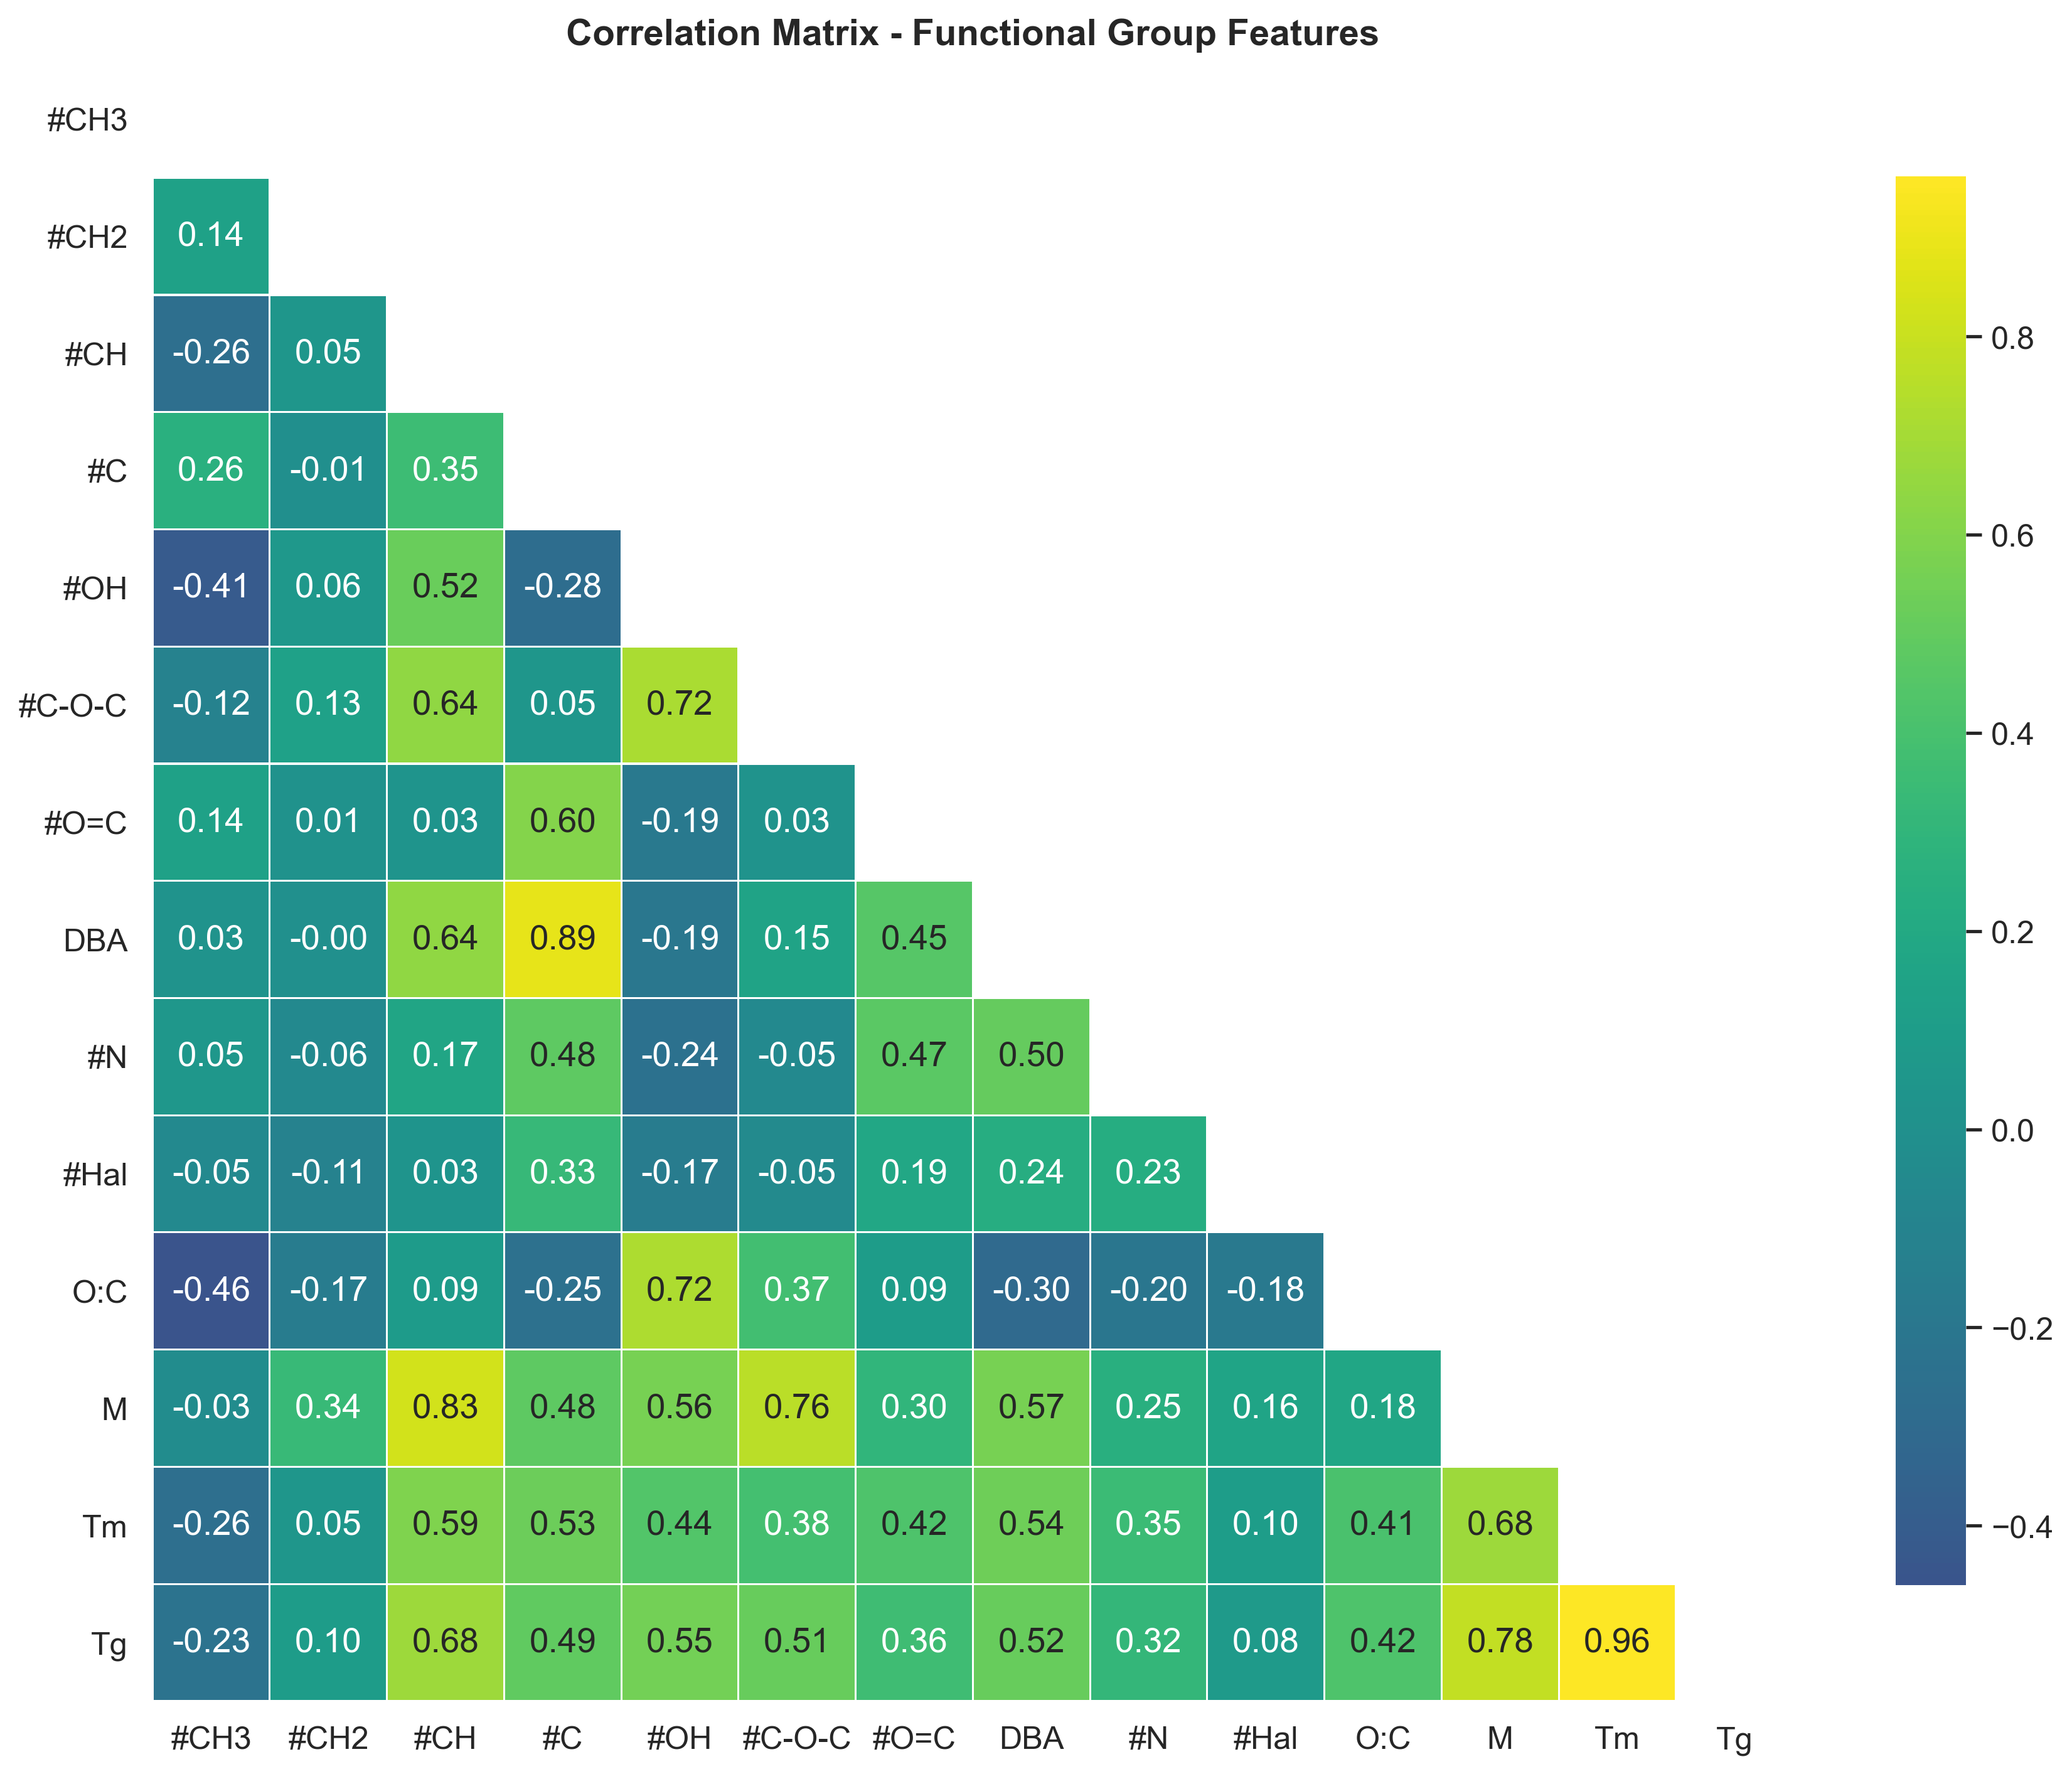

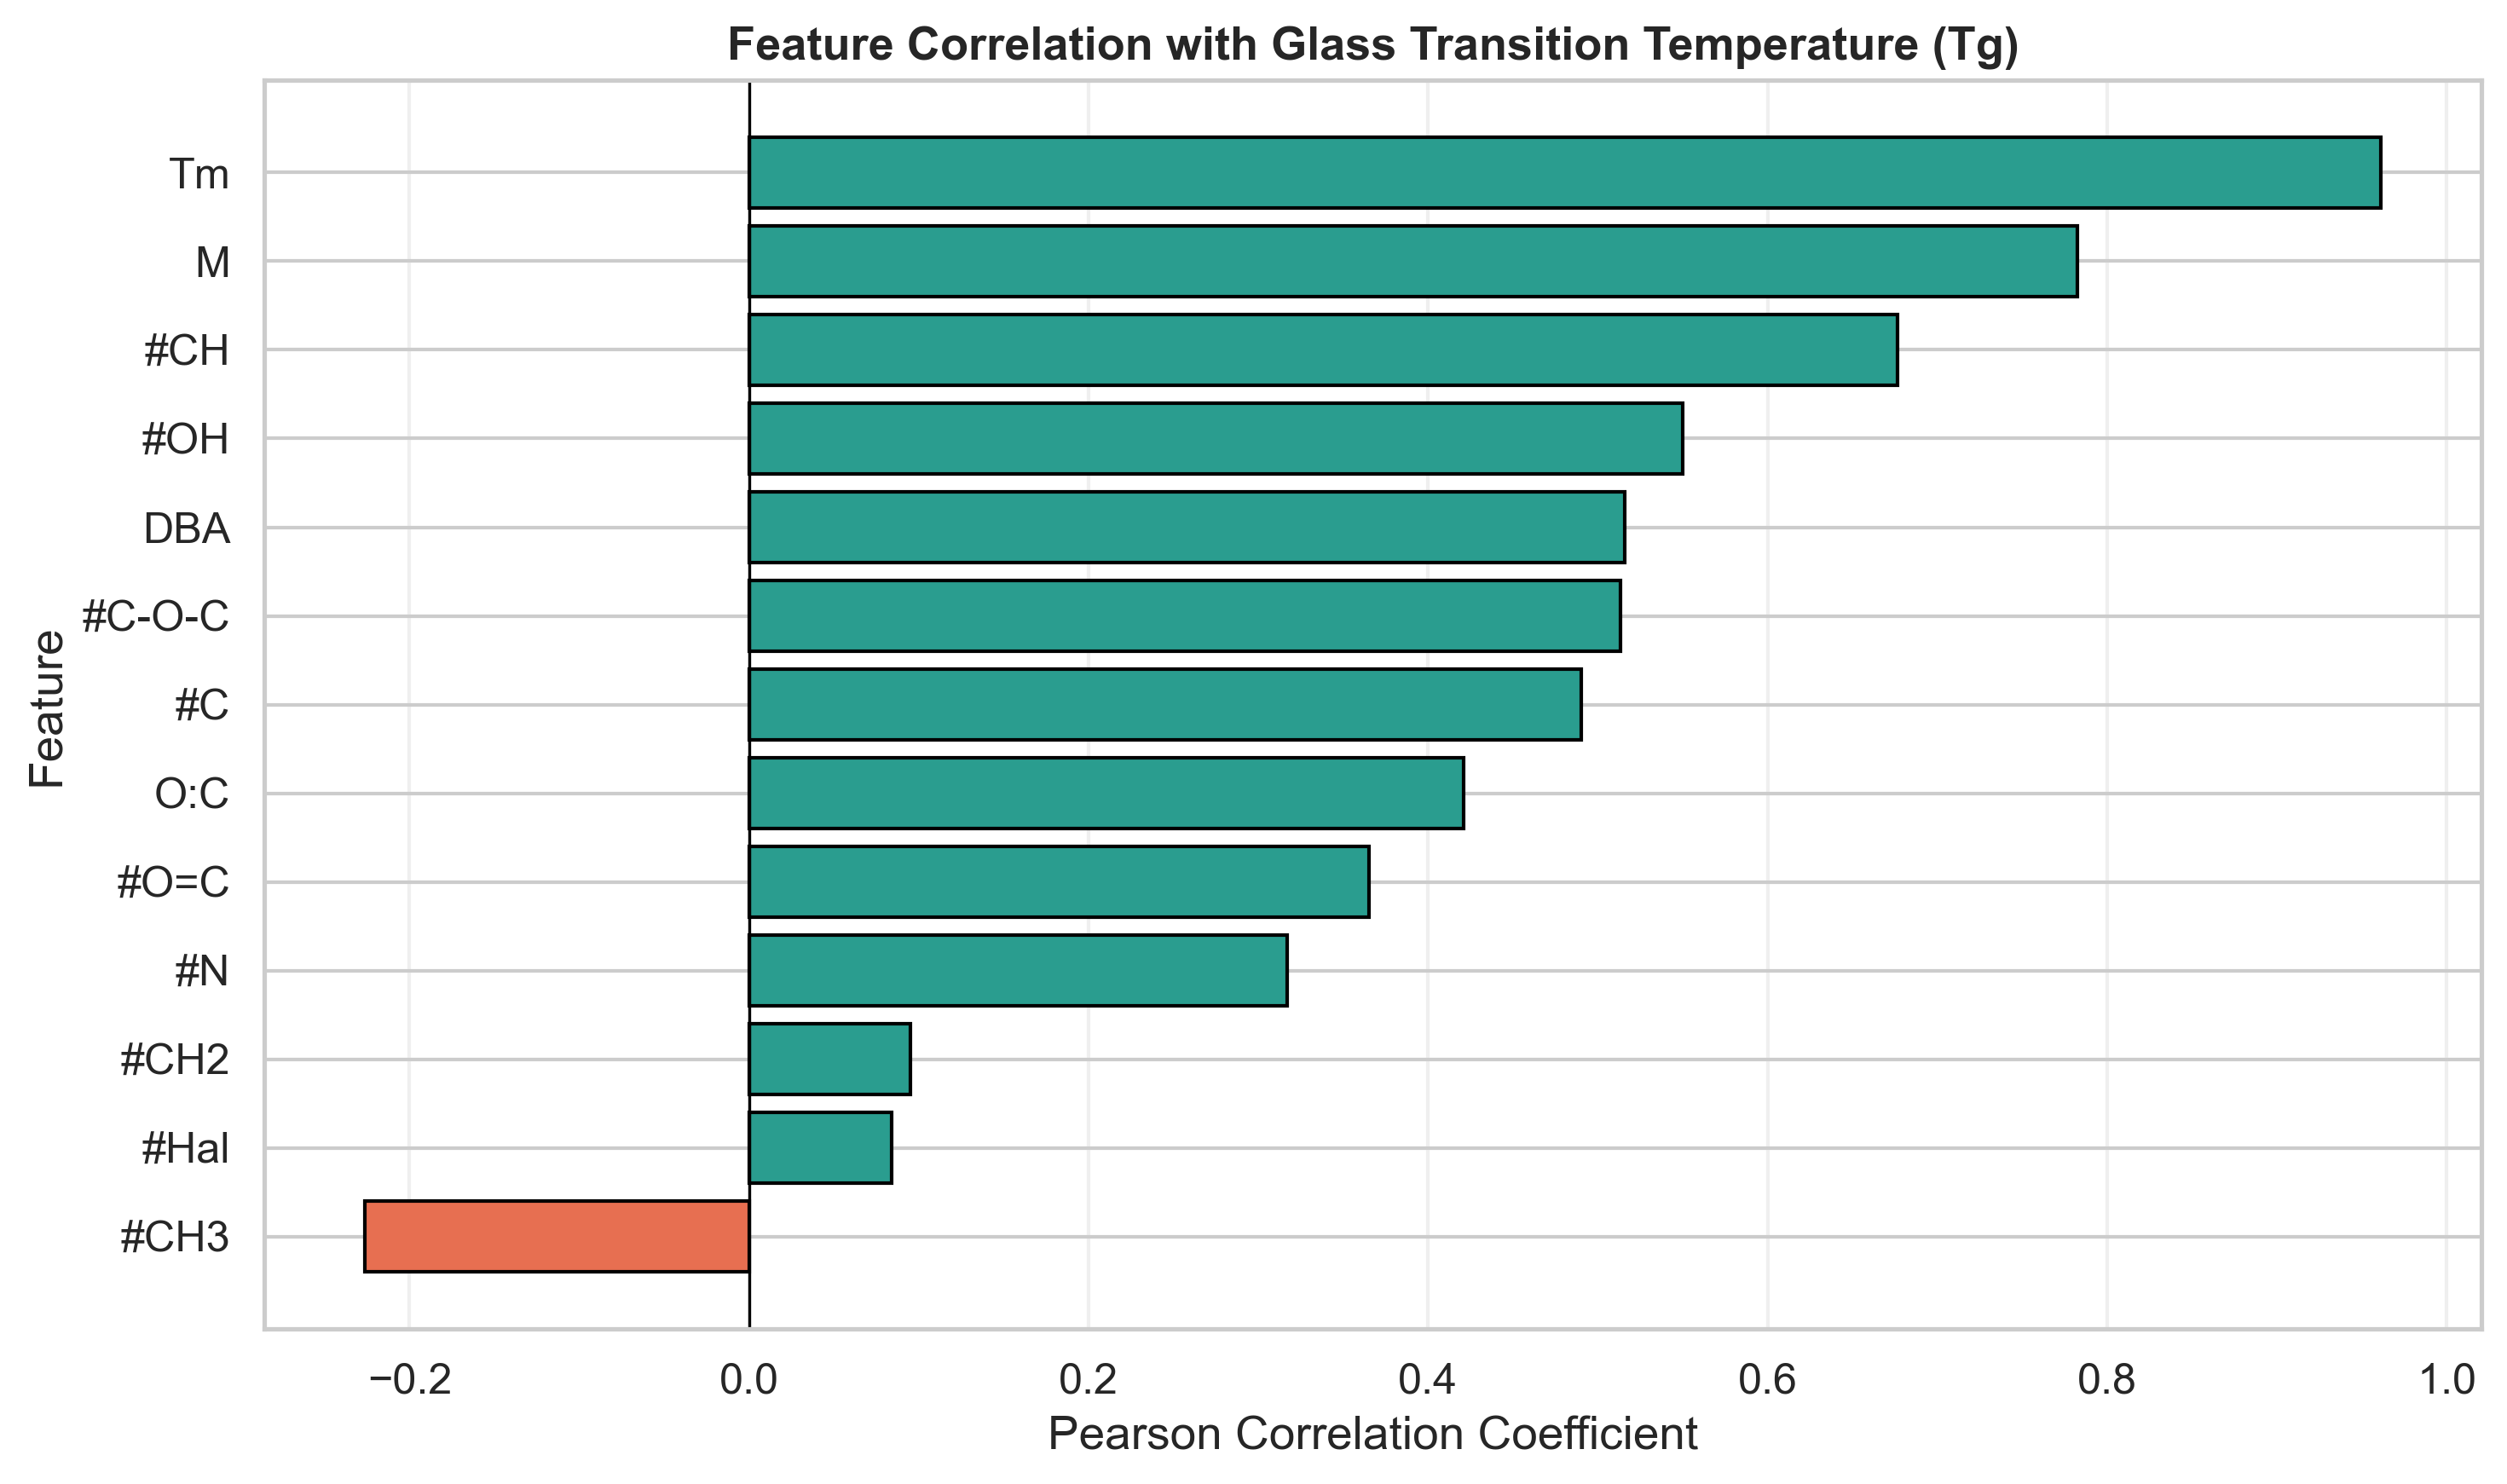

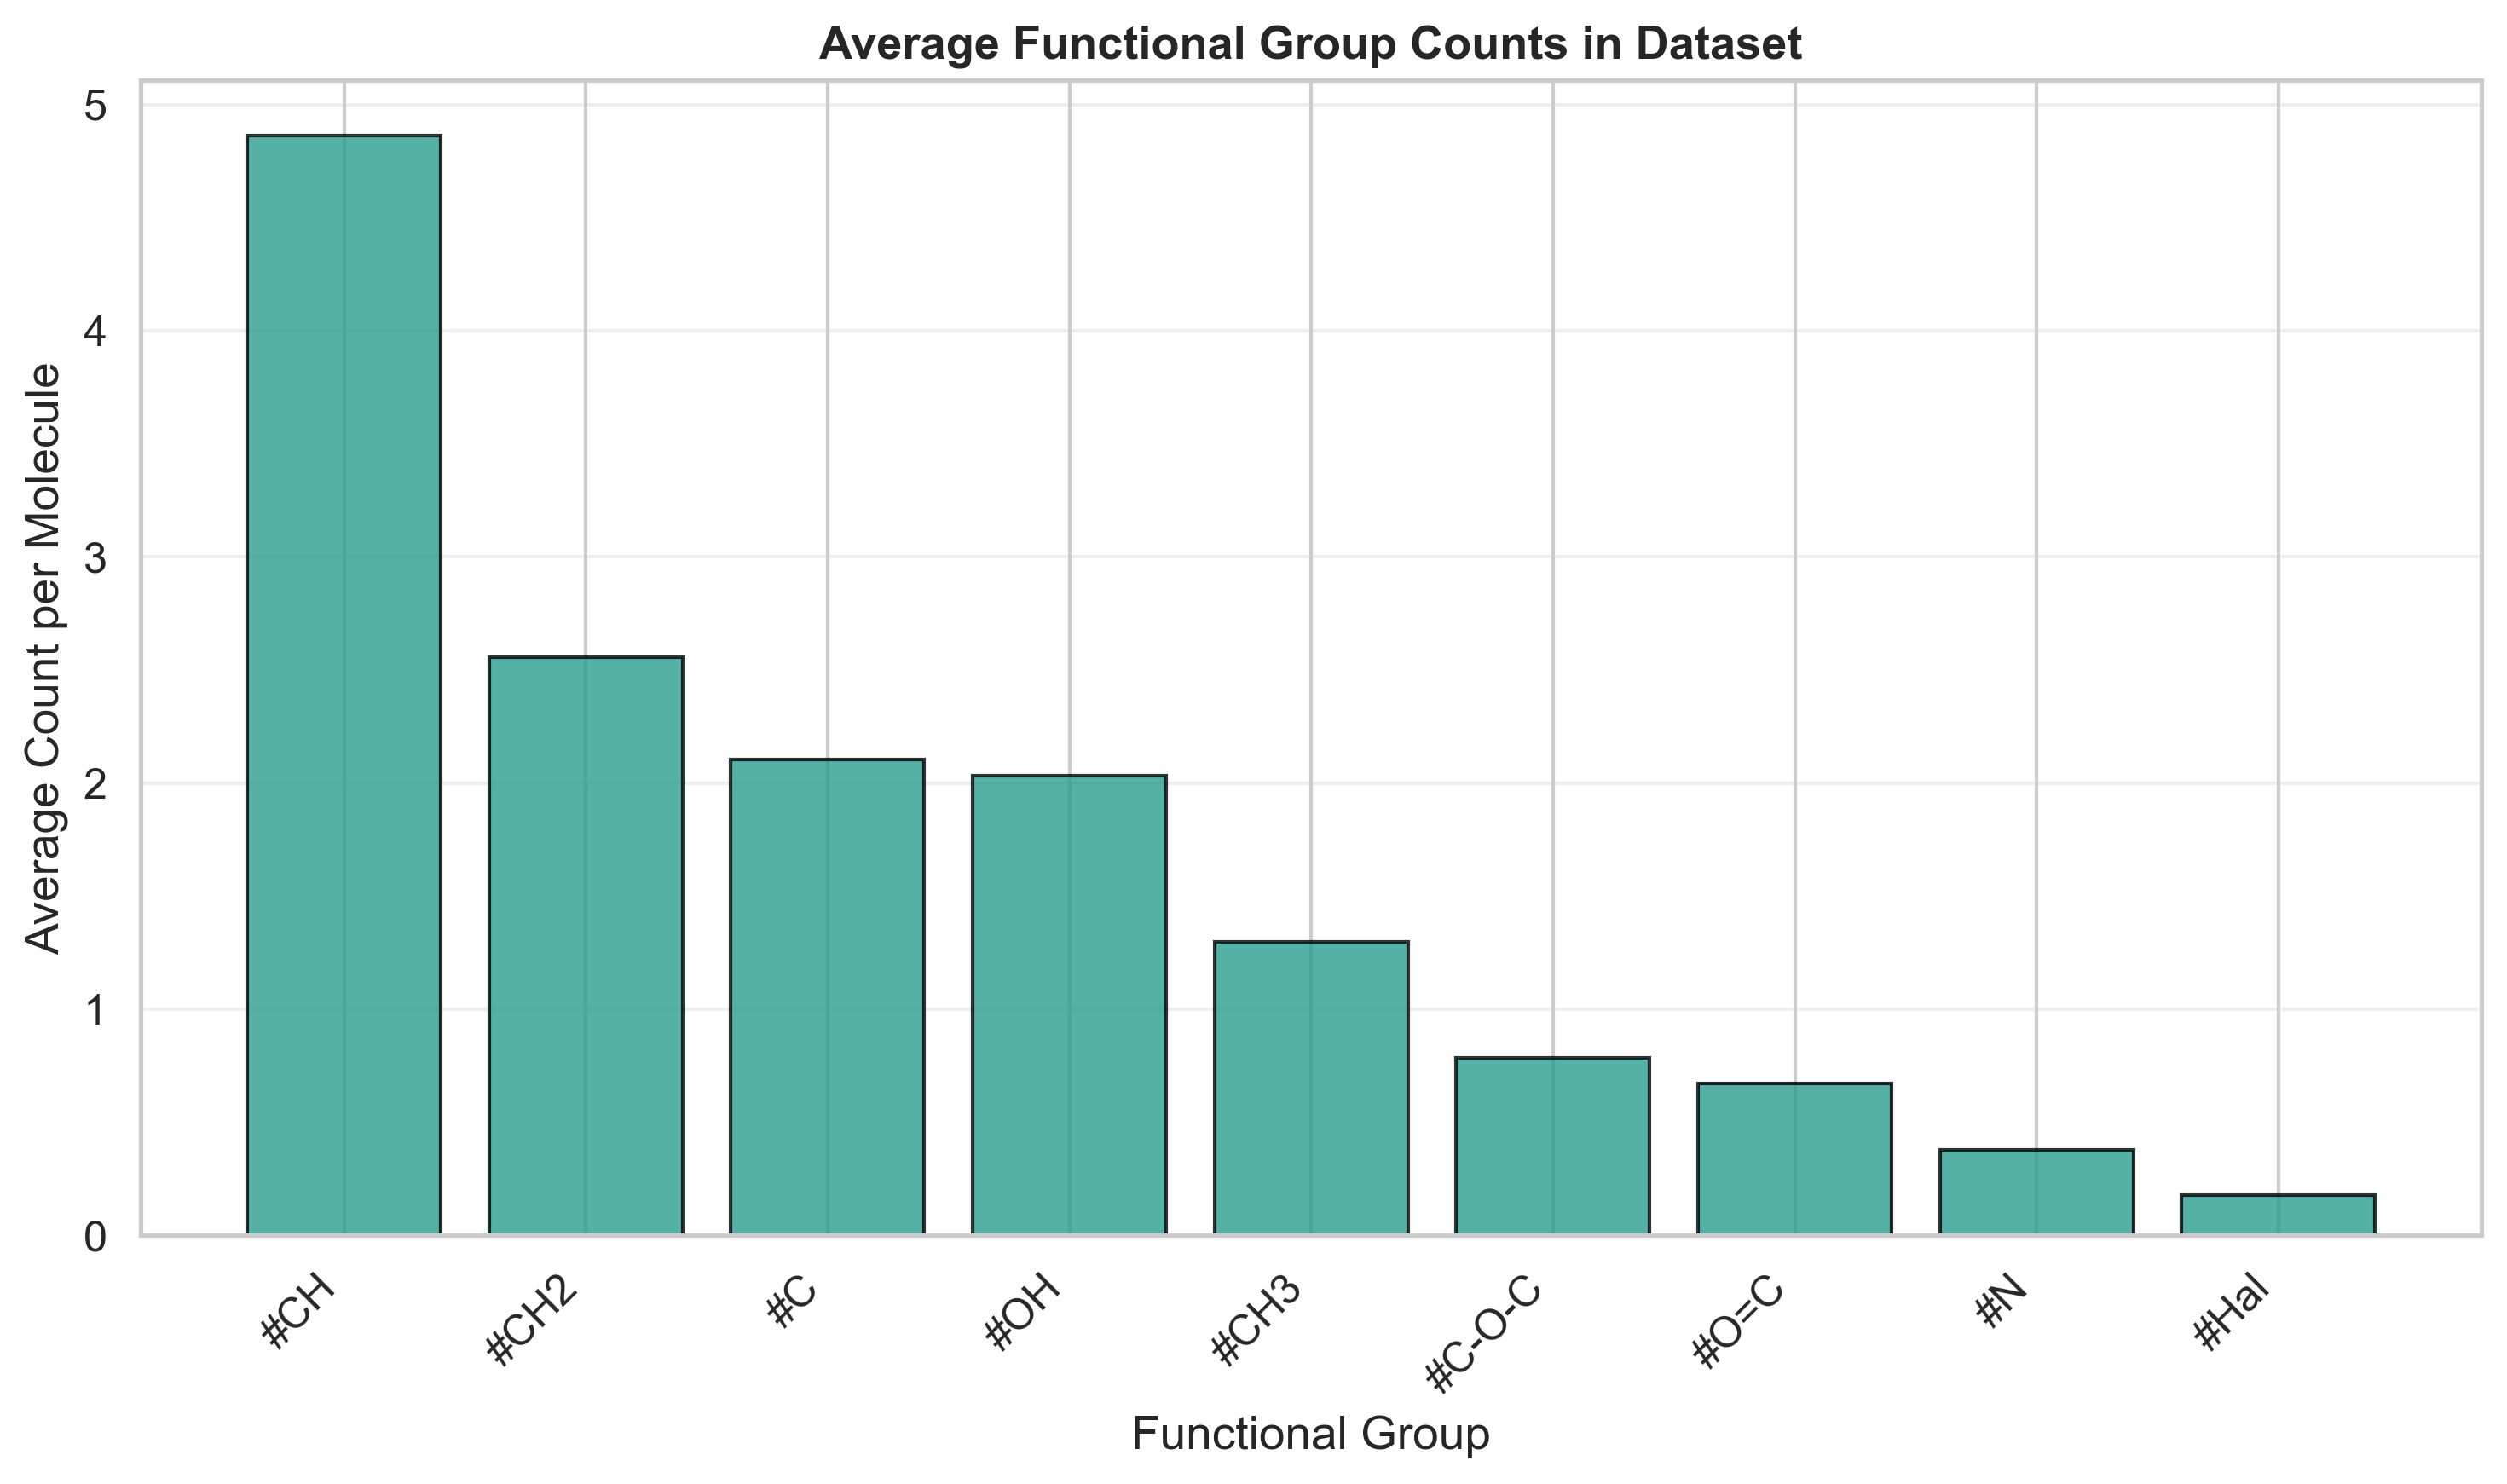

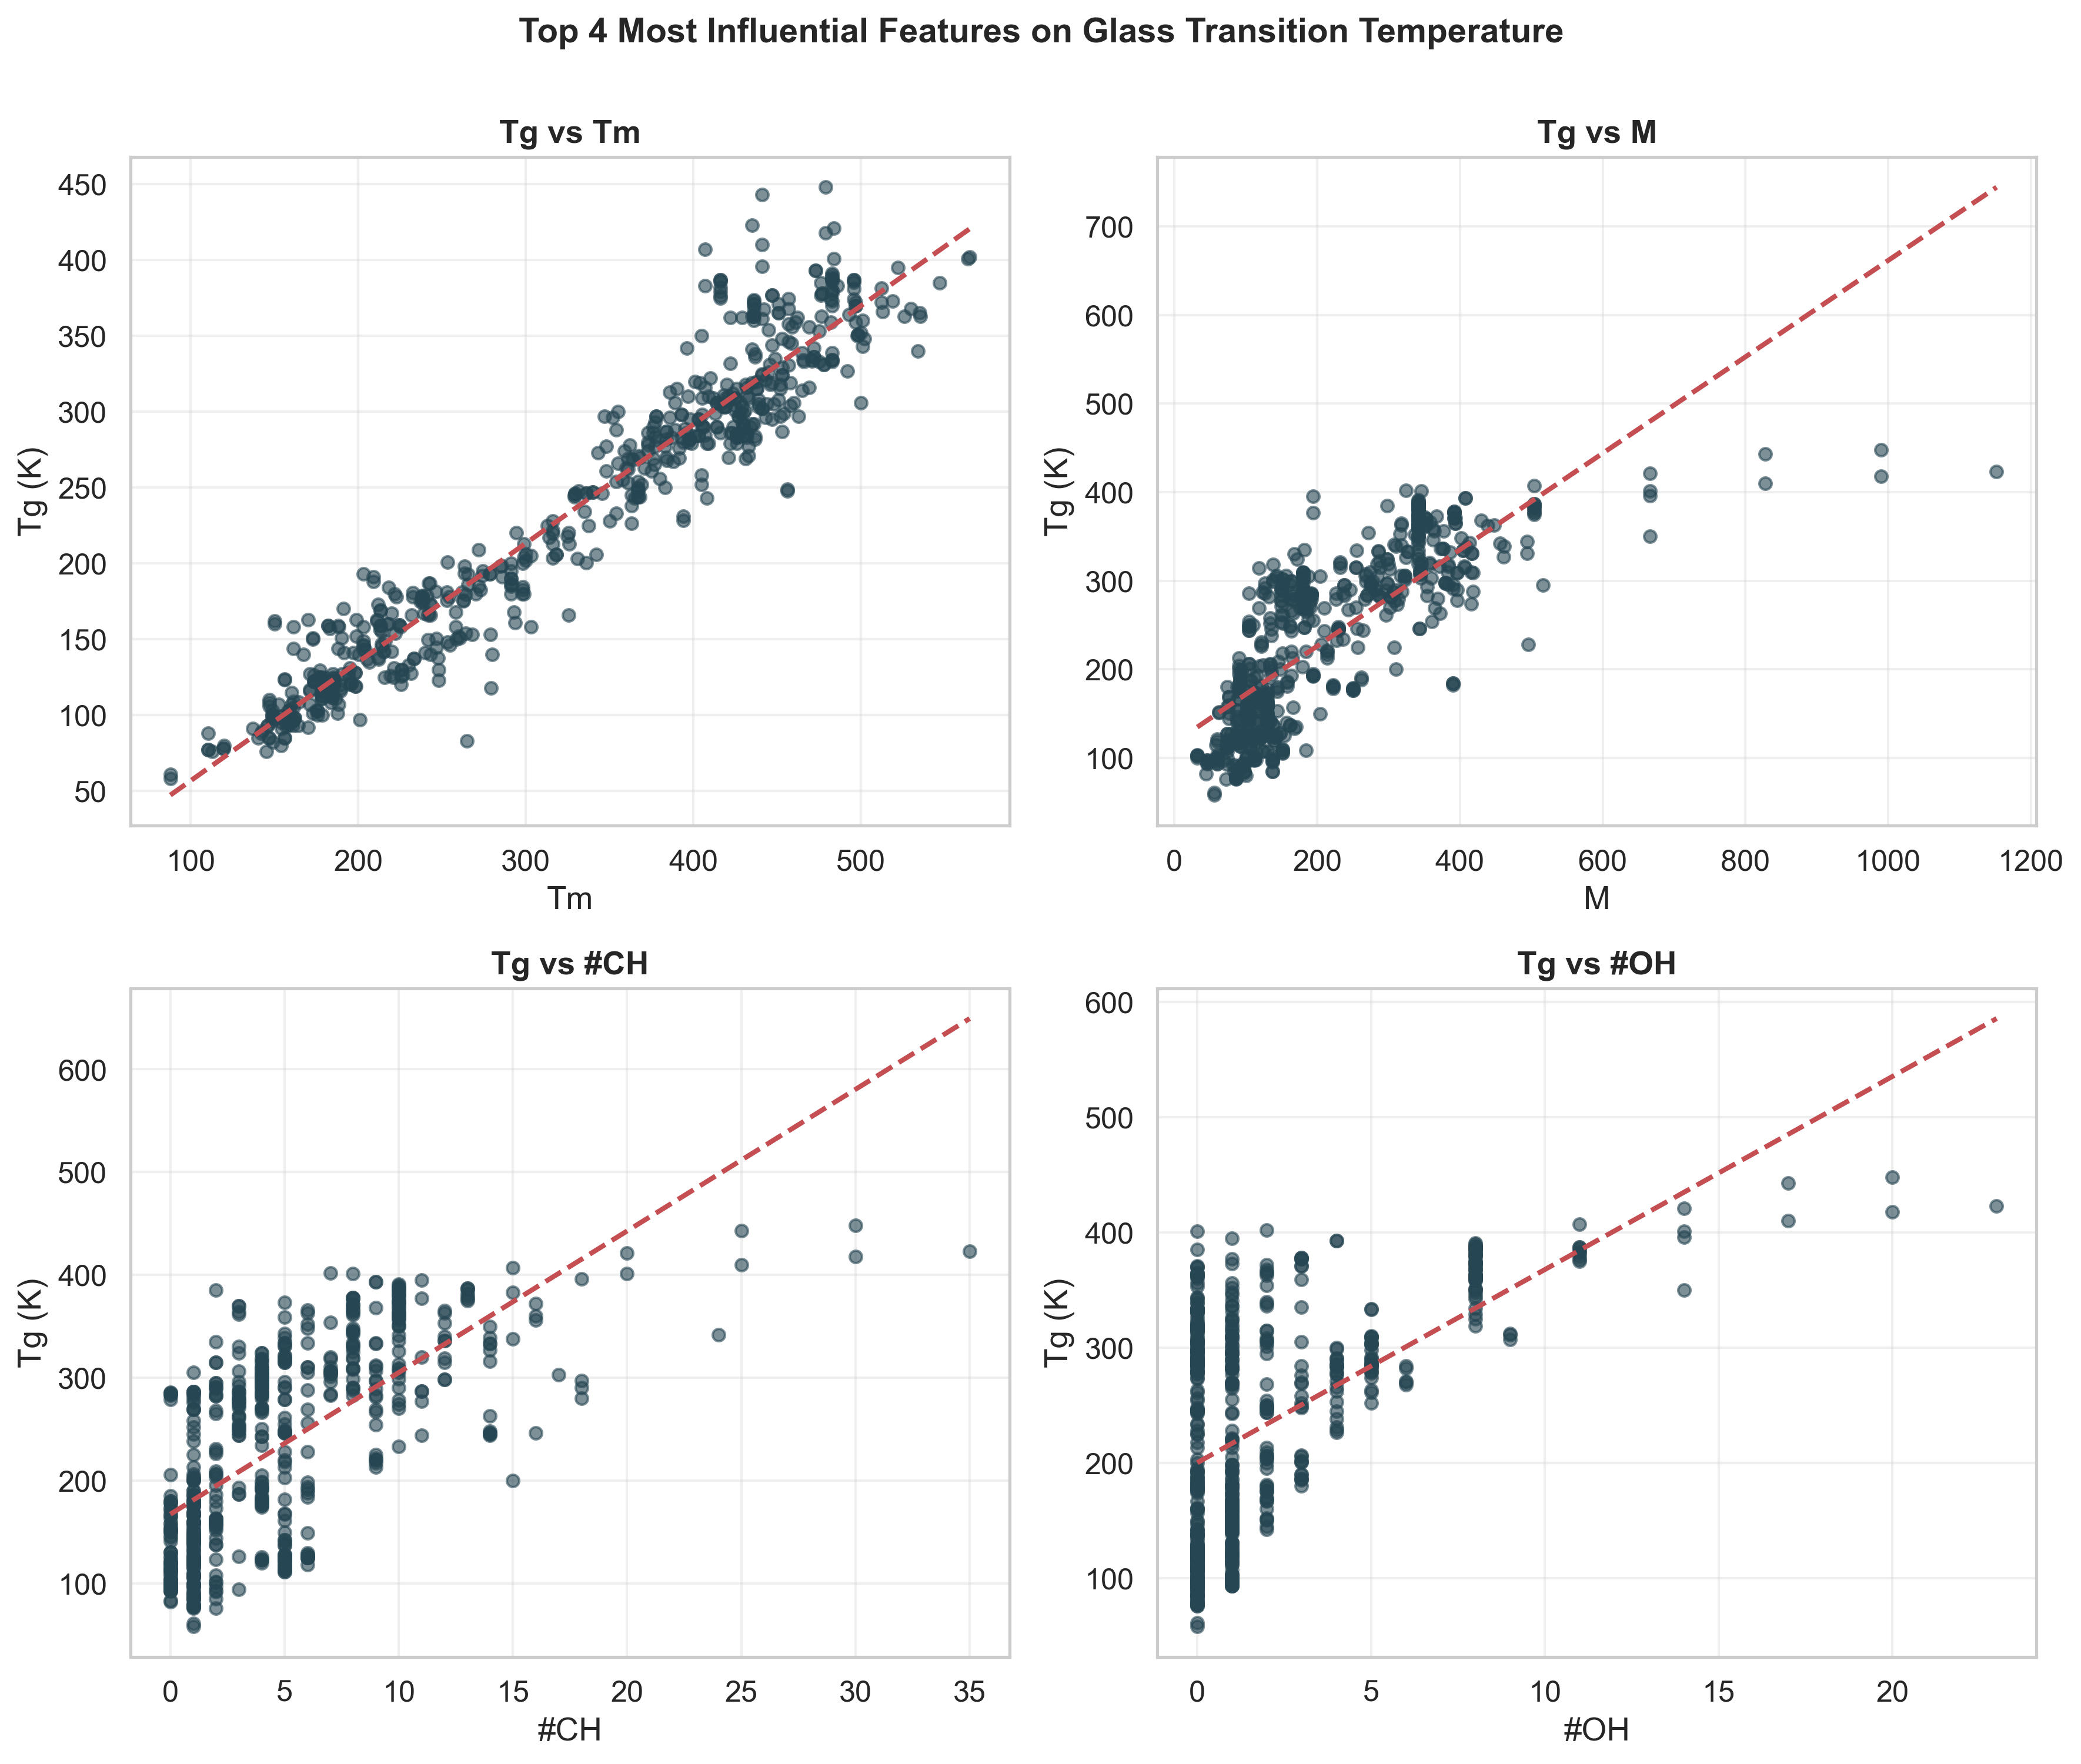

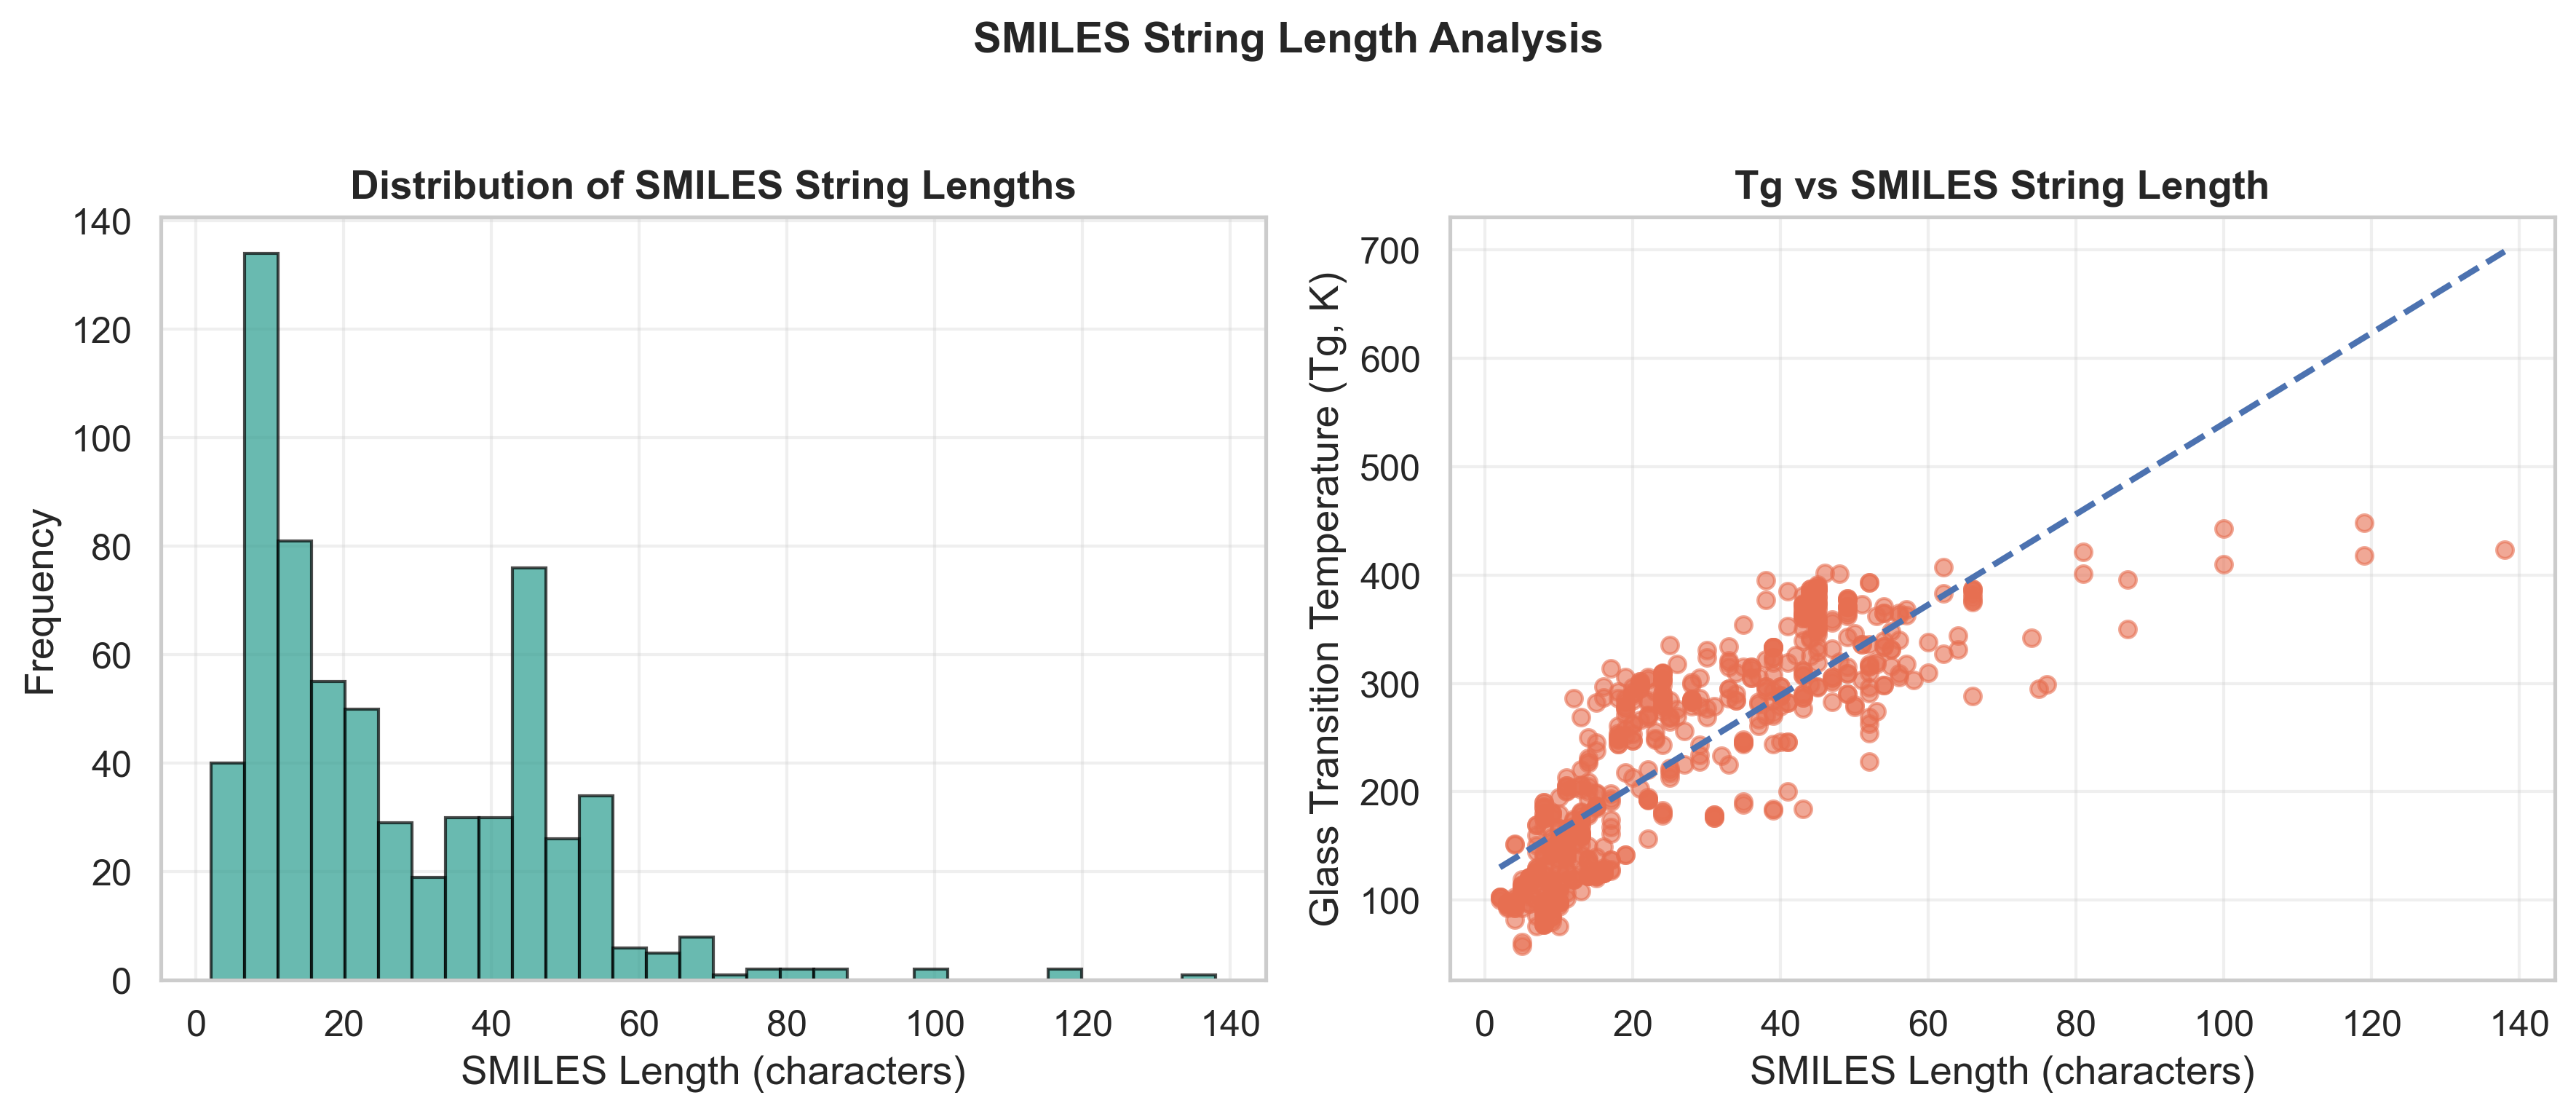

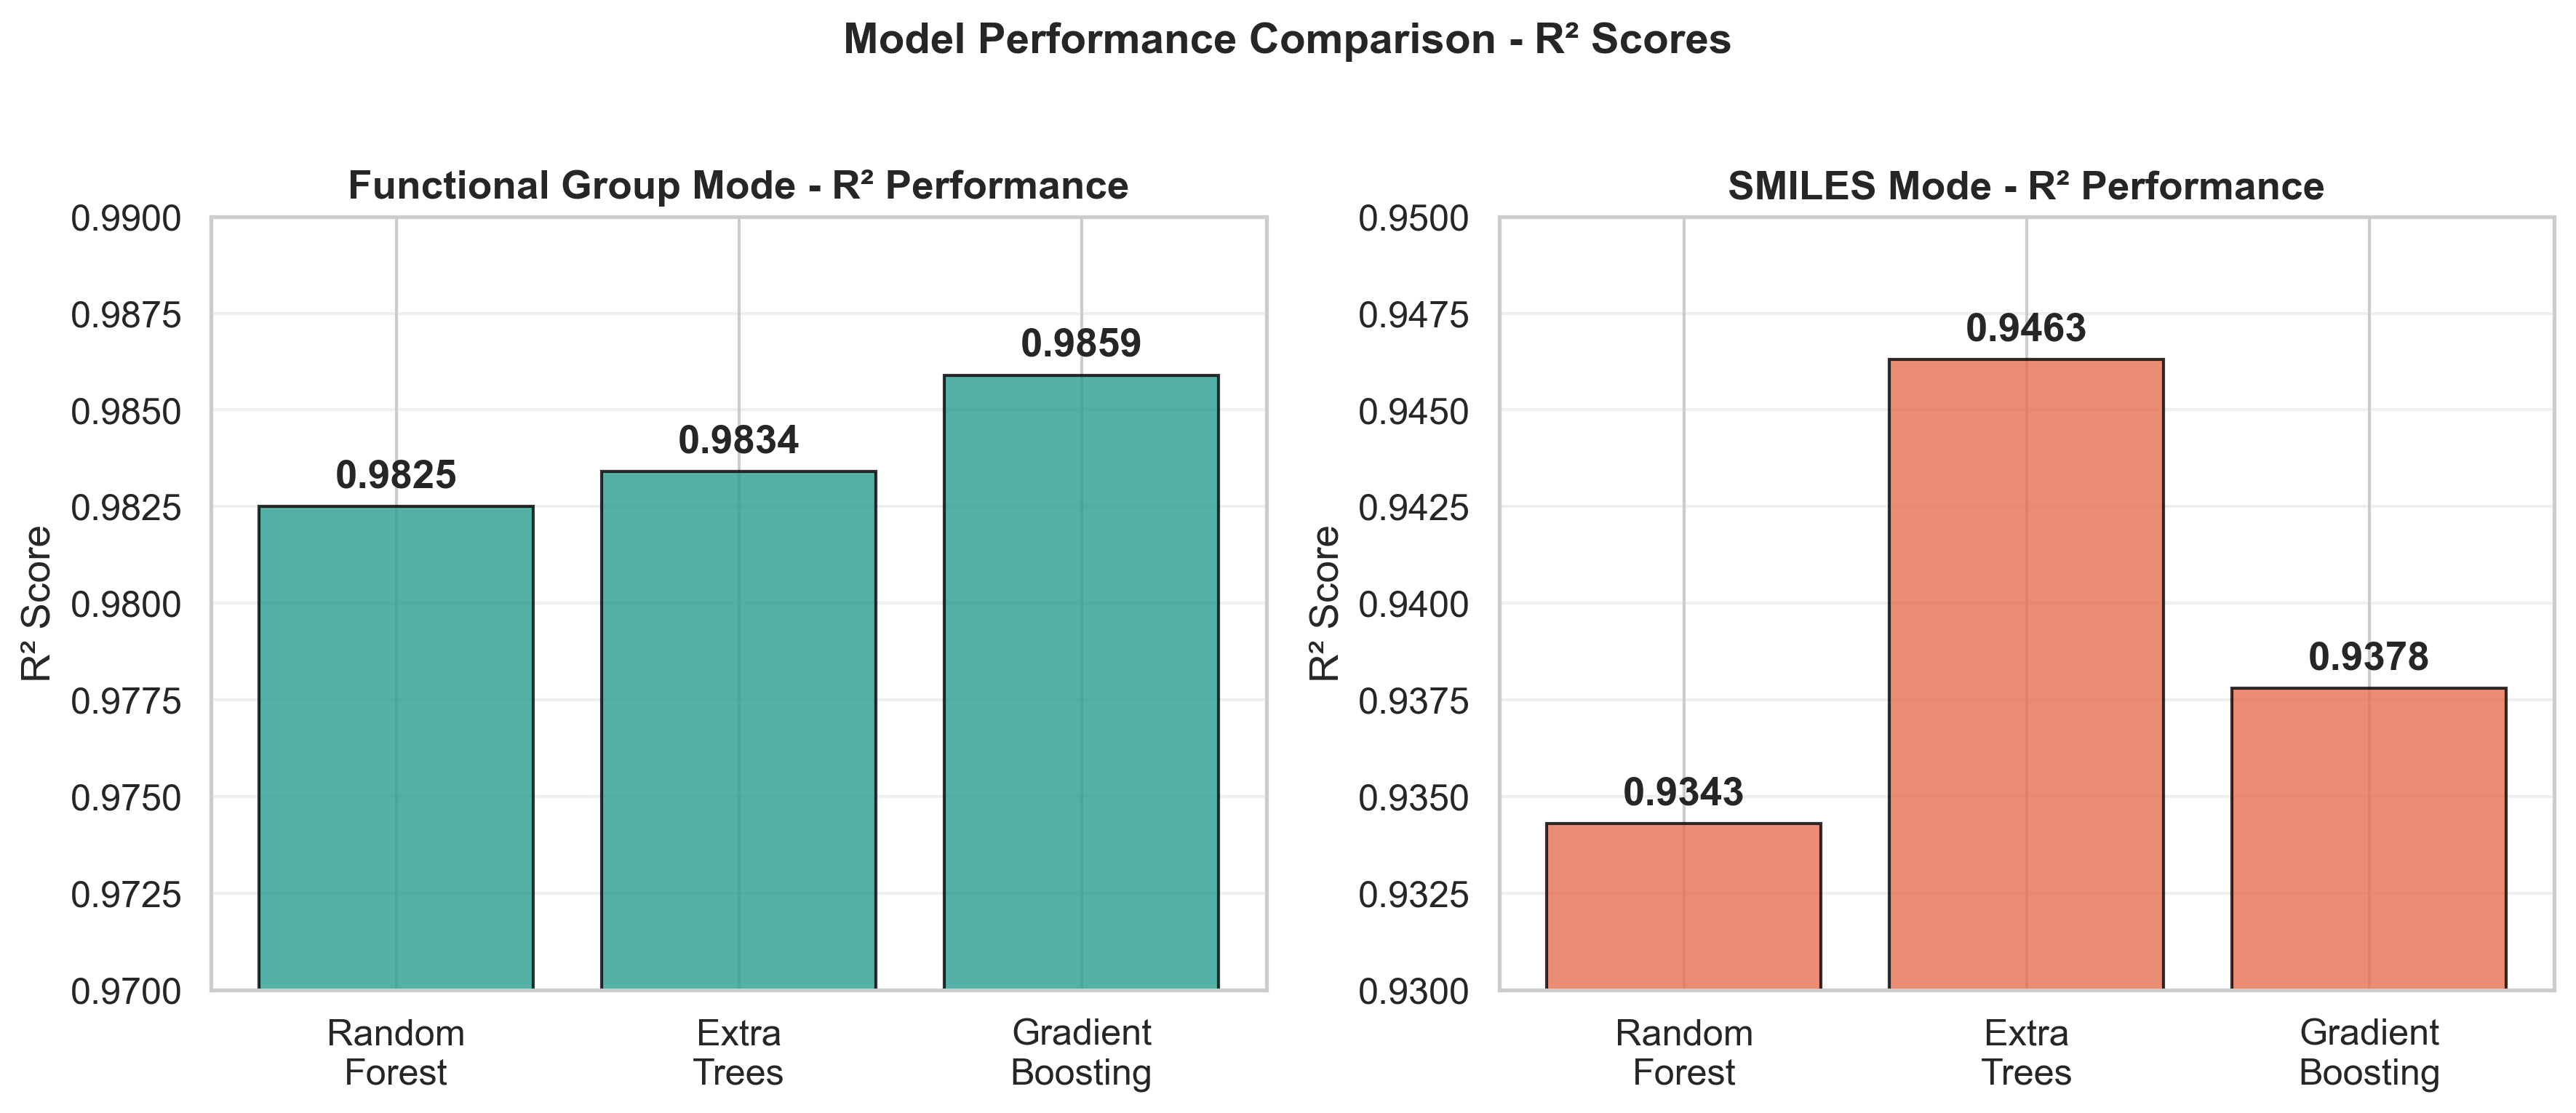

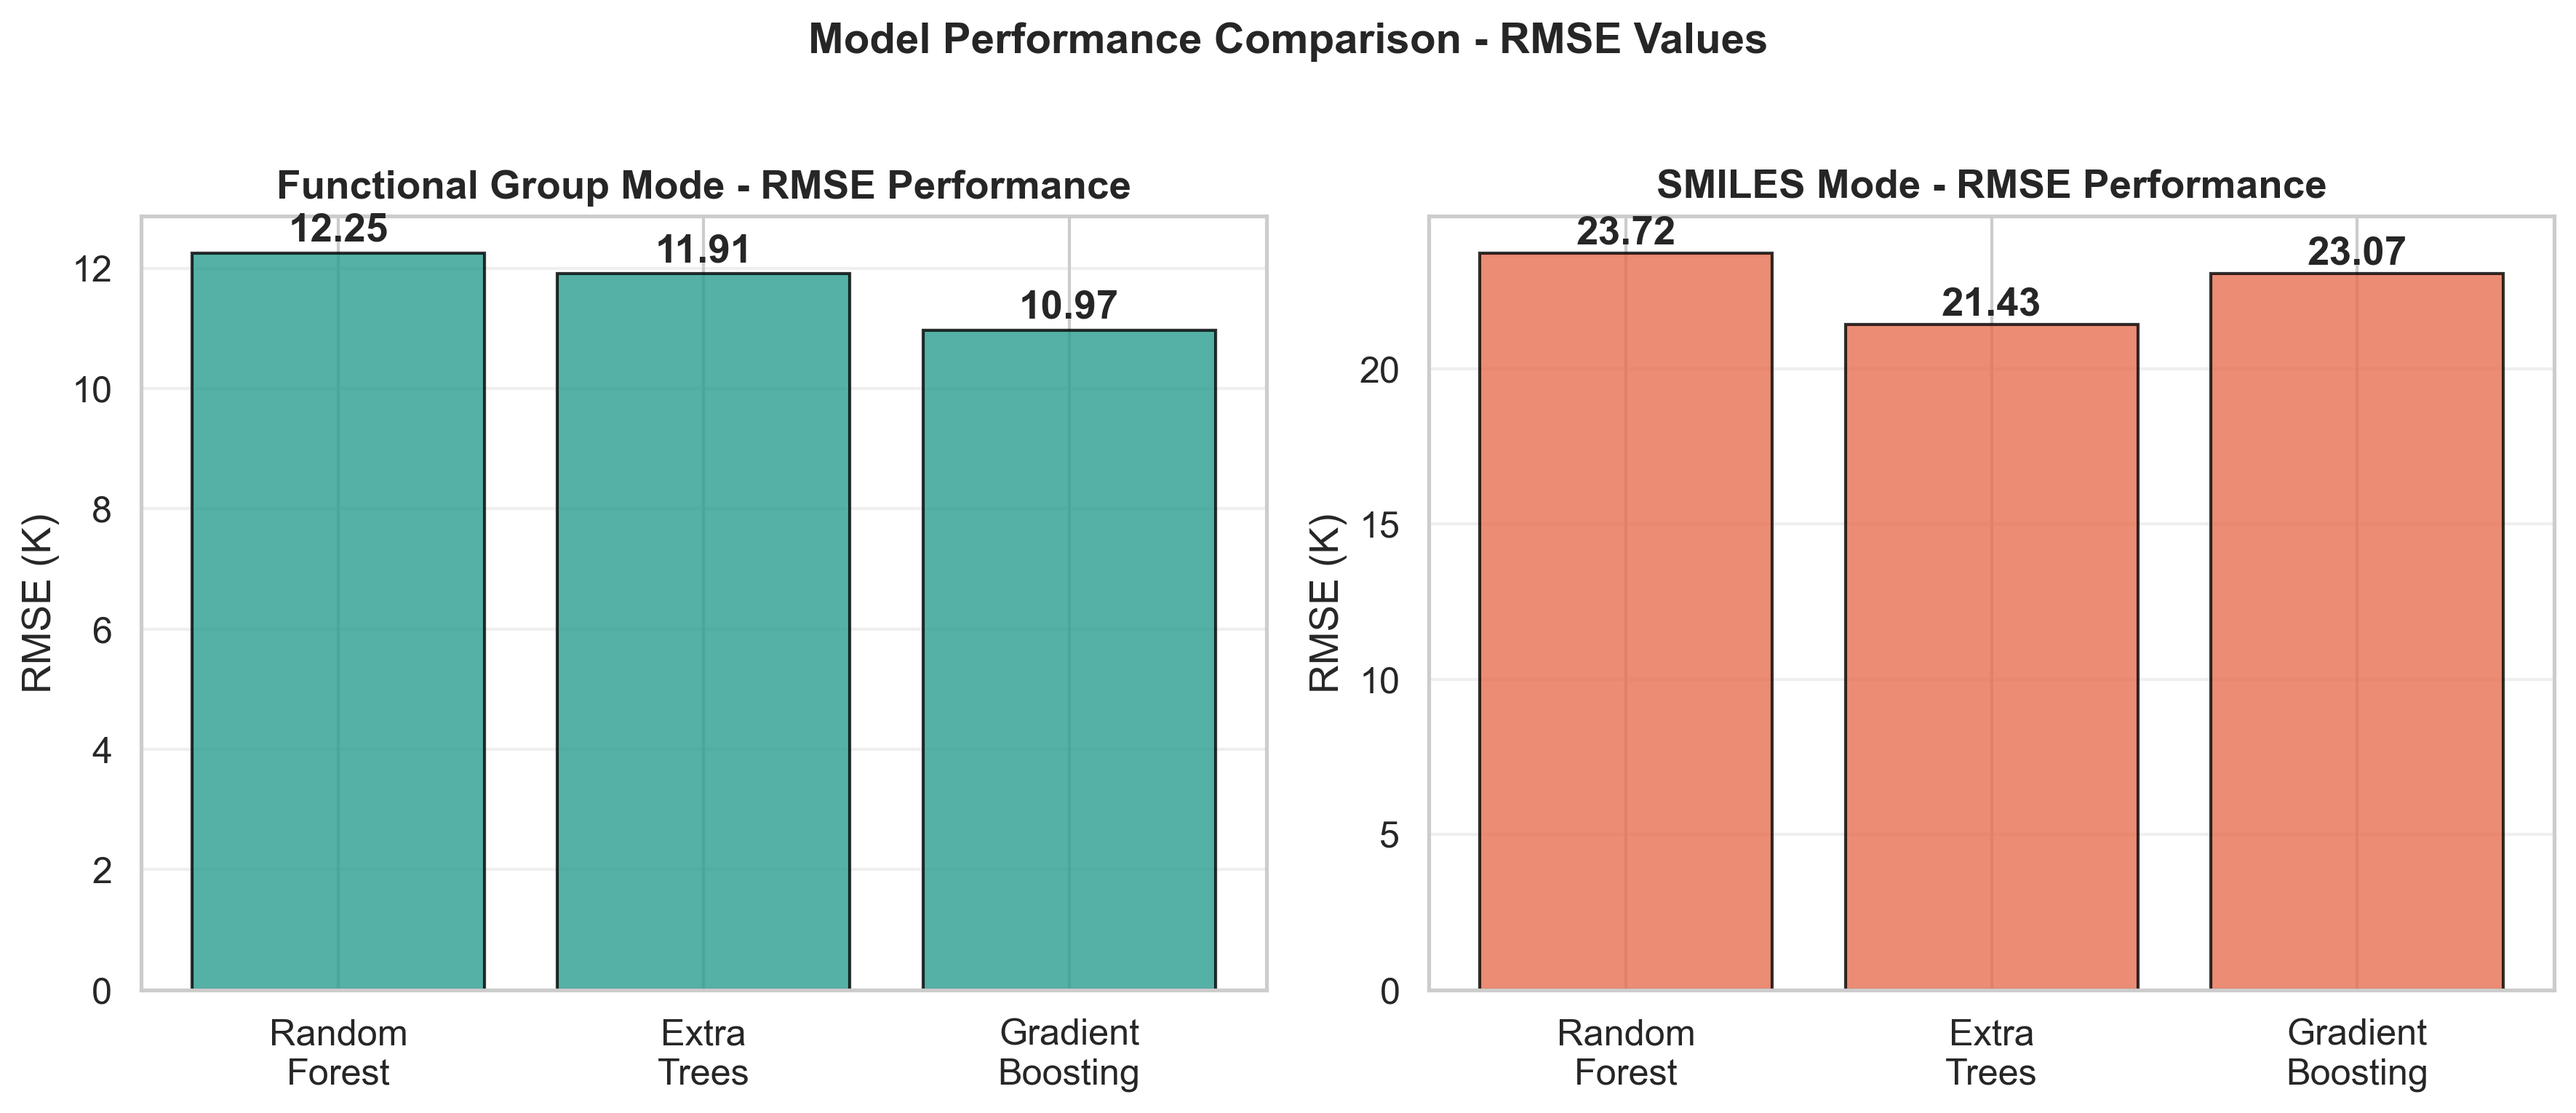

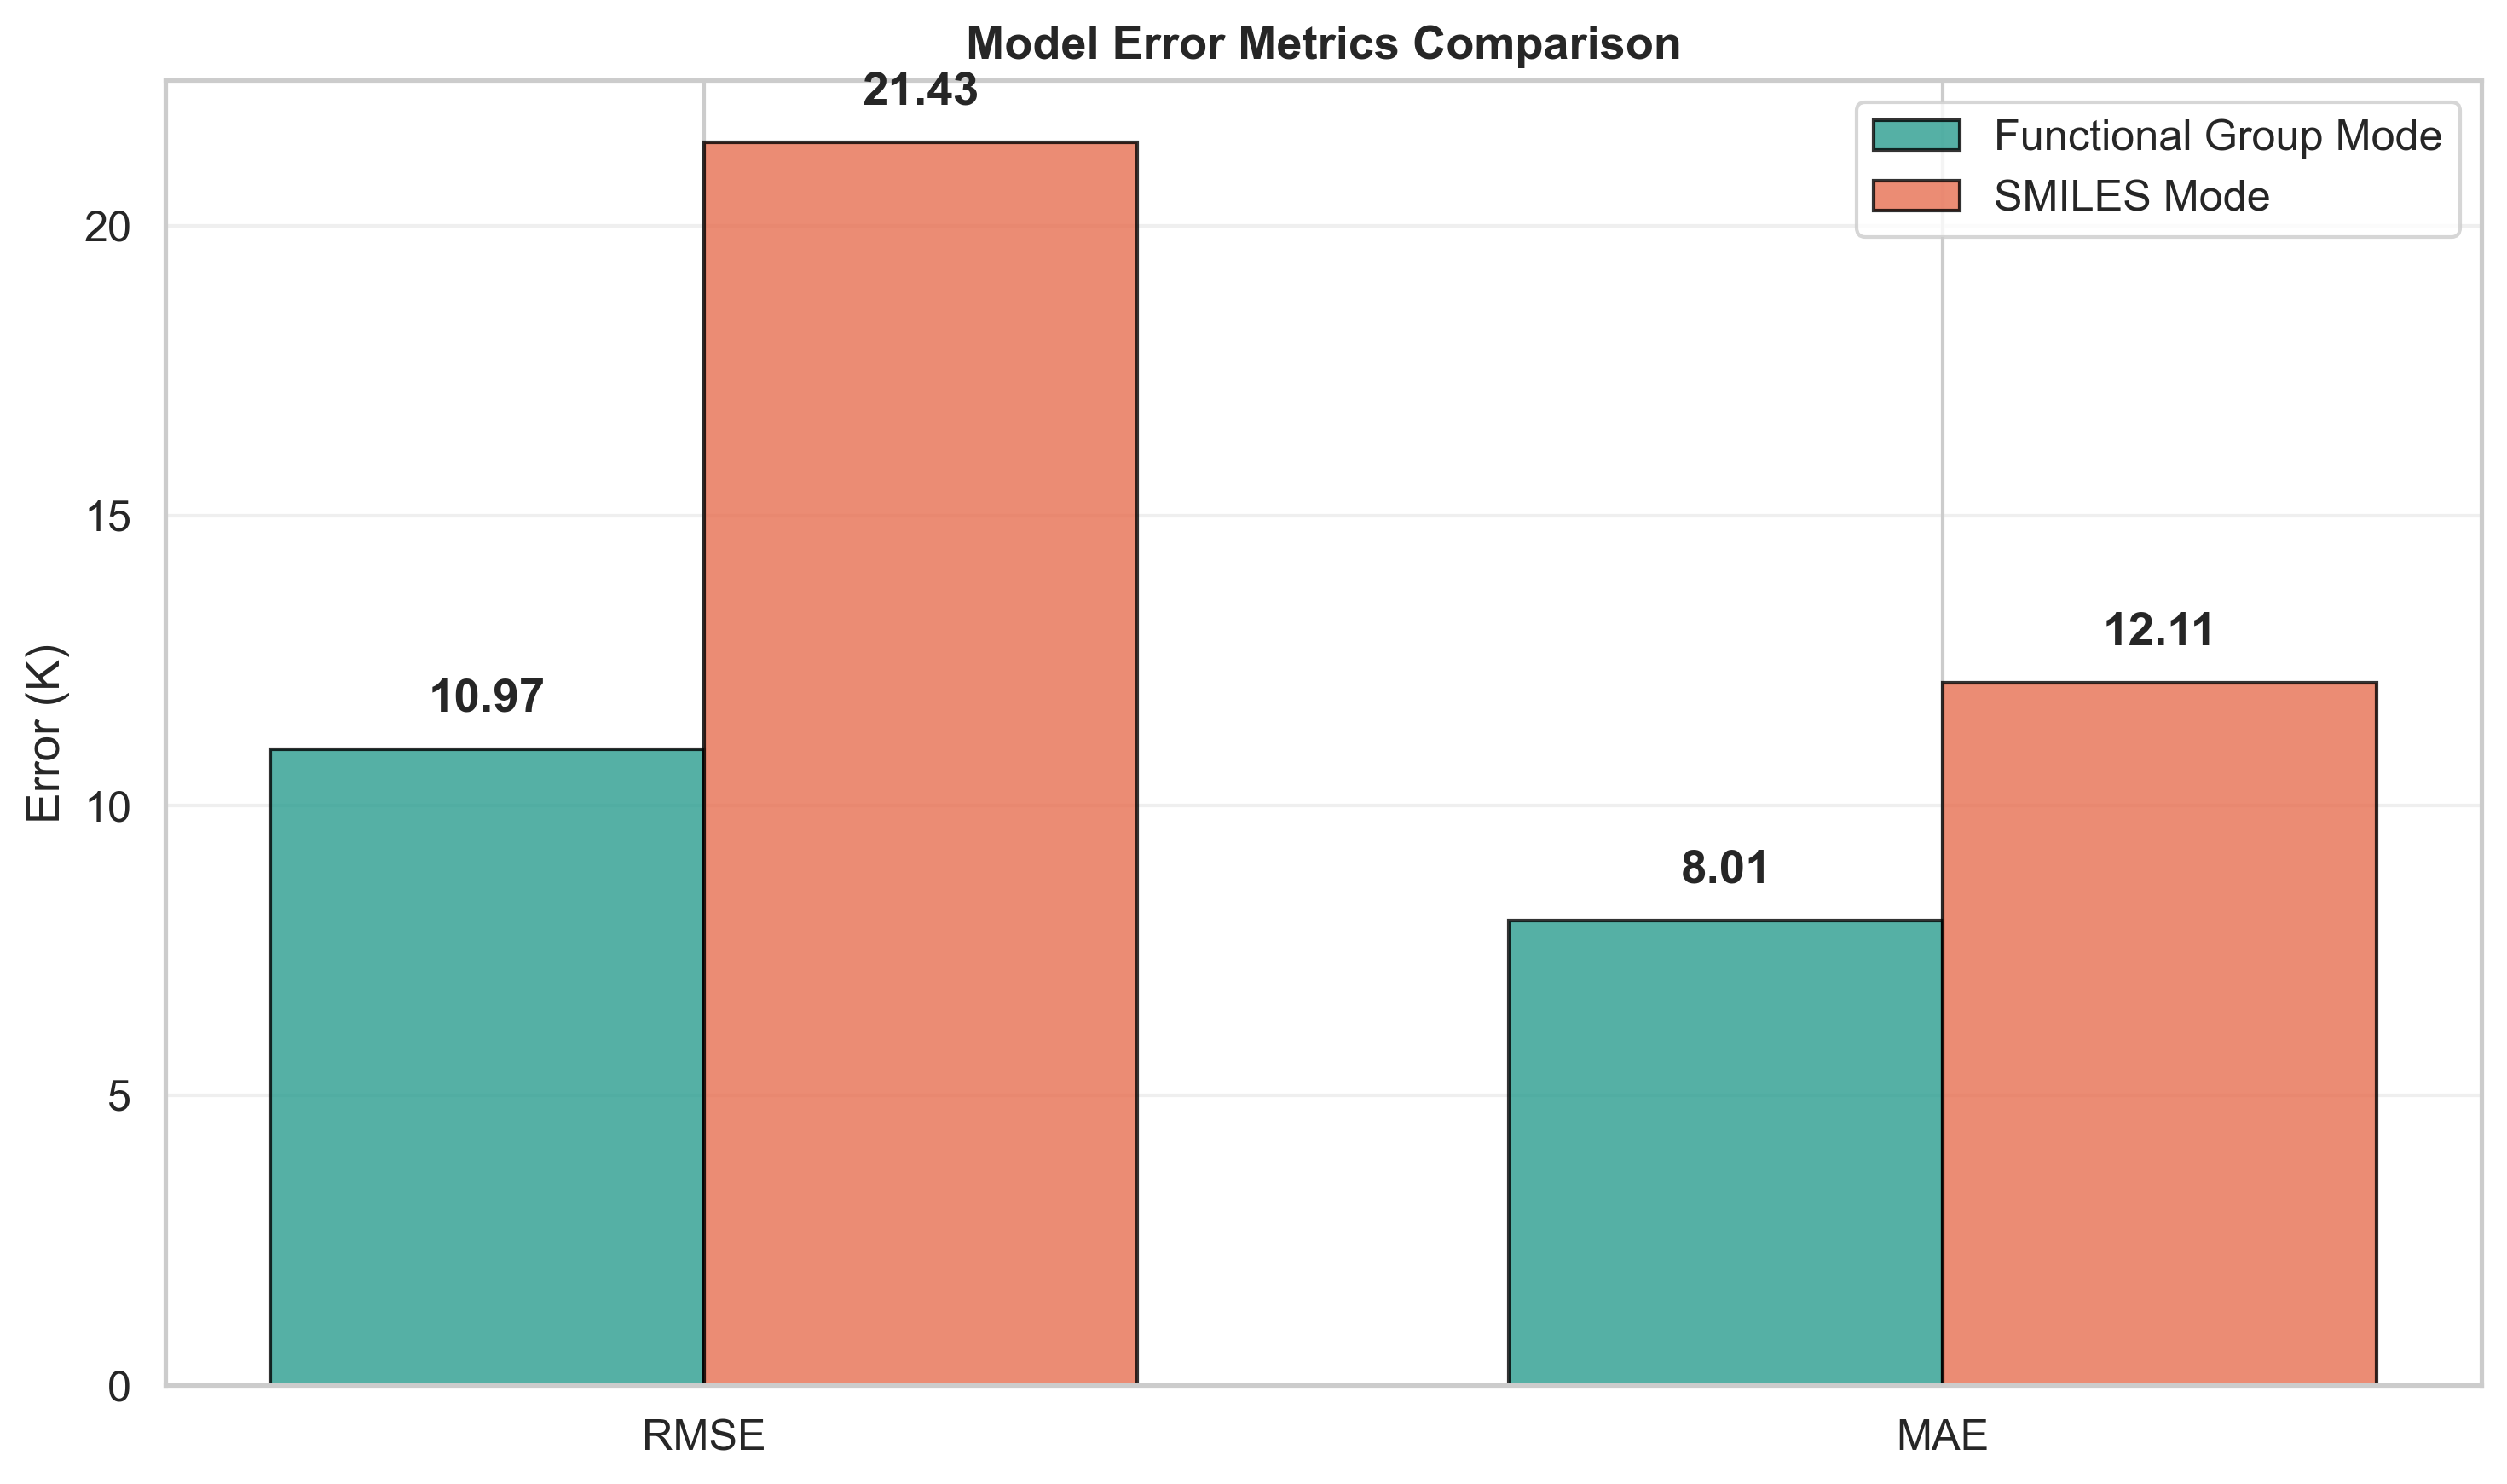

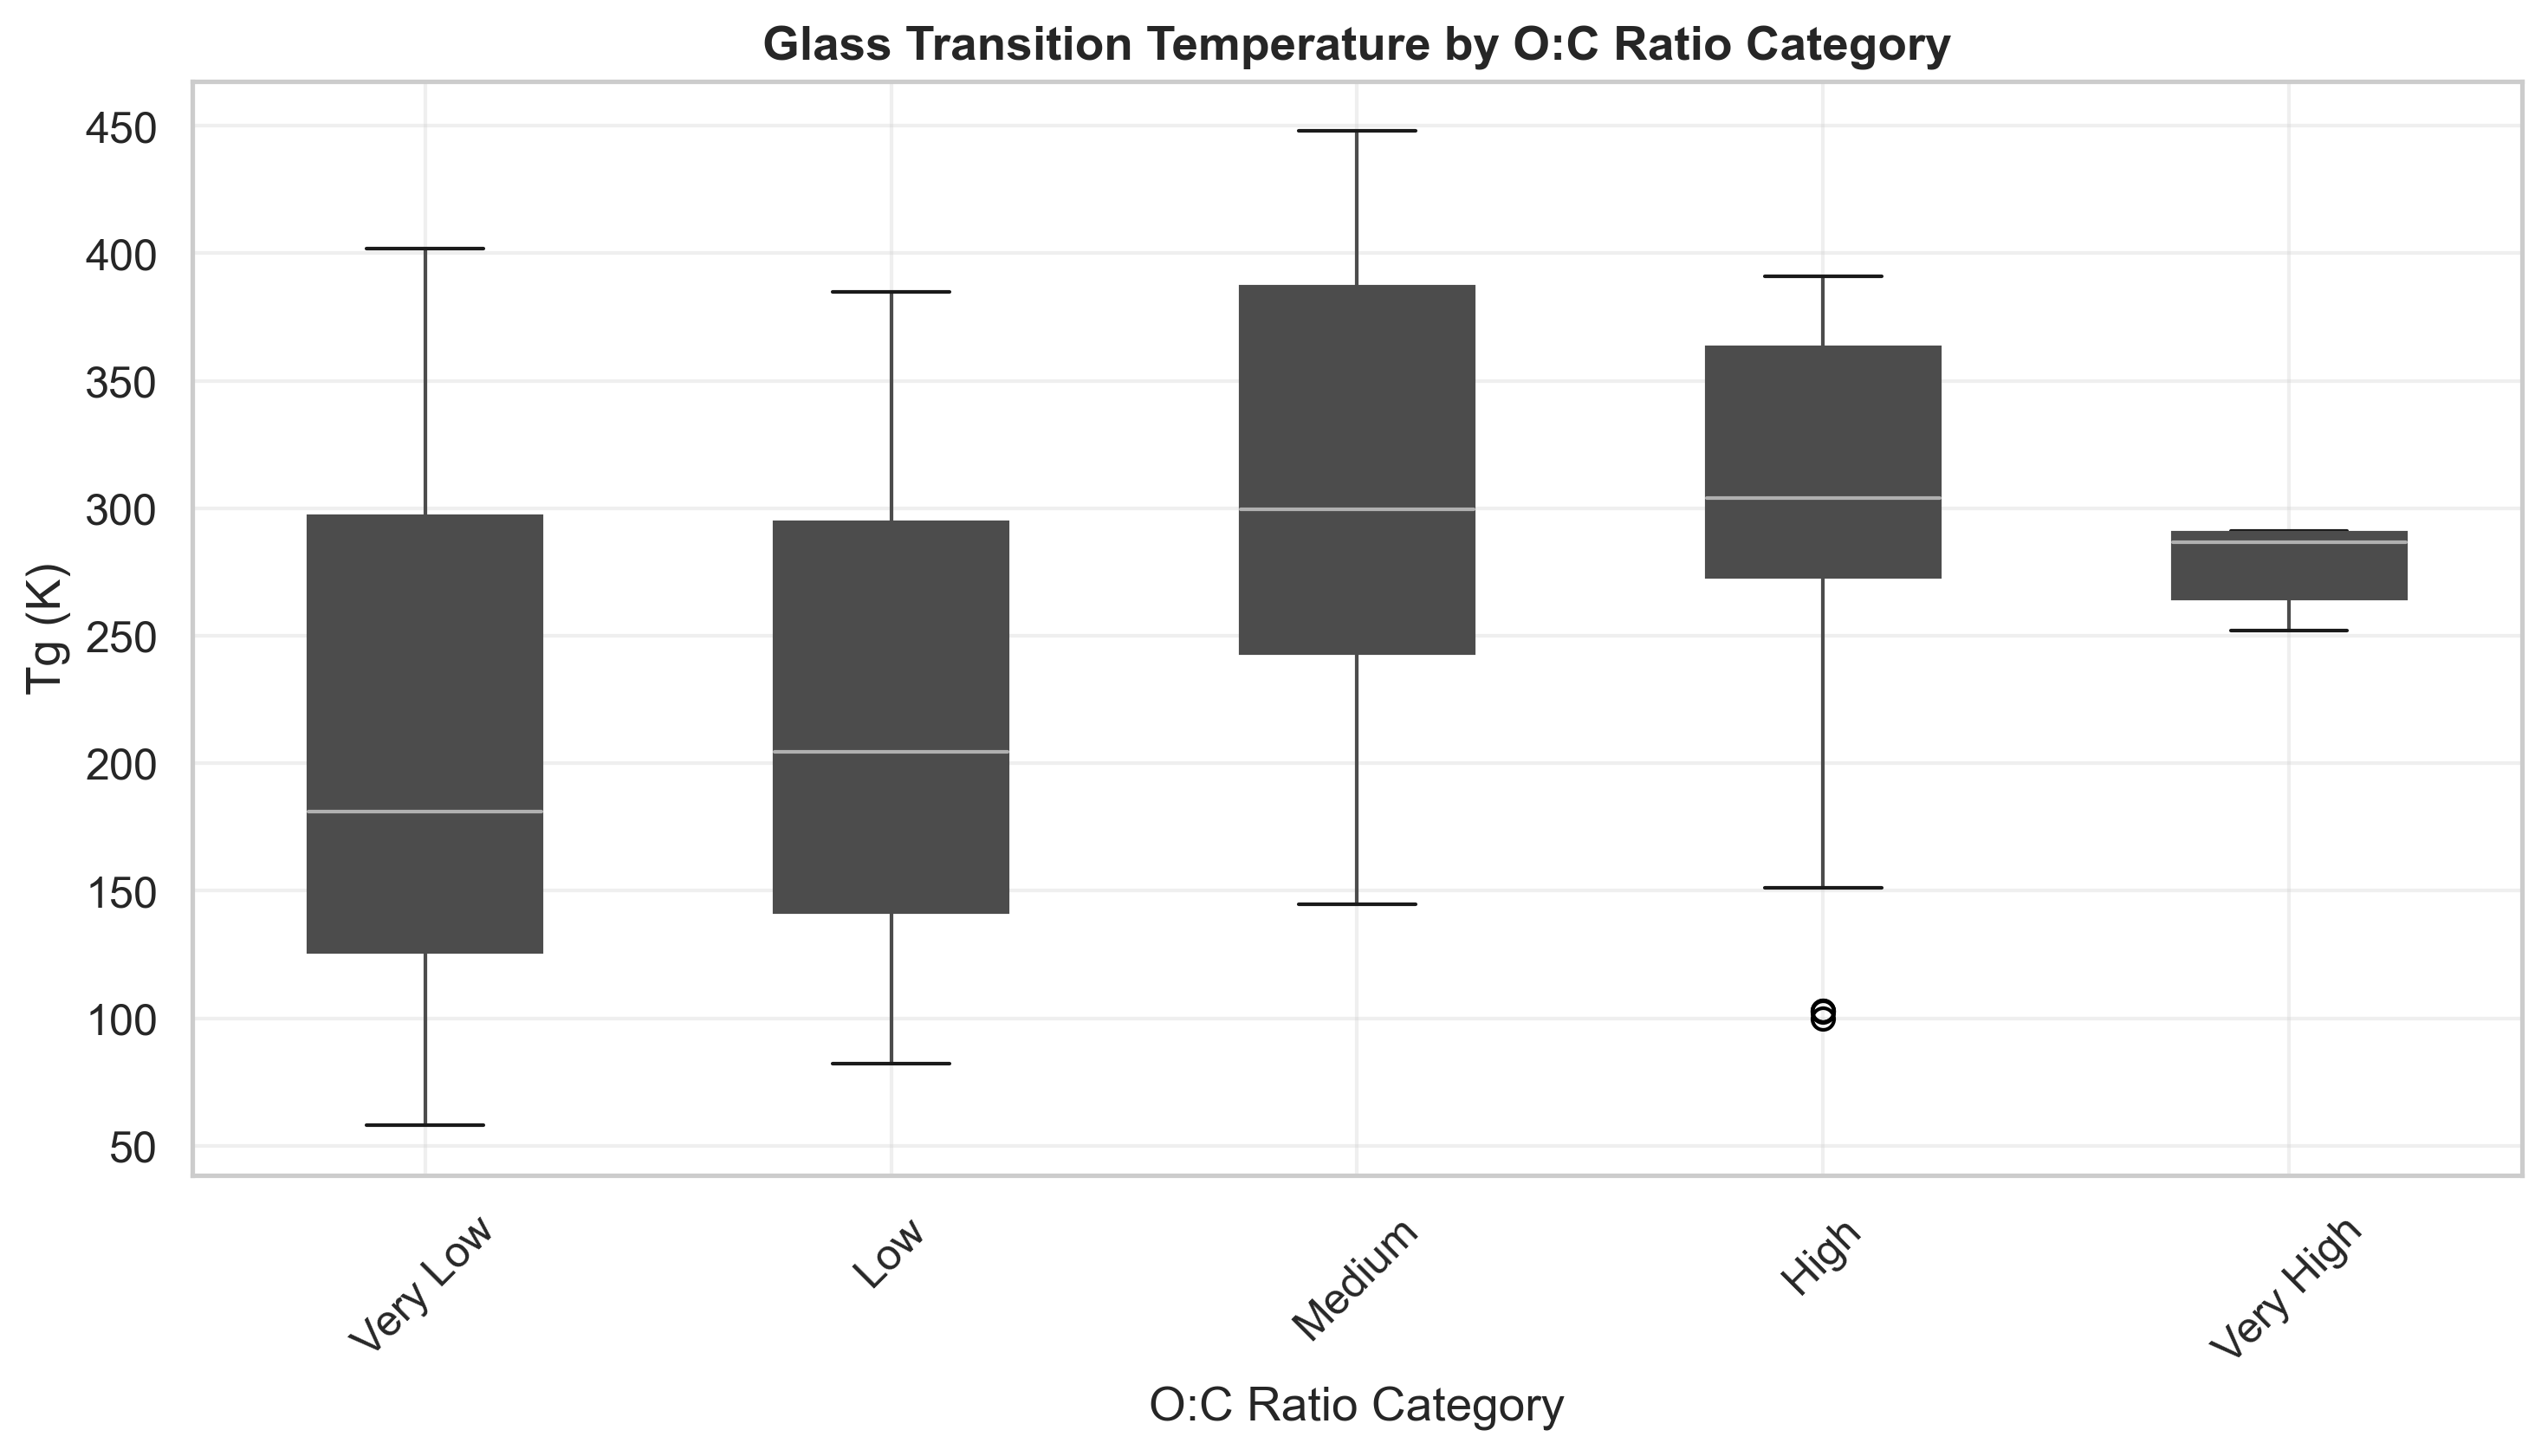

C:\Users\rehtr\anaconda3\envs\NewEnv1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rehtr\anaconda3\envs\NewEnv1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rehtr\anaconda3\envs\NewEnv1\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8321 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rehtr\anaconda3\envs\NewEnv1\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0, flags=flags)


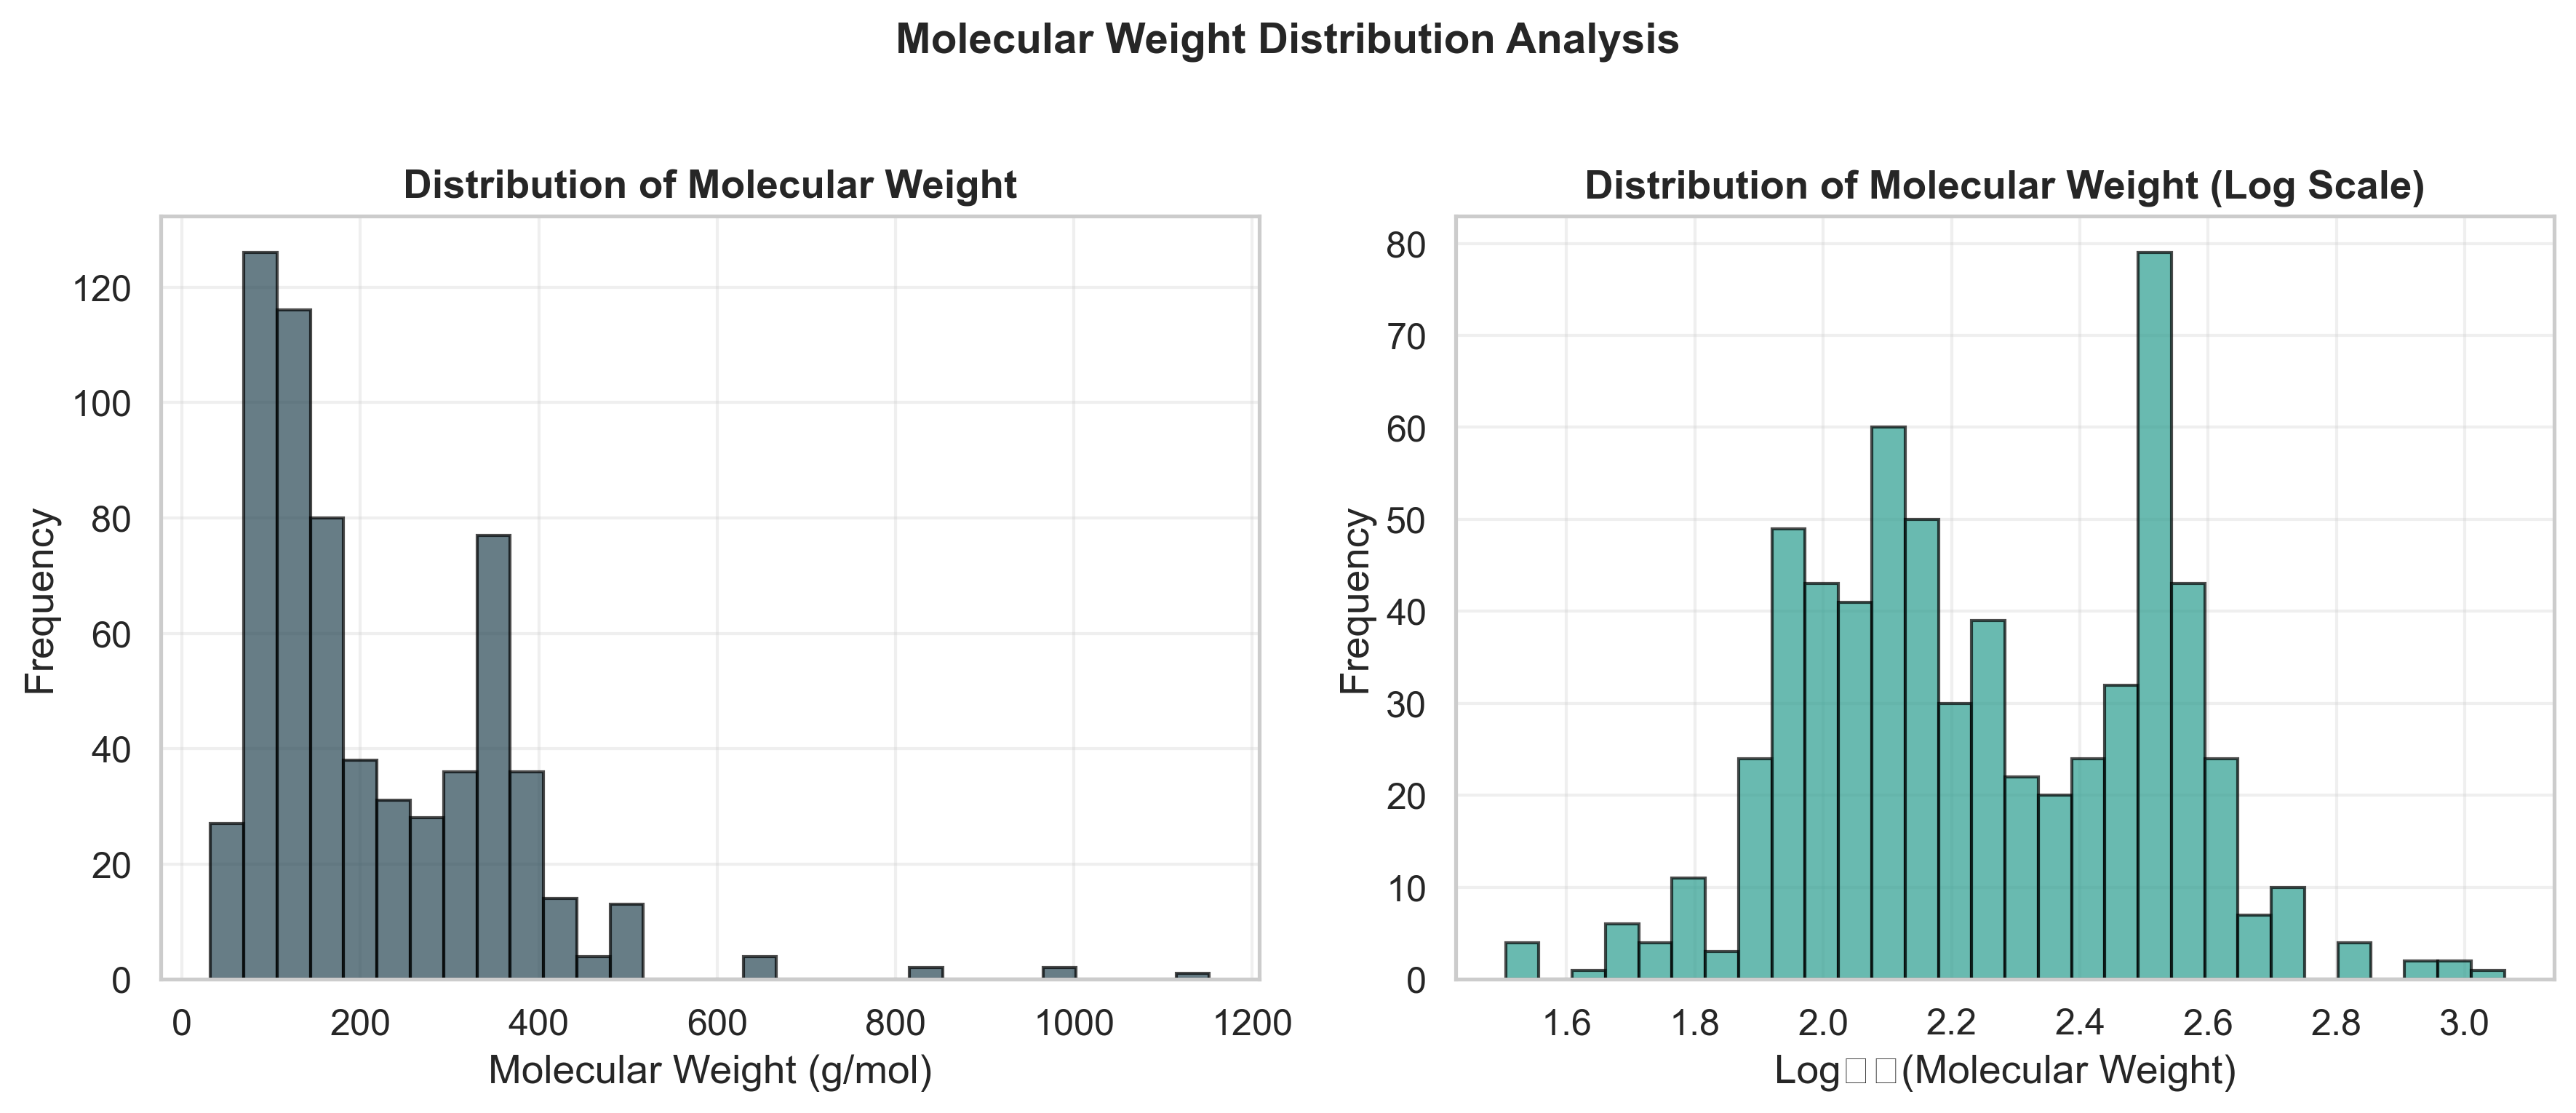

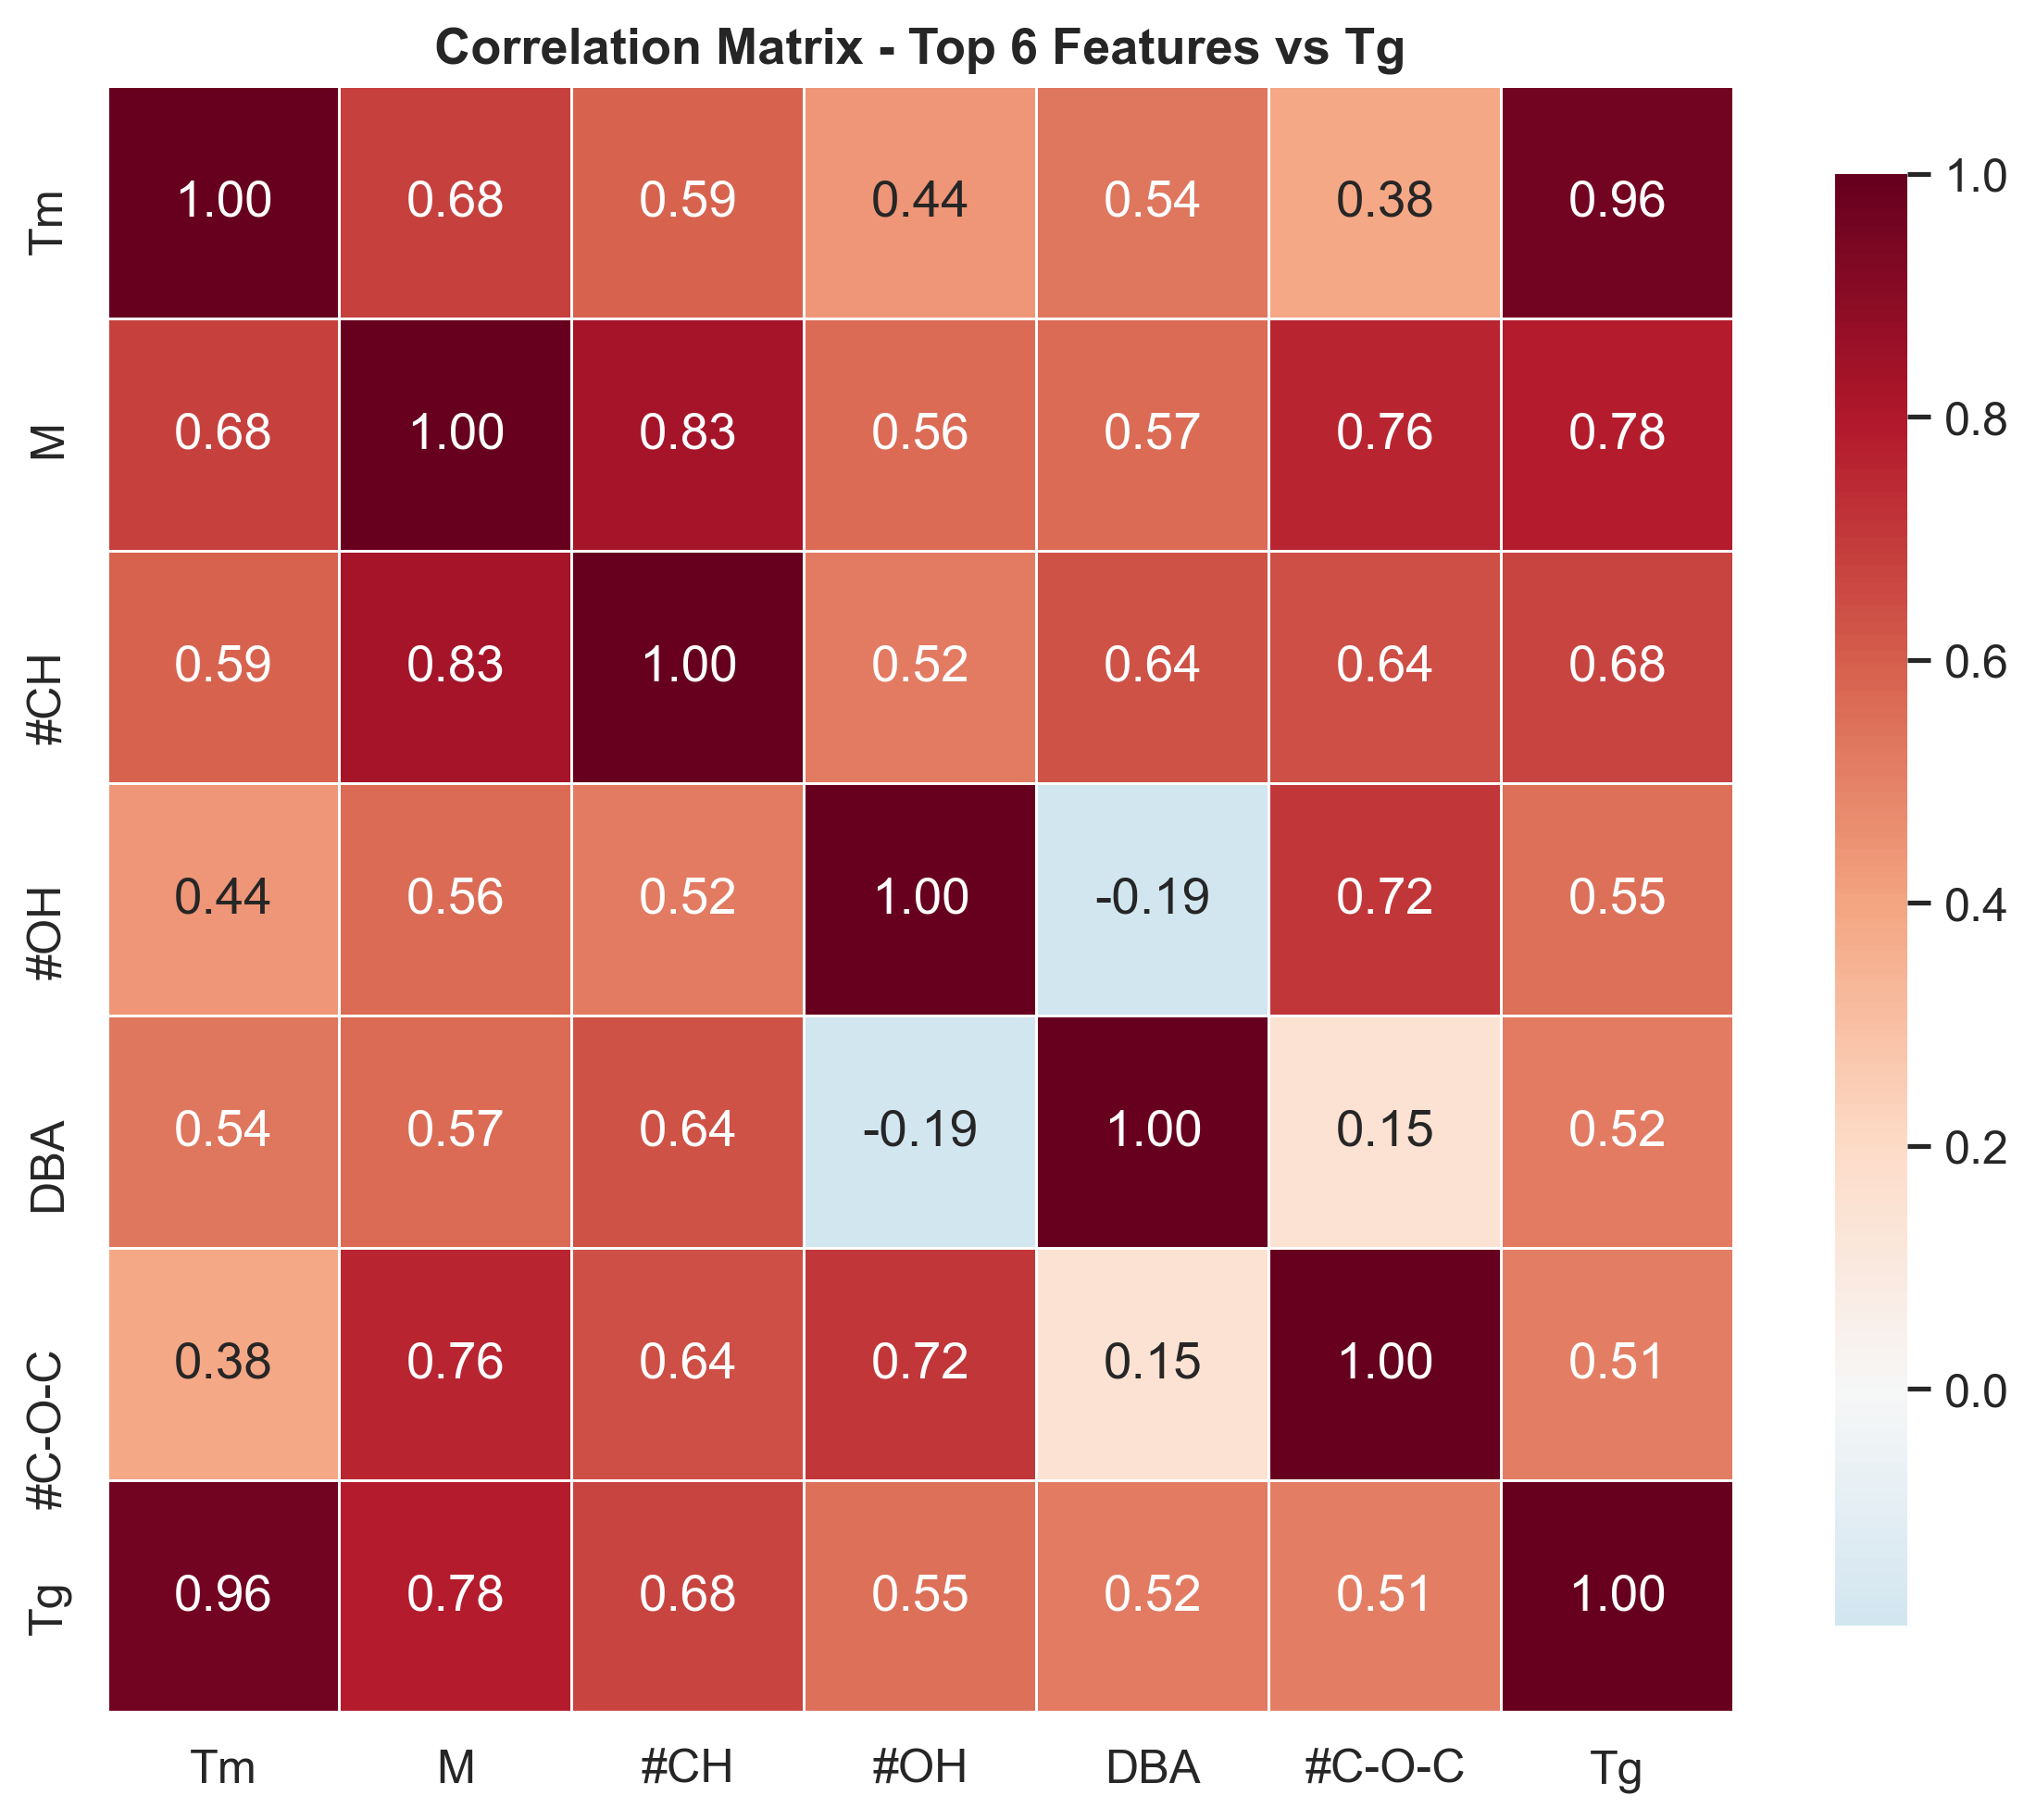

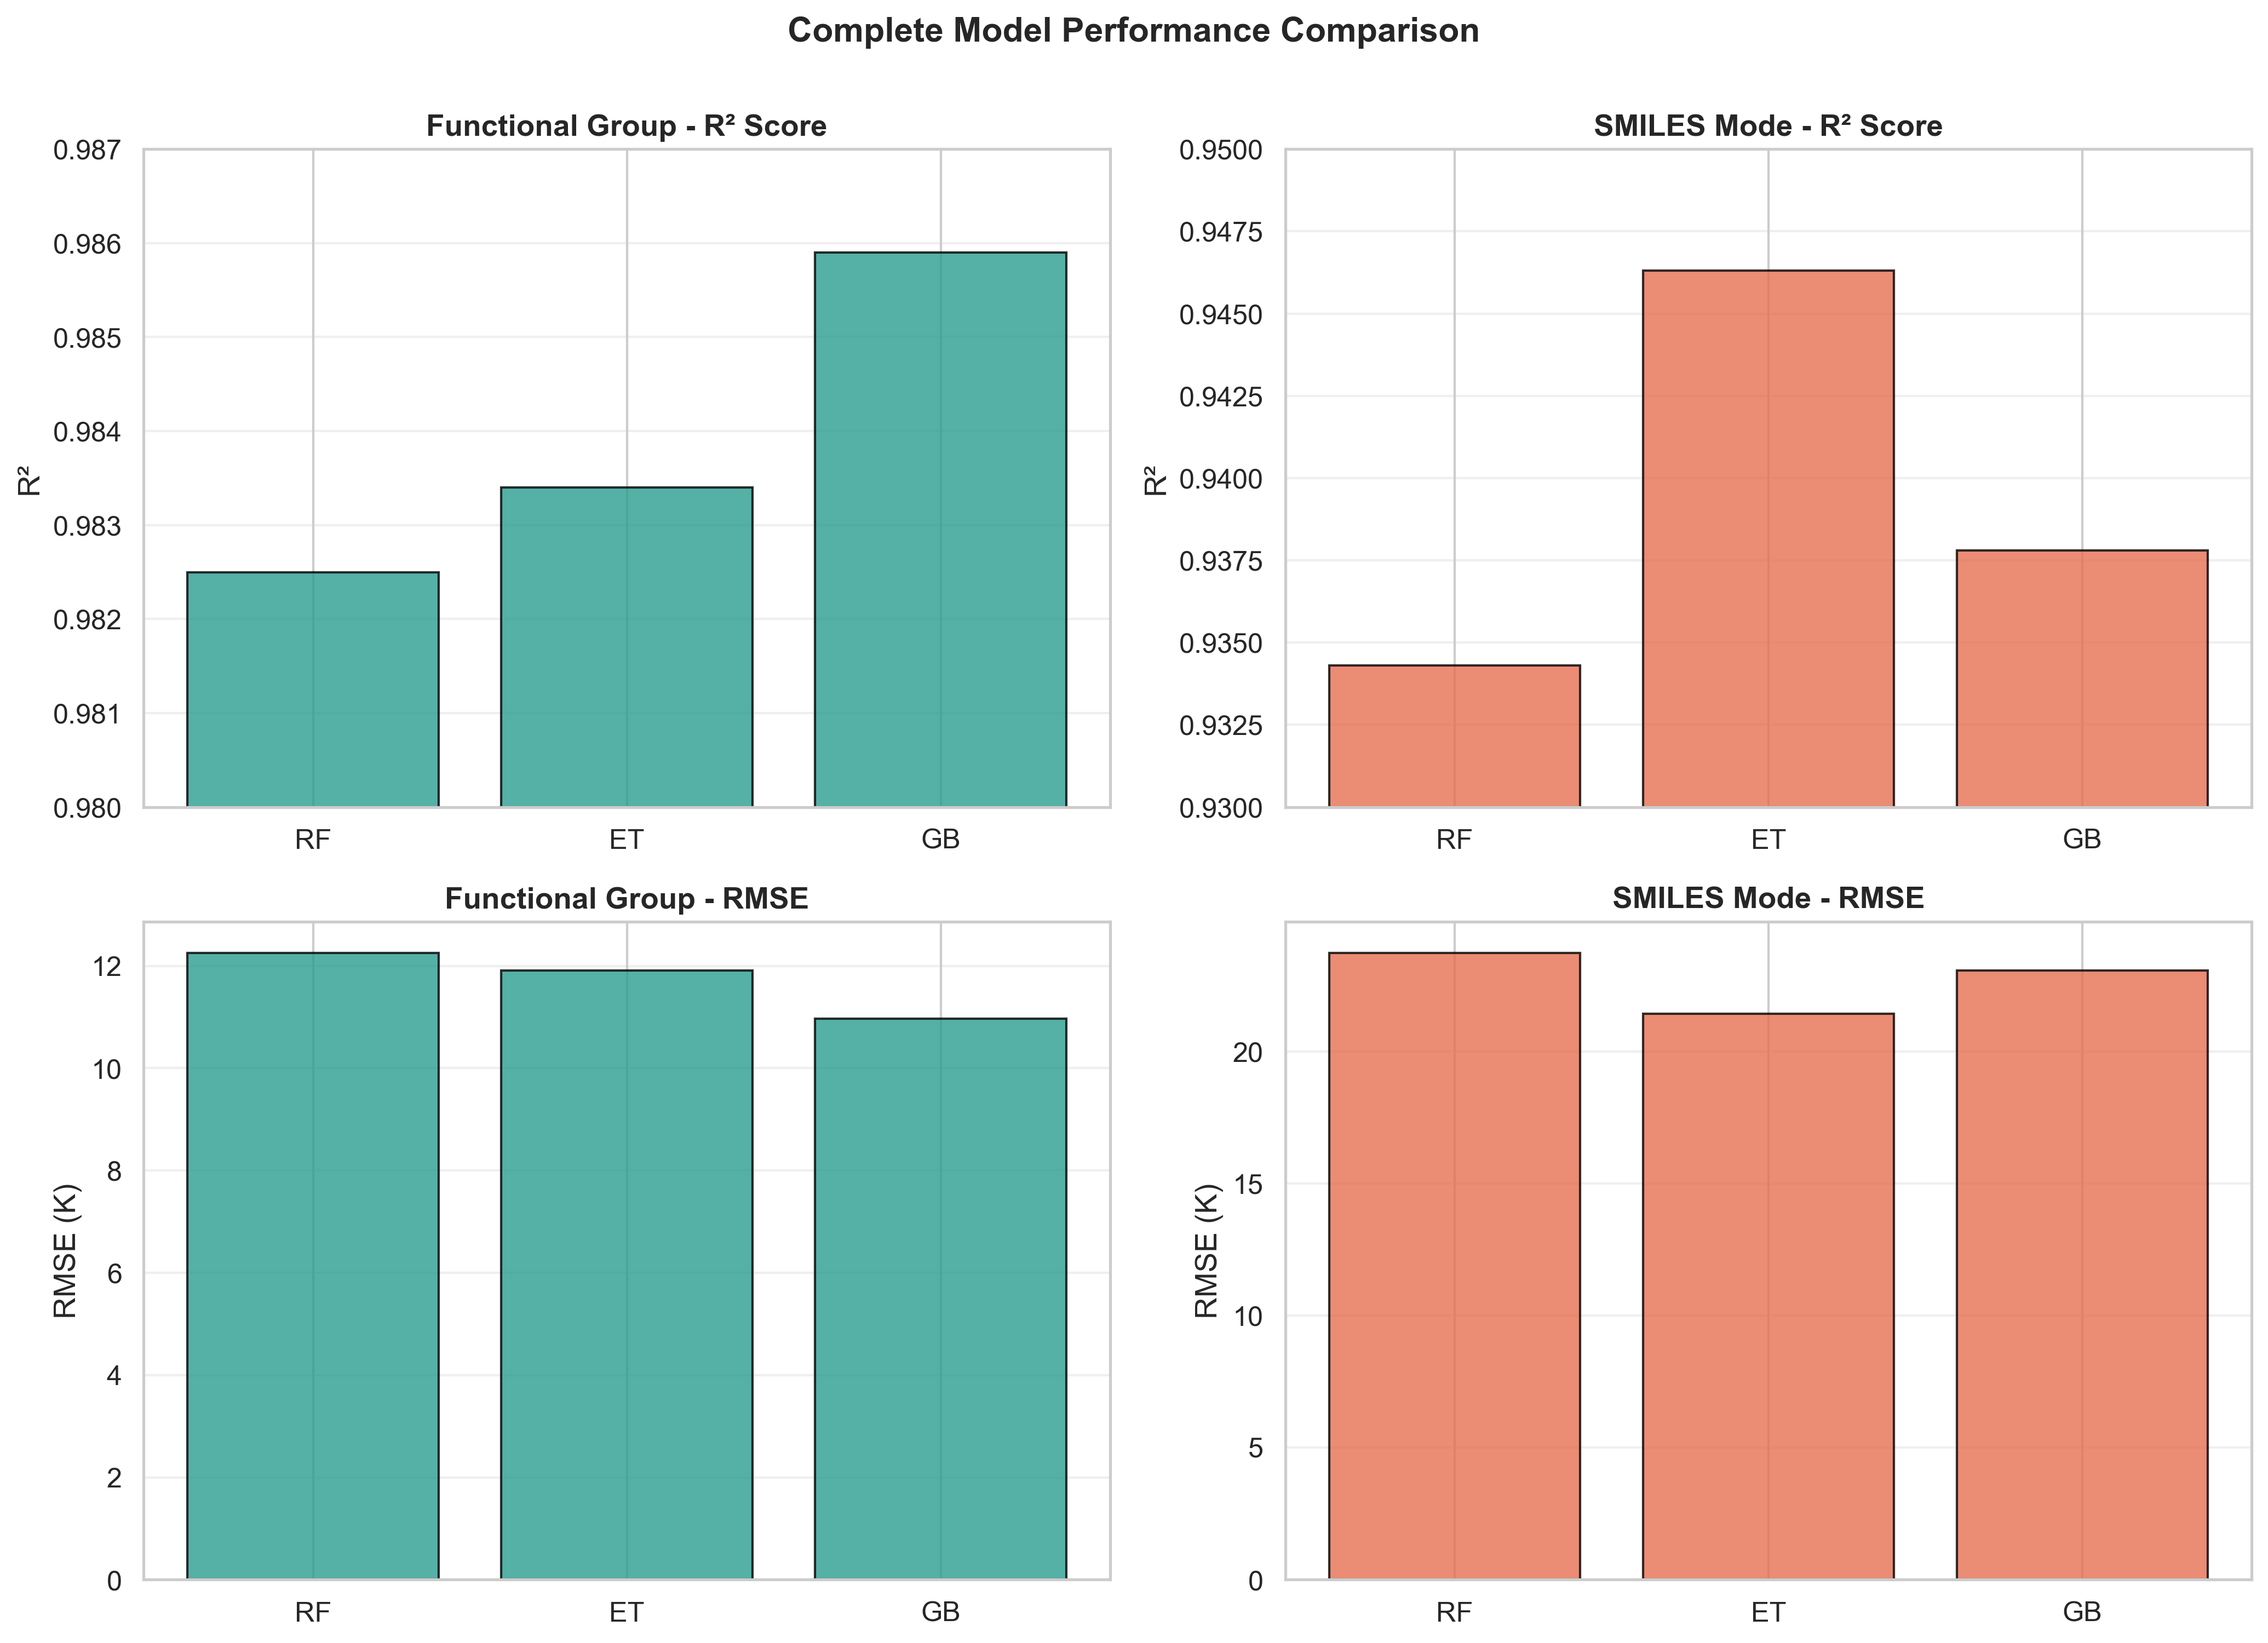

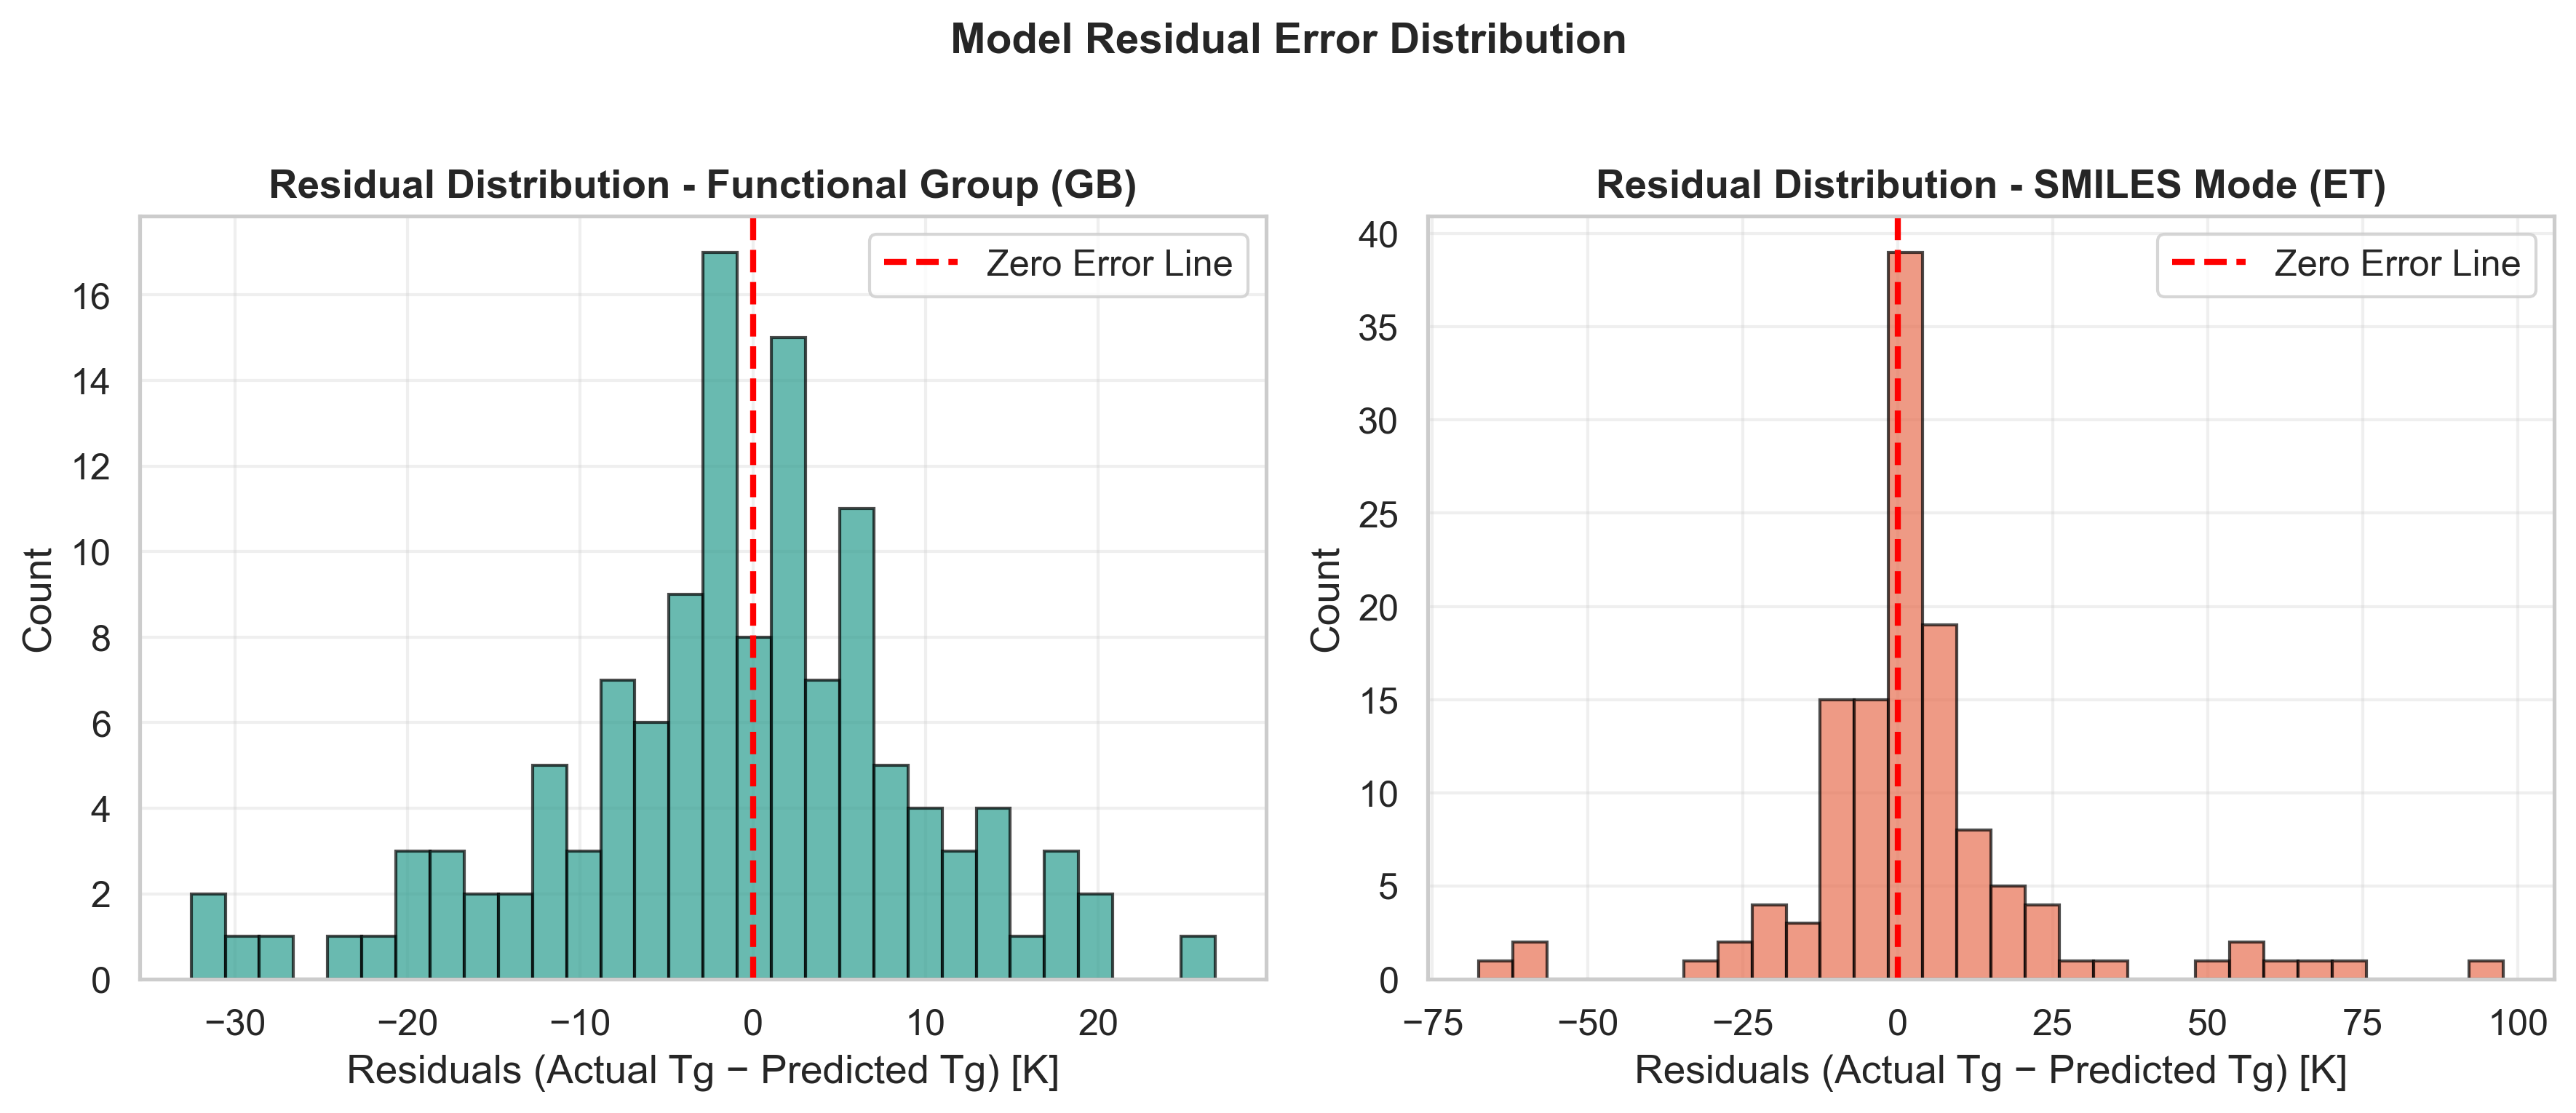


ALL FIGURES SAVED SUCCESSFULLY IN 'images/' FOLDER

FIGURES GENERATED:
1. Figure1_Tg_Tm_Distributions.png
2. Figure2_Tg_vs_Tm_M.png
3. Figure3_Correlation_Heatmap.png
4. Figure4_Feature_Correlation_with_Tg.png
5. Figure5_Functional_Group_Distribution.png
6. Figure6_Top_Features_vs_Tg.png
7. Figure7_SMILES_Length_Analysis.png
8. Figure8_Model_R2_Comparison.png
9. Figure9_Model_RMSE_Comparison.png
10. Figure10_Error_Metrics_Comparison.png
11. Figure11_Tg_by_OC_Ratio.png
12. Figure12_Molecular_Weight_Distribution.png
13. Figure13_Top_Features_Heatmap.png
14. Figure14_Complete_Model_Performance.png
15. Figure15_Residual_Distribution.png (Commented - needs actual predictions)

TOP RECOMMENDED FIGURES FOR RESEARCH PAPER:

ESSENTIAL FIGURES (Must Include):
  • Figure3_Correlation_Heatmap.png - Shows feature relationships
  • Figure4_Feature_Correlation_with_Tg.png - Key predictors
  • Figure8_Model_R2_Comparison.png - Model performance
  • Figure10_Error_Metrics_Comparison.png - Error analys

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

os.makedirs('images', exist_ok=True)

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 300

# 1. DISTRIBUTIONS OF Tg AND Tm
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['Tg'].dropna(), bins=30, color='#2a9d8f', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Glass Transition Temperature (Tg)', fontweight='bold')
axes[0].set_xlabel('Tg (K)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].hist(df['Tm'].dropna(), bins=30, color='#e76f51', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Melting Temperature (Tm)', fontweight='bold')
axes[1].set_xlabel('Tm (K)')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

plt.suptitle('Temperature Distributions in Dataset', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure1_Tg_Tm_Distributions.png', bbox_inches='tight')
plt.show()

# 2. Tg vs Tm AND Tg vs Molecular Weight
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['Tm'], df['Tg'], alpha=0.6, s=30, color='#264653')
z = np.polyfit(df['Tm'].dropna(), df['Tg'].dropna(), 1)
p = np.poly1d(z)
axes[0].plot(df['Tm'].sort_values(), p(df['Tm'].sort_values()), "r--", linewidth=2, label=f'Linear Fit')
axes[0].set_title('Relationship between Tg and Tm', fontweight='bold')
axes[0].set_xlabel('Melting Temperature (Tm, K)')
axes[0].set_ylabel('Glass Transition Temperature (Tg, K)')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].scatter(df['M'], df['Tg'], alpha=0.6, s=30, color='#e76f51')
z = np.polyfit(df['M'].dropna(), df['Tg'].dropna(), 1)
p = np.poly1d(z)
axes[1].plot(df['M'].sort_values(), p(df['M'].sort_values()), "b--", linewidth=2, label='Linear Fit')
axes[1].set_title('Relationship between Tg and Molecular Weight', fontweight='bold')
axes[1].set_xlabel('Molecular Weight (M, g/mol)')
axes[1].set_ylabel('Glass Transition Temperature (Tg, K)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Key Thermal and Molecular Property Relationships', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure2_Tg_vs_Tm_M.png', bbox_inches='tight')
plt.show()

# 3. CORRELATION HEATMAP - FUNCTIONAL MODE
numeric_features = ['#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C',
                    'DBA', '#N', '#Hal', 'O:C', 'M', 'Tm', 'Tg']
corr = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="viridis", center=0, annot=True, fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Functional Group Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('images/Figure3_Correlation_Heatmap.png', bbox_inches='tight')
plt.show()

# 4. FEATURE CORRELATION WITH Tg (HORIZONTAL BAR)
corr_tg = corr['Tg'].drop('Tg').sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors = ['#e76f51' if x < 0 else '#2a9d8f' for x in corr_tg.values]
plt.barh(corr_tg.index, corr_tg.values, color=colors, edgecolor='black')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Feature Correlation with Glass Transition Temperature (Tg)', fontweight='bold', fontsize=13)
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('images/Figure4_Feature_Correlation_with_Tg.png', bbox_inches='tight')
plt.show()

# 5. FUNCTIONAL GROUP COUNT DISTRIBUTION
func_cols = ['#CH3', '#CH2', '#CH', '#C', '#OH', '#C-O-C', '#O=C', '#N', '#Hal']
mean_counts = df[func_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_counts)), mean_counts.values, color='#2a9d8f', edgecolor='black', alpha=0.8)
plt.xticks(range(len(mean_counts)), mean_counts.index, rotation=45, ha='right')
plt.title('Average Functional Group Counts in Dataset', fontweight='bold', fontsize=13)
plt.xlabel('Functional Group')
plt.ylabel('Average Count per Molecule')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/Figure5_Functional_Group_Distribution.png', bbox_inches='tight')
plt.show()

# 6. TOP 4 FEATURES vs Tg (2x2 GRID)
top_features = corr_tg.abs().nlargest(4).index
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df['Tg'], alpha=0.6, s=25, color='#264653')
    z = np.polyfit(df[feature].dropna(), df[df[feature].notna()]['Tg'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature].sort_values(), p(df[feature].sort_values()), "r--", linewidth=2)
    axes[idx].set_title(f'Tg vs {feature}', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Tg (K)')
    axes[idx].grid(alpha=0.3)

plt.suptitle('Top 4 Most Influential Features on Glass Transition Temperature', fontweight='bold', fontsize=14, y=1.00)
plt.tight_layout()
plt.savefig('images/Figure6_Top_Features_vs_Tg.png', bbox_inches='tight')
plt.show()

# 7. SMILES LENGTH ANALYSIS
df['SMILES_length'] = df['SMILES'].str.len()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['SMILES_length'].dropna(), bins=30, color='#2a9d8f', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of SMILES String Lengths', fontweight='bold')
axes[0].set_xlabel('SMILES Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['SMILES_length'], df['Tg'], alpha=0.6, s=30, color='#e76f51')
z = np.polyfit(df['SMILES_length'].dropna(), df[df['SMILES_length'].notna()]['Tg'], 1)
p = np.poly1d(z)
axes[1].plot(df['SMILES_length'].sort_values(), p(df['SMILES_length'].sort_values()), "b--", linewidth=2)
axes[1].set_title('Tg vs SMILES String Length', fontweight='bold')
axes[1].set_xlabel('SMILES Length (characters)')
axes[1].set_ylabel('Glass Transition Temperature (Tg, K)')
axes[1].grid(alpha=0.3)

plt.suptitle('SMILES String Length Analysis', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure7_SMILES_Length_Analysis.png', bbox_inches='tight')
plt.show()

# 8. MODEL PERFORMANCE - R² COMPARISON
fg_metrics = pd.DataFrame({
    "Model": ["Random\nForest", "Extra\nTrees", "Gradient\nBoosting"],
    "R2": [0.9825, 0.9834, 0.9859]
})

smiles_metrics = pd.DataFrame({
    "Model": ["Random\nForest", "Extra\nTrees", "Gradient\nBoosting"],
    "R2": [0.9343, 0.9463, 0.9378]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(fg_metrics['Model'], fg_metrics['R2'], color='#2a9d8f', edgecolor='black', alpha=0.8)
axes[0].set_title('Functional Group Mode - R² Performance', fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim([0.97, 0.99])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(fg_metrics['R2']):
    axes[0].text(i, v + 0.0005, f'{v:.4f}', ha='center', fontweight='bold')

axes[1].bar(smiles_metrics['Model'], smiles_metrics['R2'], color='#e76f51', edgecolor='black', alpha=0.8)
axes[1].set_title('SMILES Mode - R² Performance', fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim([0.93, 0.95])
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(smiles_metrics['R2']):
    axes[1].text(i, v + 0.0005, f'{v:.4f}', ha='center', fontweight='bold')

plt.suptitle('Model Performance Comparison - R² Scores', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure8_Model_R2_Comparison.png', bbox_inches='tight')
plt.show()

# 9. MODEL PERFORMANCE - RMSE COMPARISON
fg_rmse = pd.DataFrame({
    "Model": ["Random\nForest", "Extra\nTrees", "Gradient\nBoosting"],
    "RMSE": [12.25, 11.91, 10.97]
})

smiles_rmse = pd.DataFrame({
    "Model": ["Random\nForest", "Extra\nTrees", "Gradient\nBoosting"],
    "RMSE": [23.72, 21.43, 23.07]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(fg_rmse['Model'], fg_rmse['RMSE'], color='#2a9d8f', edgecolor='black', alpha=0.8)
axes[0].set_title('Functional Group Mode - RMSE Performance', fontweight='bold')
axes[0].set_ylabel('RMSE (K)')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(fg_rmse['RMSE']):
    axes[0].text(i, v + 0.2, f'{v:.2f}', ha='center', fontweight='bold')

axes[1].bar(smiles_rmse['Model'], smiles_rmse['RMSE'], color='#e76f51', edgecolor='black', alpha=0.8)
axes[1].set_title('SMILES Mode - RMSE Performance', fontweight='bold')
axes[1].set_ylabel('RMSE (K)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(smiles_rmse['RMSE']):
    axes[1].text(i, v + 0.3, f'{v:.2f}', ha='center', fontweight='bold')

plt.suptitle('Model Performance Comparison - RMSE Values', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure9_Model_RMSE_Comparison.png', bbox_inches='tight')
plt.show()

# 10. ERROR METRICS COMPARISON (GROUPED BAR)
metrics_data = {
    'Metric': ['RMSE', 'MAE'],
    'Functional Group': [10.97, 8.01],
    'SMILES Mode': [21.43, 12.11]
}

x = np.arange(len(metrics_data['Metric']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_data['Functional Group'], width, 
               label='Functional Group Mode', color='#2a9d8f', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x + width/2, metrics_data['SMILES Mode'], width, 
               label='SMILES Mode', color='#e76f51', edgecolor='black', alpha=0.8)

ax.set_title('Model Error Metrics Comparison', fontweight='bold', fontsize=13)
ax.set_ylabel('Error (K)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_data['Metric'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('images/Figure10_Error_Metrics_Comparison.png', bbox_inches='tight')
plt.show()

# 11. Tg DISTRIBUTION BY O:C RATIO RANGES
df['OC_category'] = pd.cut(df['O:C'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='Tg', by='OC_category', ax=ax, patch_artist=True)
plt.suptitle('')
ax.set_title('Glass Transition Temperature by O:C Ratio Category', fontweight='bold')
ax.set_xlabel('O:C Ratio Category')
ax.set_ylabel('Tg (K)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('images/Figure11_Tg_by_OC_Ratio.png', bbox_inches='tight')
plt.show()

# 12. MOLECULAR WEIGHT DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['M'].dropna(), bins=30, color='#264653', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Molecular Weight', fontweight='bold')
axes[0].set_xlabel('Molecular Weight (g/mol)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].hist(np.log10(df['M'].dropna()), bins=30, color='#2a9d8f', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Molecular Weight (Log Scale)', fontweight='bold')
axes[1].set_xlabel('Log₁₀(Molecular Weight)')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

plt.suptitle('Molecular Weight Distribution Analysis', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure12_Molecular_Weight_Distribution.png', bbox_inches='tight')
plt.show()

# 13. TOP CORRELATED FEATURES HEATMAP (COMPACT)
top_6_features = corr_tg.abs().nlargest(6).index.tolist() + ['Tg']
corr_subset = df[top_6_features].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(corr_subset, cmap="RdBu_r", center=0, annot=True, fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 6 Features vs Tg', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('images/Figure13_Top_Features_Heatmap.png', bbox_inches='tight')
plt.show()

# 14. COMBINED MODEL PERFORMANCE (ALL METRICS)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(['RF', 'ET', 'GB'], [0.9825, 0.9834, 0.9859], color='#2a9d8f', edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Functional Group - R² Score', fontweight='bold')
axes[0, 0].set_ylabel('R²')
axes[0, 0].set_ylim([0.98, 0.987])
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].bar(['RF', 'ET', 'GB'], [0.9343, 0.9463, 0.9378], color='#e76f51', edgecolor='black', alpha=0.8)
axes[0, 1].set_title('SMILES Mode - R² Score', fontweight='bold')
axes[0, 1].set_ylabel('R²')
axes[0, 1].set_ylim([0.93, 0.95])
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].bar(['RF', 'ET', 'GB'], [12.25, 11.91, 10.97], color='#2a9d8f', edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Functional Group - RMSE', fontweight='bold')
axes[1, 0].set_ylabel('RMSE (K)')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(['RF', 'ET', 'GB'], [23.72, 21.43, 23.07], color='#e76f51', edgecolor='black', alpha=0.8)
axes[1, 1].set_title('SMILES Mode - RMSE', fontweight='bold')
axes[1, 1].set_ylabel('RMSE (K)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.suptitle('Complete Model Performance Comparison', fontweight='bold', fontsize=15, y=1.00)
plt.tight_layout()
plt.savefig('images/Figure14_Complete_Model_Performance.png', bbox_inches='tight')
plt.show()

# 15. RESIDUAL DISTRIBUTION (REQUIRES ACTUAL MODEL PREDICTIONS)
# You need to provide: y_test_fg, y_pred_fg (for Functional Group GB model)
# and y_test_smiles, y_pred_smiles (for SMILES ET model)

# Example usage (uncomment and use your actual predictions):

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Functional Group residuals
axes[0].hist(residuals_fg, bins=30, color='#2a9d8f', edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
axes[0].set_title('Residual Distribution - Functional Group (GB)', fontweight='bold')
axes[0].set_xlabel('Residuals (Actual Tg − Predicted Tg) [K]')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(alpha=0.3)

# SMILES Mode residuals
axes[1].hist(residuals_smiles, bins=30, color='#e76f51', edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
axes[1].set_title('Residual Distribution - SMILES Mode (ET)', fontweight='bold')
axes[1].set_xlabel('Residuals (Actual Tg − Predicted Tg) [K]')
axes[1].set_ylabel('Count')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Model Residual Error Distribution', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('images/Figure15_Residual_Distribution.png', bbox_inches='tight')
plt.show()


print("\n" + "="*60)
print("ALL FIGURES SAVED SUCCESSFULLY IN 'images/' FOLDER")
print("="*60)
print("\nFIGURES GENERATED:")
print("1. Figure1_Tg_Tm_Distributions.png")
print("2. Figure2_Tg_vs_Tm_M.png")
print("3. Figure3_Correlation_Heatmap.png")
print("4. Figure4_Feature_Correlation_with_Tg.png")
print("5. Figure5_Functional_Group_Distribution.png")
print("6. Figure6_Top_Features_vs_Tg.png")
print("7. Figure7_SMILES_Length_Analysis.png")
print("8. Figure8_Model_R2_Comparison.png")
print("9. Figure9_Model_RMSE_Comparison.png")
print("10. Figure10_Error_Metrics_Comparison.png")
print("11. Figure11_Tg_by_OC_Ratio.png")
print("12. Figure12_Molecular_Weight_Distribution.png")
print("13. Figure13_Top_Features_Heatmap.png")
print("14. Figure14_Complete_Model_Performance.png")
print("15. Figure15_Residual_Distribution.png (Commented - needs actual predictions)")
print("="*60)

print("\n" + "="*60)
print("TOP RECOMMENDED FIGURES FOR RESEARCH PAPER:")
print("="*60)
print("\nESSENTIAL FIGURES (Must Include):")
print("  • Figure3_Correlation_Heatmap.png - Shows feature relationships")
print("  • Figure4_Feature_Correlation_with_Tg.png - Key predictors")
print("  • Figure8_Model_R2_Comparison.png - Model performance")
print("  • Figure10_Error_Metrics_Comparison.png - Error analysis")
print("\nIMPORTANT FIGURES (Highly Recommended):")
print("  • Figure2_Tg_vs_Tm_M.png - Key relationships")
print("  • Figure6_Top_Features_vs_Tg.png - Detailed feature analysis")
print("  • Figure14_Complete_Model_Performance.png - Comprehensive comparison")
print("\nSUPPORTING FIGURES (Good to Have):")
print("  • Figure1_Tg_Tm_Distributions.png - Data overview")
print("  • Figure7_SMILES_Length_Analysis.png - SMILES mode insight")
print("  • Figure15_Residual_Distribution.png - Model validation")
print("="*60)